<img src = "https://cdn.upgrad.com/UpGrad/temp/7afbce98-8ecc-41c6-96d8-981cba7d343f/Loan_image.png">

## Problem Statement 

* The Lending Club is a peer-to-peer lending platform that connects borrowers and investors. The company has provided loan data for a period of time to perform exploratory data analysis (EDA) to gain insights into the lending behavior of borrowers and investors. The objective of this analysis is to identify patterns and trends in the data that can help understand the factors that affect loan performance and default rates. The analysis will involve examining the loan data to gain insights into the loan characteristics such as loan amount, interest rate, term, purpose, borrower's credit history, and employment status. The analysis will also explore the relationship between loan performance and other variables such as the borrower's income, debt-to-income ratio, and credit score. The goal of the analysis is to provide insights that can help investors make better decisions and reduce the risk of loan defaults.

## Loading the Data as a Data Frame

In [1085]:
# Importing the required libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows' , None)
pd.set_option('display.max_columns', None)

In [1391]:
# Loading the data
loan_df = pd.read_csv(r"C:\Users\Dhanashree\Desktop\Upgrad learning data\loan.csv")

In [1392]:
nu_of_records=loan_df.shape
print('There are Total',nu_of_records[0],'number of records and', nu_of_records[1] ,'attributes in the dataset')
print('-'*80)
dimension = loan_df.ndim
print('The dimension of the dataset is   :', dimension)
print('-'*80)
index= loan_df.index
print('Index of the dataset is           :', index)
print('-'*80)
size = loan_df.size
print('The size of the dataset is        :' , size)

There are Total 39717 number of records and 111 attributes in the dataset
--------------------------------------------------------------------------------
The dimension of the dataset is   : 2
--------------------------------------------------------------------------------
Index of the dataset is           : RangeIndex(start=0, stop=39717, step=1)
--------------------------------------------------------------------------------
The size of the dataset is        : 4408587


In [1393]:
# Reading the data
loan_df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

In [1394]:
# Readinf the data
loan_df.tail()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
39712  92187      92174       2500         2500           1075.0   36 months   
39713  90665      90607       8500         8500            875.0   36 months   
39714  90395      90390       5000         5000           1325.0   36 months   
39715  90376      89243       5000         5000            650.0   36 months   
39716  87023      86999       7500         7500            800.0   36 months   

      int_rate  installment grade sub_grade                   emp_title  \
39712    8.07%        78.42     A        A4             FiSite Research   
39713   10.28%       275.38     C        C1  Squarewave Solutions, Ltd.   
39714    8.07%       156.84     A        A4                         NaN   
39715    7.43%       155.38     A        A2                         NaN   
39716   13.75%       255.43     E        E2            Evergreen Center   

      emp_length home_ownership  annual_inc verification_status issue_d  \
39712    4 years       MORTGAGE    110000.0        Not Verified  Jul-07   
39713    3 years           RENT     18000.0        Not Verified  Jul-07   
39714   < 1 year       MORTGAGE    100000.0        Not Verified  Jul-07   
39715   < 1 year       MORTGAGE    200000.0        Not Verified  Jul-07   
39716   < 1 year            OWN     22000.0        Not Verified  Jun-07   

      loan_status pymnt_plan  \
39712  Fully Paid          n   
39713  Fully Paid          n   
39714  Fully Paid          n   
39715  Fully Paid          n   
39716  Fully Paid          n   

                                                     url  \
39712  https://lendingclub.com/browse/loanDetail.acti...   
39713  https://lendingclub.com/browse/loanDetail.acti...   
39714  https://lendingclub.com/browse/loanDetail.acti...   
39715  https://lendingclub.com/browse/loanDetail.acti...   
39716  https://lendingclub.com/browse/loanDetail.acti...   

                                                    desc             purpose  \
39712  Our current gutter system on our home is old a...    home_improvement   
39713  The rate of interest and fees incurred by carr...         credit_card   
39714                                                NaN  debt_consolidation   
39715                                                NaN               other   
39716  I plan to consolidate over $7,000 of debt: a c...  debt_consolidation   

                           title zip_code addr_state    dti  delinq_2yrs  \
39712           Home Improvement    802xx         CO  11.33            0   
39713  Retiring credit card debt    274xx         NC   6.40            1   
39714     MBA Loan Consolidation    017xx         MA   2.30            0   
39715                   JAL Loan    208xx         MD   3.72            0   
39716         Consolidation Loan    027xx         MA  14.29            1   

      earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
39712           Nov-90               0                     0.0   
39713           Dec-86               1                     5.0   
39714           Oct-98               0                     0.0   
39715           Nov-88               0                     0.0   
39716           Oct-03               0                    11.0   

       mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  \
39712                     0.0        13        0       7274     13.10%   
39713                     0.0         6        0       8847     26.90%   
39714                     0.0        11        0       9698     19.40%   
39715                     0.0        17        0      85607      0.70%   
39716                     0.0         7        0       4175     51.50%   

       total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
39712         40                   f        0.0            0.0  2822.969293   
39713          9                   f        0.0            0.0  9913.491822   
39714         20                   f        0.0         

In [1395]:
# Checking the different values and its ratio of the  target column 
loan_df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

* To detect the pattern of defaulters, we do not need to utilise the current value of the loan status; instead, we can use fully paid and charged off values, which indicate defaulters. The loan status feature has three separate unique values.


In [1396]:
# Dropping the rows where value of loan status is current 
loan_df = loan_df[loan_df.loan_status != 'Current']
loan_df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

## Columns Discription

* loan_amnt: The total amount of the loan that was issued to the borrower.
* term: The length of time over which the loan is scheduled to be repaid (either 36 months or 60 months).
* int_rate: The interest rate assigned to the loan.
* installment: The monthly payment due on the loan.
* grade: The assigned loan grade (A through G) based on the borrower's credit score.
* sub_grade: The assigned subgrade (1 through 5) based on the borrower's credit score.
* emp_title: The job title provided by the borrower during application.
* emp_length: The length of time the borrower has been employed.
* home_ownership: The type of home ownership (rent, own, mortgage, etc.)
* desc: The discription for which the borrower is taking the loan 
* title: The title for which the the loan is borrowed 
* annual_inc: The borrower's self-reported annual income.
* verification_status: Indicates if income was verified by LC, not verified, or if the income source was verified.
* issue_d: The month the loan was issued.
* loan_status: Current status of the loan (Fully Paid, Charged Off, Late, etc.).
* pymnt_plan: Indicates if a payment plan has been put in place for the loan.
* purpose: The purpose of the loan (debt consolidation, credit card refinancing, etc.).
* zip_code: The first three digits of the borrower's zip code.
* addr_state: The state where the borrower resides.
* dti: Debt-to-Income ratio, calculated by dividing monthly debt payments by monthly income.
* delinq_2yrs: The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.
* earliest_cr_line: the month in which the borrower first opened their oldest credit account that is listed on their credit report.
* inq_last_6mths: The number of inquiries made to the borrower's credit report in the last 6 months.
* open_acc: The number of open credit lines in the borrower's credit file.
* pub_rec: The number of derogatory public records in the borrower's credit file.
* revol_bal: The total revolving balance is the amount of credit that the borrower has used and has not yet paid back, and is an important factor in assessing the borrower's creditworthiness
* revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to the total credit available.
* total_acc: The total number of credit lines in the borrower's credit file.
* initial_list_status: The initial listing status of the loan.
* out_prncp: Remaining outstanding principal for total amount funded.it shows the remaining balance on the loan at the time when the data was collected.
* out_prncp_inv: Remaining outstanding principal for portion of total amount funded by investors. It represents the outstanding principal amount on the loan that is yet to be paid off by the borrower for the part of the loan funded by investors. It is similar to out_prncp, but takes into account the amount of the loan funded by investors rather than the total loan amount.
* total_pymnt: refers to the total payment received from the borrower on the corresponding loan, including the principal amount and any interest or fees charged.
* total_pymnt_inv: Payments received to date for portion of total amount funded by investors.
* total_rec_prncp: Principal received to date. refers to the total amount of principal that has been received up to now. This includes the part of the monthly payment that goes towards paying off the principal amount of the loan.
* total_rec_int: Interest received to date.
* total_rec_late_fee: Late fees received to date.
* recoveries: post charge off gross recovery. refers to the amount of money a lender is able to collect from a borrower after the borrower has defaulted on their loan.
* collection_recovery_fee: post charge off collection fee.
* last_pymnt_d: Last month payment was received.
* last_pymnt_amnt: Last total payment amount received.It includes both the principal and interest portion of the payment.
* next_pymnt_d: Next scheduled payment date.
* last_credit_pull_d: The month in which the borrower's credit report was last pulled for the purpose of granting credit.
* pub_rec_bankruptcies: Number of public record bankruptcies.

### looking at the above data it is clear that there are many variables which do not add the meaning to the data 

#### In order to comprehend the data's pattern, it won't provide the data any additional meaning. 
* id                       
* member_id
* emp_title
* url
* desc
* title
* emp_title
* zip_code
* addr_state

####  We already have a funded investment amount that needs to be considered, therefore we may remove the funded amount section.
* funded_amnt

#### The data provided below has no value in terms of determining defaulter patterns because the below aspects are primarily concerned with the loan's post-approval. 


* delinq_2yrs
* revol_bal
* out_prncp
* total_pymnt
* total_rec_prncp
* total_rec_int
* total_rec_late_fee
* recoveries
* collection_recovery_fee
* last_pymnt_d
* last_pymnt_amnt
* next_pymnt_d
* mths_since_last_delinq
* mths_since_last_record
* out_prncp_inv
* last_credit_pull_d
* out_prncp_inv
* total_pymnt_inv


#### Many features contain null values, while others contain all the same values, which have no significance when determining the patterns in the data. 

In [1397]:
# Checking for the unique values in all the columns
loan_df.nunique()

id                                38577
member_id                         38577
loan_amnt                           870
funded_amnt                        1019
funded_amnt_inv                    8050
term                                  2
int_rate                            370
installment                       15022
grade                                 7
sub_grade                            35
emp_title                         28027
emp_length                           11
home_ownership                        5
annual_inc                         5215
verification_status                   3
issue_d                              55
loan_status                           2
pymnt_plan                            1
url                               38577
desc                              25803
purpose                              14
title                             19297
zip_code                            822
addr_state                           50
dti                                2853


In [1398]:
column_names = []
def count_columns_with_low_value_counts(df):
    """
    Count the number of columns in the DataFrame where the count of unique values is either 0 or 1.

    Parameters:
    -----------
    df : pandas.DataFrame
        The DataFrame to count the columns in.

    Returns:
    --------
    tuple
        A tuple containing the number of columns where the count of unique values is either 0 or 1 and a list
        of the column names.
    """
    count = 0
    for col in df.columns:
        unique_vals = df[col].nunique()
        if unique_vals == 0 or unique_vals == 1:
            count += 1
            column_names.append(col)
    return count, column_names


print(count_columns_with_low_value_counts(loan_df))

(66, ['pymnt_plan', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'next_pymnt_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_

In [1399]:
print('before removing the features',loan_df.shape)
loan_df = loan_df.drop(columns=[i for i in column_names])
print('after removing the features', loan_df.shape)

before removing the features (38577, 111)
after removing the features (38577, 45)


In [1400]:
# Dropping the unnecessary columns 
loan_df.drop(["id", "member_id","funded_amnt", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state","desc","total_pymnt_inv","funded_amnt", "pub_rec_bankruptcies","delinq_2yrs", "revol_bal", "total_pymnt","last_credit_pull_d", "total_rec_prncp", "total_rec_int","total_pymnt_inv", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt"  , "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)

In [1401]:
loan_df.shape

(38577, 21)

In [1402]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt_inv      38577 non-null  float64
 2   term                 38577 non-null  object 
 3   int_rate             38577 non-null  object 
 4   installment          38577 non-null  float64
 5   grade                38577 non-null  object 
 6   sub_grade            38577 non-null  object 
 7   emp_length           37544 non-null  object 
 8   home_ownership       38577 non-null  object 
 9   annual_inc           38577 non-null  float64
 10  verification_status  38577 non-null  object 
 11  issue_d              38577 non-null  object 
 12  loan_status          38577 non-null  object 
 13  purpose              38577 non-null  object 
 14  dti                  38577 non-null  float64
 15  earliest_cr_line     38577 non-null 

In [1403]:
# Descriptive Statistics to summarize the central tendency------
loan_df.describe()

loan_amnt  funded_amnt_inv   installment    annual_inc  \
count  38577.000000     38577.000000  38577.000000  3.857700e+04   
mean   11047.025430     10222.481123    322.466318  6.877797e+04   
std     7348.441646      7022.720644    208.639215  6.421868e+04   
min      500.000000         0.000000     15.690000  4.000000e+03   
25%     5300.000000      5000.000000    165.740000  4.000000e+04   
50%     9600.000000      8733.440000    277.860000  5.886800e+04   
75%    15000.000000     14000.000000    425.550000  8.200000e+04   
max    35000.000000     35000.000000   1305.190000  6.000000e+06   

                dti  inq_last_6mths      open_acc       pub_rec     total_acc  
count  38577.000000    38577.000000  38577.000000  38577.000000  38577.000000  
mean      13.272727        0.871737      9.275423      0.055422     22.052648  
std        6.673044        1.071546      4.401588      0.237804     11.425861  
min        0.000000        0.000000      2.000000      0.000000      2.000000  
25%        8.130000        0.000000      6.000000      0.000000     13.000000  
50%       13.370000        1.000000      9.000000      0.000000     20.000000  
75%       18.560000        1.000000     12.000000      0.000000     29.000000  
max       29.990000        8.000000     44.000000      4.000000     90.000000

In [1404]:
# list of Categorical columns------
Categorical_col =[]
Cat_col = loan_df.select_dtypes(exclude =[np.number])

for i in Cat_col:
    Categorical_col.append(i)
print('Categorical Columns:',Categorcal_col)
print('-'*123)



#List of Numeriacl Columns-------
Numerical_col =[]
Num_col = loan_df.select_dtypes(include =[np.number])

for i in Num_col:
    Numerical_col.append(i)
print('Numerical Columns:',Numerical_Col)
    


Categorical Columns: ['int_rate', 'grade', 'sub_grade', 'emp_title', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']
---------------------------------------------------------------------------------------------------------------------------
Numerical Columns: ['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc']


In [1405]:
# Data Reading for Categorical Columns ---------
loan_df.select_dtypes('object').head()

term int_rate grade sub_grade emp_length home_ownership  \
0   36 months   10.65%     B        B2  10+ years           RENT   
1   60 months   15.27%     C        C4   < 1 year           RENT   
2   36 months   15.96%     C        C5  10+ years           RENT   
3   36 months   13.49%     C        C1  10+ years           RENT   
5   36 months    7.90%     A        A4    3 years           RENT   

  verification_status issue_d  loan_status         purpose earliest_cr_line  \
0            Verified  Dec-11   Fully Paid     credit_card           Jan-85   
1     Source Verified  Dec-11  Charged Off             car           Apr-99   
2        Not Verified  Dec-11   Fully Paid  small_business           Nov-01   
3     Source Verified  Dec-11   Fully Paid           other           Feb-96   
5     Source Verified  Dec-11   Fully Paid         wedding           Nov-04   

  revol_util  
0     83.70%  
1      9.40%  
2     98.50%  
3        21%  
5     28.30%

In [1406]:
# Data Reading for Numerical Columns -----------
loan_df.select_dtypes(include=[np.number]).head()

loan_amnt  funded_amnt_inv  installment  annual_inc    dti  inq_last_6mths  \
0       5000           4975.0       162.87     24000.0  27.65               1   
1       2500           2500.0        59.83     30000.0   1.00               5   
2       2400           2400.0        84.33     12252.0   8.72               2   
3      10000          10000.0       339.31     49200.0  20.00               1   
5       5000           5000.0       156.46     36000.0  11.20               3   

   open_acc  pub_rec  total_acc  
0         3        0          9  
1         3        0          4  
2         2        0         10  
3        10        0         37  
5         9        0         12

## Cleaning the Data

In [1407]:
# checking for missing values--------------
loan_df.isnull().sum().sort_values(ascending = False)

emp_length             1033
revol_util               50
loan_amnt                 0
issue_d                   0
pub_rec                   0
open_acc                  0
inq_last_6mths            0
earliest_cr_line          0
dti                       0
purpose                   0
loan_status               0
verification_status       0
funded_amnt_inv           0
annual_inc                0
home_ownership            0
sub_grade                 0
grade                     0
installment               0
int_rate                  0
term                      0
total_acc                 0
dtype: int64

<AxesSubplot: >

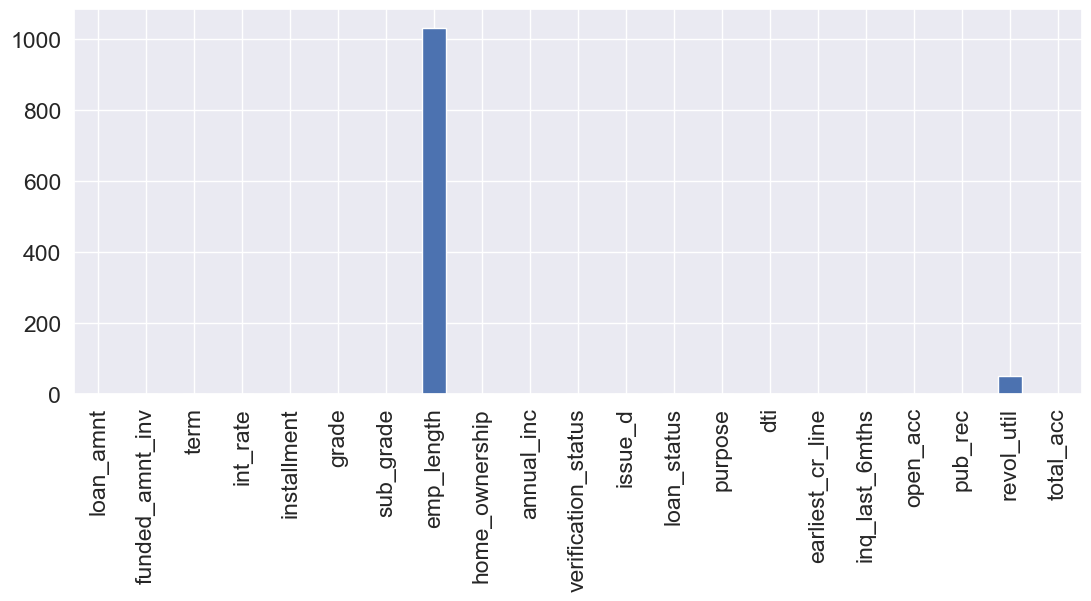

In [1408]:
plt.figure(figsize=(13,5))
loan_df.isnull().sum().plot(kind='bar')

In [1409]:
null_dict = {}
def get_null_percentage(df):
    global null_dict
    # Calculate the percentage of nulls in each column
    null_percentage = (df.isnull().sum() / len(df)) * 100

    # Filter columns with nulls
    columns_with_nulls = null_percentage[null_percentage > 0]

    # Create a dictionary of column names and their corresponding percentage of nulls
    null_dict = {column: round(columns_with_nulls[column], 2) for column in columns_with_nulls.index}

    return null_dict


get_null_percentage(loan_df)

{'emp_length': 2.68, 'revol_util': 0.13}

#### as per the above interpritation it is seen that there are 2 features that have null values in them 
* emp_length has 2.68% null values in it that is 1033 values are null
* revol_util has 0.13% null values in it that is 50 values are null

In [1410]:
# Calculating the mode in order to impute the null values

value_counts = loan_df['emp_length'].value_counts('')

# print the category with the highest count

max_count_category = value_counts.idxmax()
max_count_category

'10+ years'

In [1411]:
# Missing value imputation 
loan_df.emp_length = df.emp_length.fillna('10+ years')

In [1412]:
# Dropping the missing values as they are less in numbers and we also have huge amount of data 
loan_df = loan_df.dropna(subset=['revol_util'])

In [1413]:
# Rechecking for the missing values
loan_df.isnull().sum().sort_values(ascending = False)

loan_amnt              0
issue_d                0
revol_util             0
pub_rec                0
open_acc               0
inq_last_6mths         0
earliest_cr_line       0
dti                    0
purpose                0
loan_status            0
verification_status    0
funded_amnt_inv        0
annual_inc             0
home_ownership         0
emp_length             0
sub_grade              0
grade                  0
installment            0
int_rate               0
term                   0
total_acc              0
dtype: int64

* we have handld the nulls by imputing and dropping them whereever necessary

## Standardization of the Data

* There are few features in the data that can be conveted into int values by removing the signs
 - revol_unit 
 - int_rate
* There is one column that can be converted into int by replcing the the values with the numbers 
 - emp_lengt
 - term

In [1414]:
# Removing the % sign from the 'percentage' column
loan_df['revol_util'] = loan_df['revol_util'].str.replace('%', '')
loan_df['int_rate'] = loan_df['int_rate'].str.replace('%','')

# Here we are converting the feature into int column if employment is less than a year is considered as 0 and for more then 10+ years of employment it is considered as 10 years
loan_df['emp_length'] = loan_df['emp_length'].replace({'< 1 year': 0, '1 year': 1, '2 years': 2,'3 years':3,'4 years':4,'5 years':5,'6 years':6,'7 years':7,
                      '8 years':8,'9 years':9,'10+ years':10})

# Converting months in terms of years 
loan_df['term'] = loan_df['term'].replace({' 36 months':3, ' 60 months':5})

In [1415]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38527 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38527 non-null  int64  
 1   funded_amnt_inv      38527 non-null  float64
 2   term                 38527 non-null  int64  
 3   int_rate             38527 non-null  object 
 4   installment          38527 non-null  float64
 5   grade                38527 non-null  object 
 6   sub_grade            38527 non-null  object 
 7   emp_length           38527 non-null  int64  
 8   home_ownership       38527 non-null  object 
 9   annual_inc           38527 non-null  float64
 10  verification_status  38527 non-null  object 
 11  issue_d              38527 non-null  object 
 12  loan_status          38527 non-null  object 
 13  purpose              38527 non-null  object 
 14  dti                  38527 non-null  float64
 15  earliest_cr_line     38527 non-null 

In [1416]:
loan_df.head(4)

loan_amnt  funded_amnt_inv  term int_rate  installment grade sub_grade  \
0       5000           4975.0     3    10.65       162.87     B        B2   
1       2500           2500.0     5    15.27        59.83     C        C4   
2       2400           2400.0     3    15.96        84.33     C        C5   
3      10000          10000.0     3    13.49       339.31     C        C1   

   emp_length home_ownership  annual_inc verification_status issue_d  \
0          10           RENT     24000.0            Verified  Dec-11   
1           0           RENT     30000.0     Source Verified  Dec-11   
2          10           RENT     12252.0        Not Verified  Dec-11   
3          10           RENT     49200.0     Source Verified  Dec-11   

   loan_status         purpose    dti earliest_cr_line  inq_last_6mths  \
0   Fully Paid     credit_card  27.65           Jan-85               1   
1  Charged Off             car   1.00           Apr-99               5   
2   Fully Paid  small_business   8.72           Nov-01               2   
3   Fully Paid           other  20.00           Feb-96               1   

   open_acc  pub_rec revol_util  total_acc  
0         3        0      83.70          9  
1         3        0       9.40          4  
2         2        0      98.50         10  
3        10        0         21         37

* even after the conversion of data from object to int it has been observed that the data still looks like object so in 
order to convert that changing the type into float as dtype of both the columns is float and not int

In [1417]:
# Converting the features to float 

loan_df['revol_util'] =loan_df['revol_util'].astype(float)
loan_df['int_rate'] = loan_df['int_rate'].astype(float)

In [1418]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38527 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38527 non-null  int64  
 1   funded_amnt_inv      38527 non-null  float64
 2   term                 38527 non-null  int64  
 3   int_rate             38527 non-null  float64
 4   installment          38527 non-null  float64
 5   grade                38527 non-null  object 
 6   sub_grade            38527 non-null  object 
 7   emp_length           38527 non-null  int64  
 8   home_ownership       38527 non-null  object 
 9   annual_inc           38527 non-null  float64
 10  verification_status  38527 non-null  object 
 11  issue_d              38527 non-null  object 
 12  loan_status          38527 non-null  object 
 13  purpose              38527 non-null  object 
 14  dti                  38527 non-null  float64
 15  earliest_cr_line     38527 non-null 

## Outliers Detection and Treatment of the Outliers

In [1419]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [1420]:
outliers = []
outlier_cols = []
for col in Numerical_Col:
    is_outlier = check_outlier(loan_df, col)
    print(f"{col} : {is_outlier}")
    outliers.append(is_outlier)
    if is_outlier:
        outlier_cols.append(col)

print(f"Outliers detected? {np.array(outliers).any()}")
print(f"Outlier columns: {outlier_cols}")

loan_amnt : False
funded_amnt_inv : False
term : False
int_rate : False
installment : False
emp_length : False
annual_inc : True
dti : False
inq_last_6mths : True
open_acc : True
pub_rec : True
revol_util : False
total_acc : False
Outliers detected? True
Outlier columns: ['annual_inc', 'inq_last_6mths', 'open_acc', 'pub_rec']


before treating the outliers


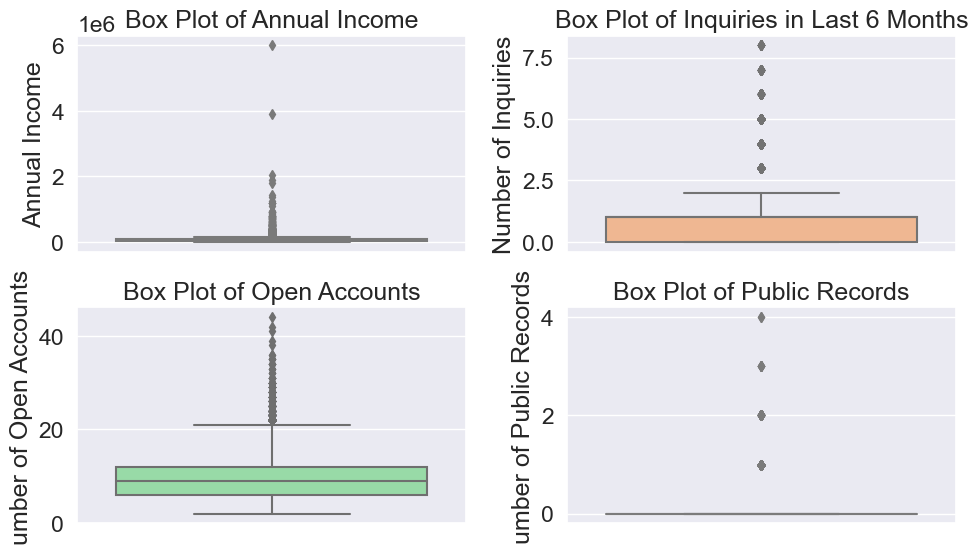

In [1421]:
import seaborn as sns
import matplotlib.pyplot as plt

print('before treating the outliers')
# Set the color palette
colors = sns.color_palette('pastel')

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))

# Plot the boxplots
sns.boxplot(y='annual_inc', data=loan_df, color=colors[0], ax=axes[0,0])
axes[0,0].set_title('Box Plot of Annual Income')
axes[0,0].set_ylabel('Annual Income')

sns.boxplot(y='inq_last_6mths', data=loan_df, color=colors[1], ax=axes[0,1])
axes[0,1].set_title('Box Plot of Inquiries in Last 6 Months')
axes[0,1].set_ylabel('Number of Inquiries')

sns.boxplot(y='open_acc', data=loan_df, color=colors[2], ax=axes[1,0])
axes[1,0].set_title('Box Plot of Open Accounts')
axes[1,0].set_ylabel('Number of Open Accounts')

sns.boxplot(y='pub_rec', data=loan_df, color=colors[3], ax=axes[1,1])
axes[1,1].set_title('Box Plot of Public Records')
axes[1,1].set_ylabel('Number of Public Records')

# Add padding between the subplots
plt.tight_layout()

# Display the plot
plt.show()


In [1422]:
# Remove outliers for feature - Cholestrol
replace_with_thresholds(loan_df, "annual_inc")
print(loan_df.shape)

(38527, 21)


<AxesSubplot: ylabel='annual_inc'>

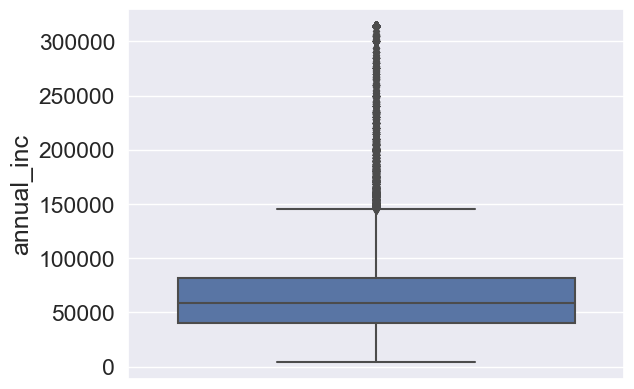

In [1423]:
sns.boxplot(y='annual_inc',data=loan_df)

In [1424]:
loan_df.open_acc.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    12.0
0.900    15.0
0.950    17.0
0.970    19.0
0.975    20.0
0.980    20.0
0.990    22.0
1.000    44.0
Name: open_acc, dtype: float64

In [1425]:
loan_df.pub_rec.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    0.0
0.900    0.0
0.950    1.0
0.970    1.0
0.975    1.0
0.980    1.0
0.990    1.0
1.000    4.0
Name: pub_rec, dtype: float64

In [1426]:
loan_df.inq_last_6mths.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    1.0
0.900    2.0
0.950    3.0
0.970    3.0
0.975    3.0
0.980    3.0
0.990    4.0
1.000    8.0
Name: inq_last_6mths, dtype: float64

#### Conclusion : 

* from the above data it is observed that there are outliers in 4 columns 
 - annual_inc
 - inq_last_6mths
 - open_acc
 - pub_rec

* out of the 4 columns the annual income is something that is filled by the loan borrower
* we dont need to handle the rest 3 features as the distribution for them is quite continuous and we alredy have handled the annual income feature by replacing the outliers with the threshold value

## Duplicate Data Inspection

In [1427]:
loan_df.duplicated().any()

False

- There are no duplicate values present in the the data so we can directly proceed with the data vizualization

## Data  Distribution 

Data Distribution


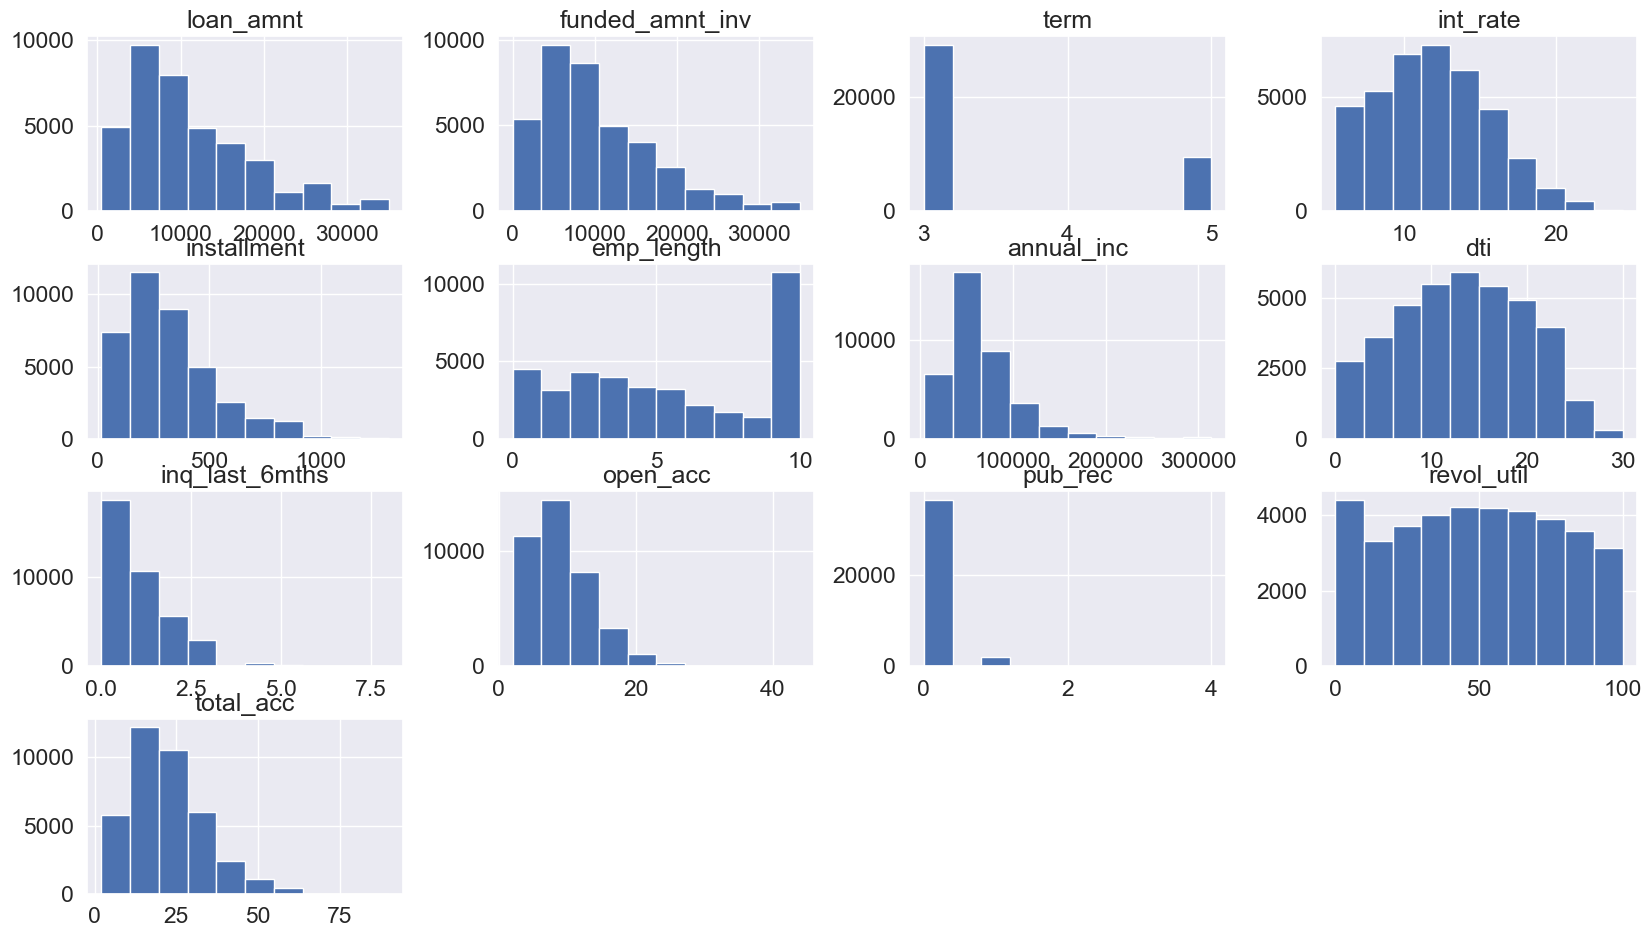

In [1366]:
print('Data Distribution')
loan_df.hist(figsize=(20, 20), layout=(7, 4), sharex=False, sharey=False)
plt.show()

### Conclusion :


* Looking at the above Distribution plots the features have been observed to be skewed that is they are not normally distributed 
 - loan amount
 - funded amount invested
 - installment
 - inquirey in last 6 months 
 - open accounts
 - annual income 
 - total accounts 
    
* all of the aove features are right skewed wherein the tail is extended to the right side making it positively skewed data
* The values are not equally ditributed and thats why it is a skewed data 

* There are features that are normally distributed which means that the values are equally distributed in the data such as 
 - revol_util
 - dti
 - emp_length

    

## Univariate Analysis

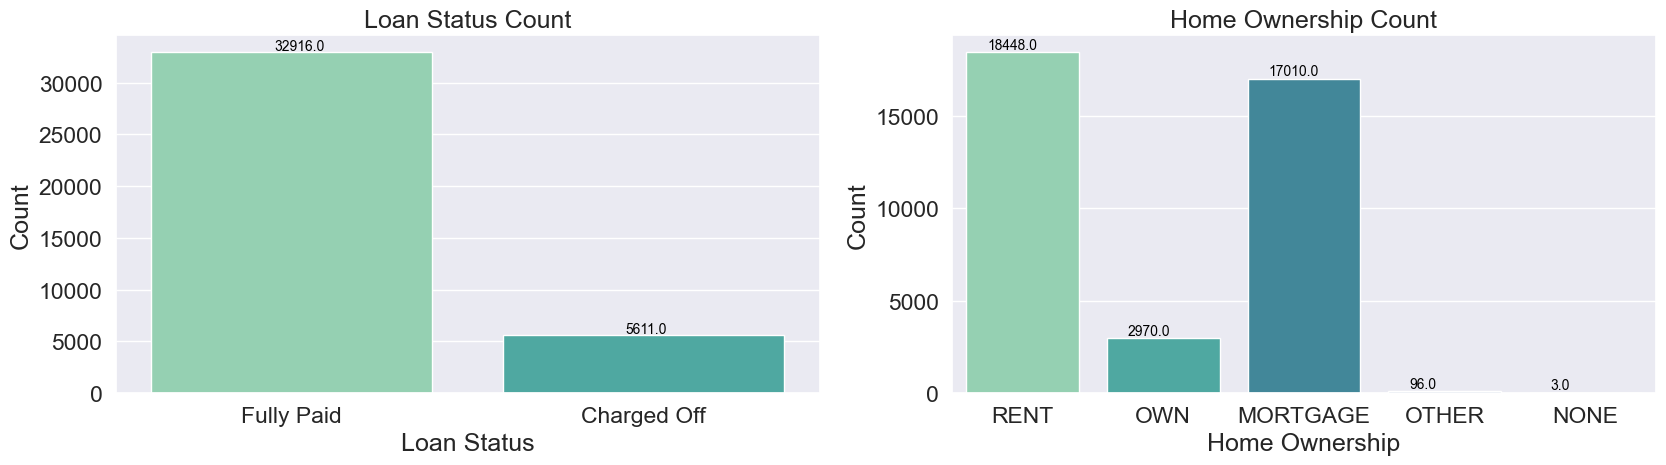

In [1367]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the color palette
palette = sns.color_palette('mako_r')

# Create a figure with two subplots
fig, axes = plt.subplots(ncols=2, figsize=(17, 5))

# Plot the first countplot
sns.countplot(x='loan_status', data=loan_df, palette=palette, ax=axes[0])
axes[0].set_title('Loan Status Count')
axes[0].set_xlabel('Loan Status')
axes[0].set_ylabel('Count')
for p in axes[0].patches:
    axes[0].annotate(str(p.get_height()), (p.get_x() + 0.35, p.get_height() + 200), color='black', fontsize=10)

# Plot the second countplot
sns.countplot(x='home_ownership', data=loan_df, palette=palette, ax=axes[1])
axes[1].set_title('Home Ownership Count')
axes[1].set_xlabel('Home Ownership')
axes[1].set_ylabel('Count')
for p in axes[1].patches:
    axes[1].annotate(str(p.get_height()), (p.get_x() + 0.15, p.get_height() + 200), color='black', fontsize=10)

# Add padding between the subplots
plt.tight_layout()

# Display the plot
plt.show()


### Conclusion :

- There are 5611 people who are in the defaulters list 
- There are more people being on rent who applies for the loan followed by the people who kept the property on the mortgage

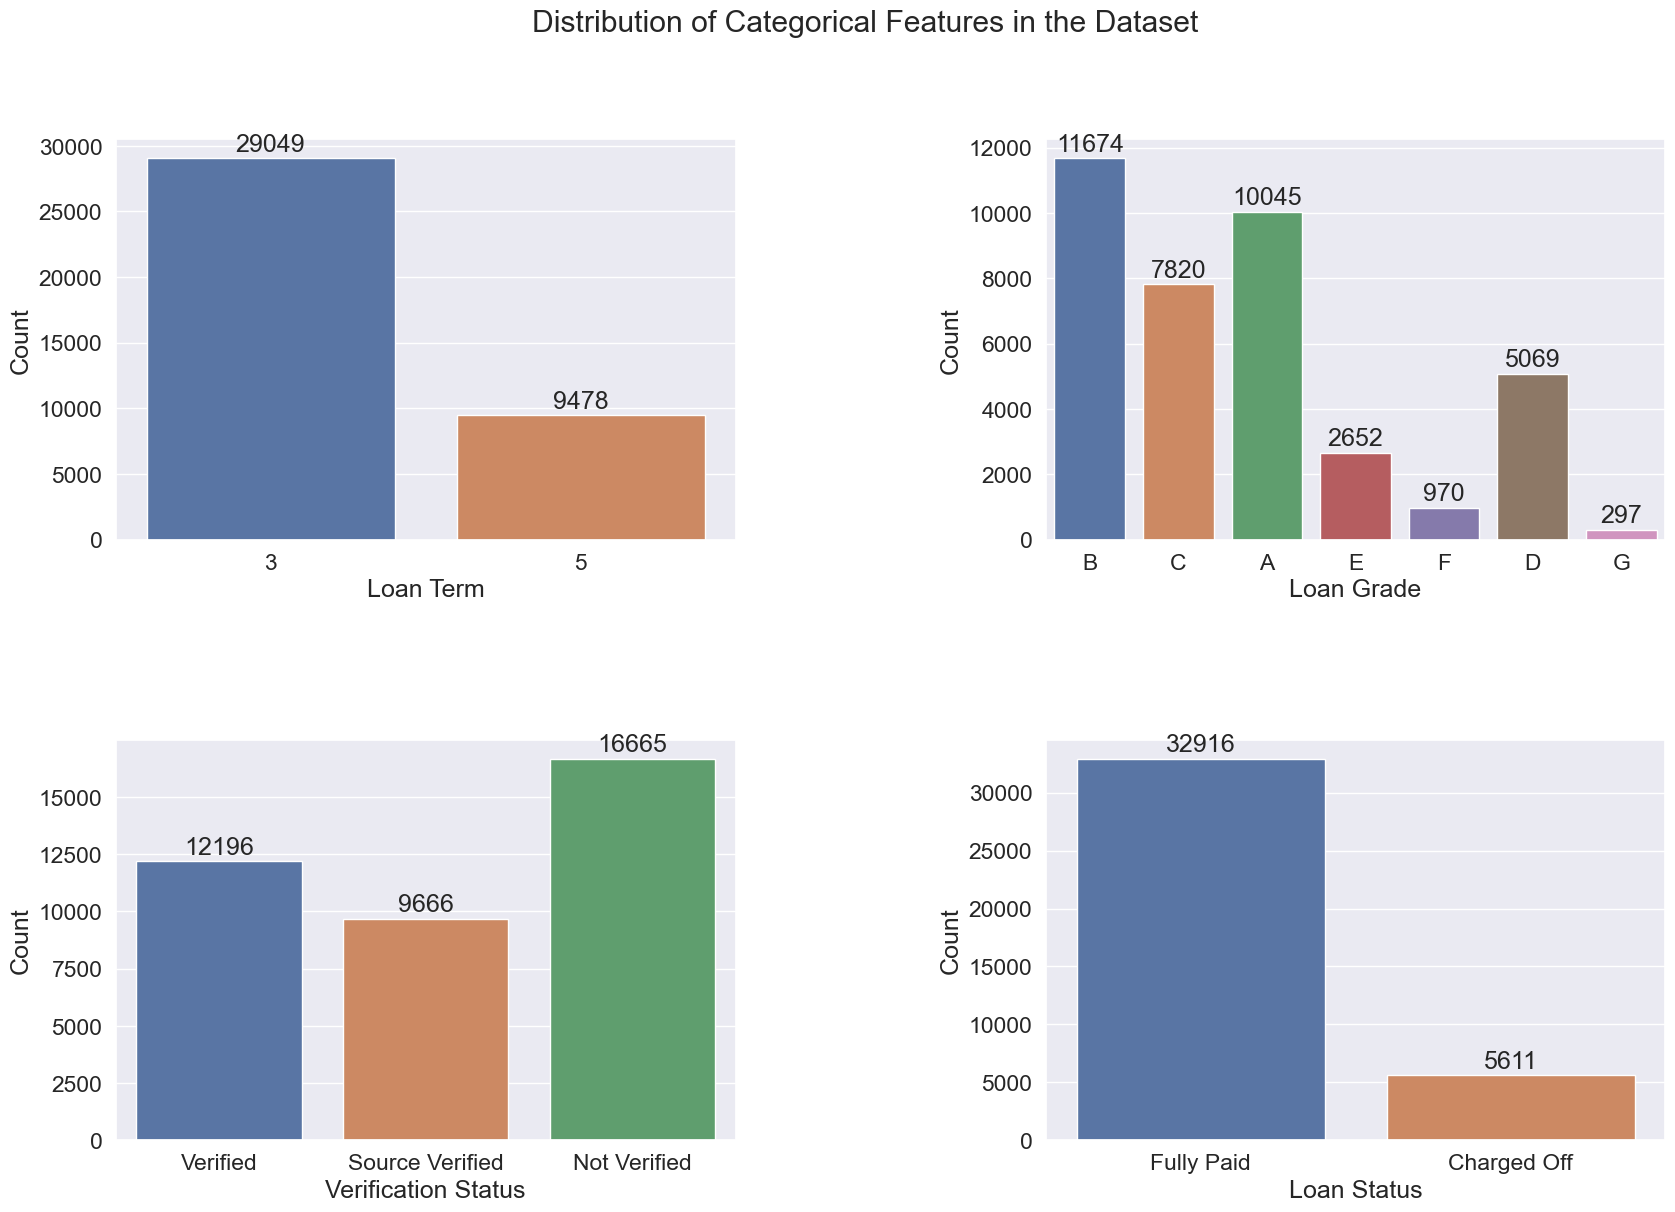

In [1368]:
fig, ax = plt.subplots(2, 2, figsize=(20, 13))

sns.countplot(data=loan_df, x="term", ax=ax[0, 0])
ax[0, 0].set_xlabel('Loan Term')
ax[0, 0].set_ylabel('Count')
for p in ax[0, 0].patches:
    ax[0, 0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

sns.countplot(data=loan_df, x="grade", ax=ax[0, 1])
ax[0, 1].set_xlabel('Loan Grade')
ax[0, 1].set_ylabel('Count')
for p in ax[0, 1].patches:
    ax[0, 1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

sns.countplot(data=loan_df, x="verification_status", ax=ax[1, 0])
ax[1, 0].set_xlabel('Verification Status')
ax[1, 0].set_ylabel('Count')
for p in ax[1, 0].patches:
    ax[1, 0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

sns.countplot(data=loan_df, x="loan_status", ax=ax[1, 1])
ax[1, 1].set_xlabel('Loan Status')
ax[1, 1].set_ylabel('Count')
for p in ax[1, 1].patches:
    ax[1, 1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

fig.suptitle('Distribution of Categorical Features in the Dataset')
fig.subplots_adjust(hspace=0.5, wspace=0.5)

plt.show()


### Conclusion :

- The loan is given for 3 or 5 years of time period to the borrowers. There are people more people who are supposed to pay back the loan within 3 years of time period
-  There are in all 7 major categories that are A, B , C , D , E ,F , G. The people who have been classified in the B grade are more in number to apply for the loan 
- There are 3 types of people for whom the loan has been approved that is the people whose documents or status is verified by the bank whose lending the money to people followed by source verified people whose background verification is done by the third party and last the people whose status is not at all verified. There are more number of people whose status is not verified and still given the loans which may take a toll on the bank who is lending the money to such people whose status is not verified so it is recommended to verify the status before approving the loan for a particular peson 

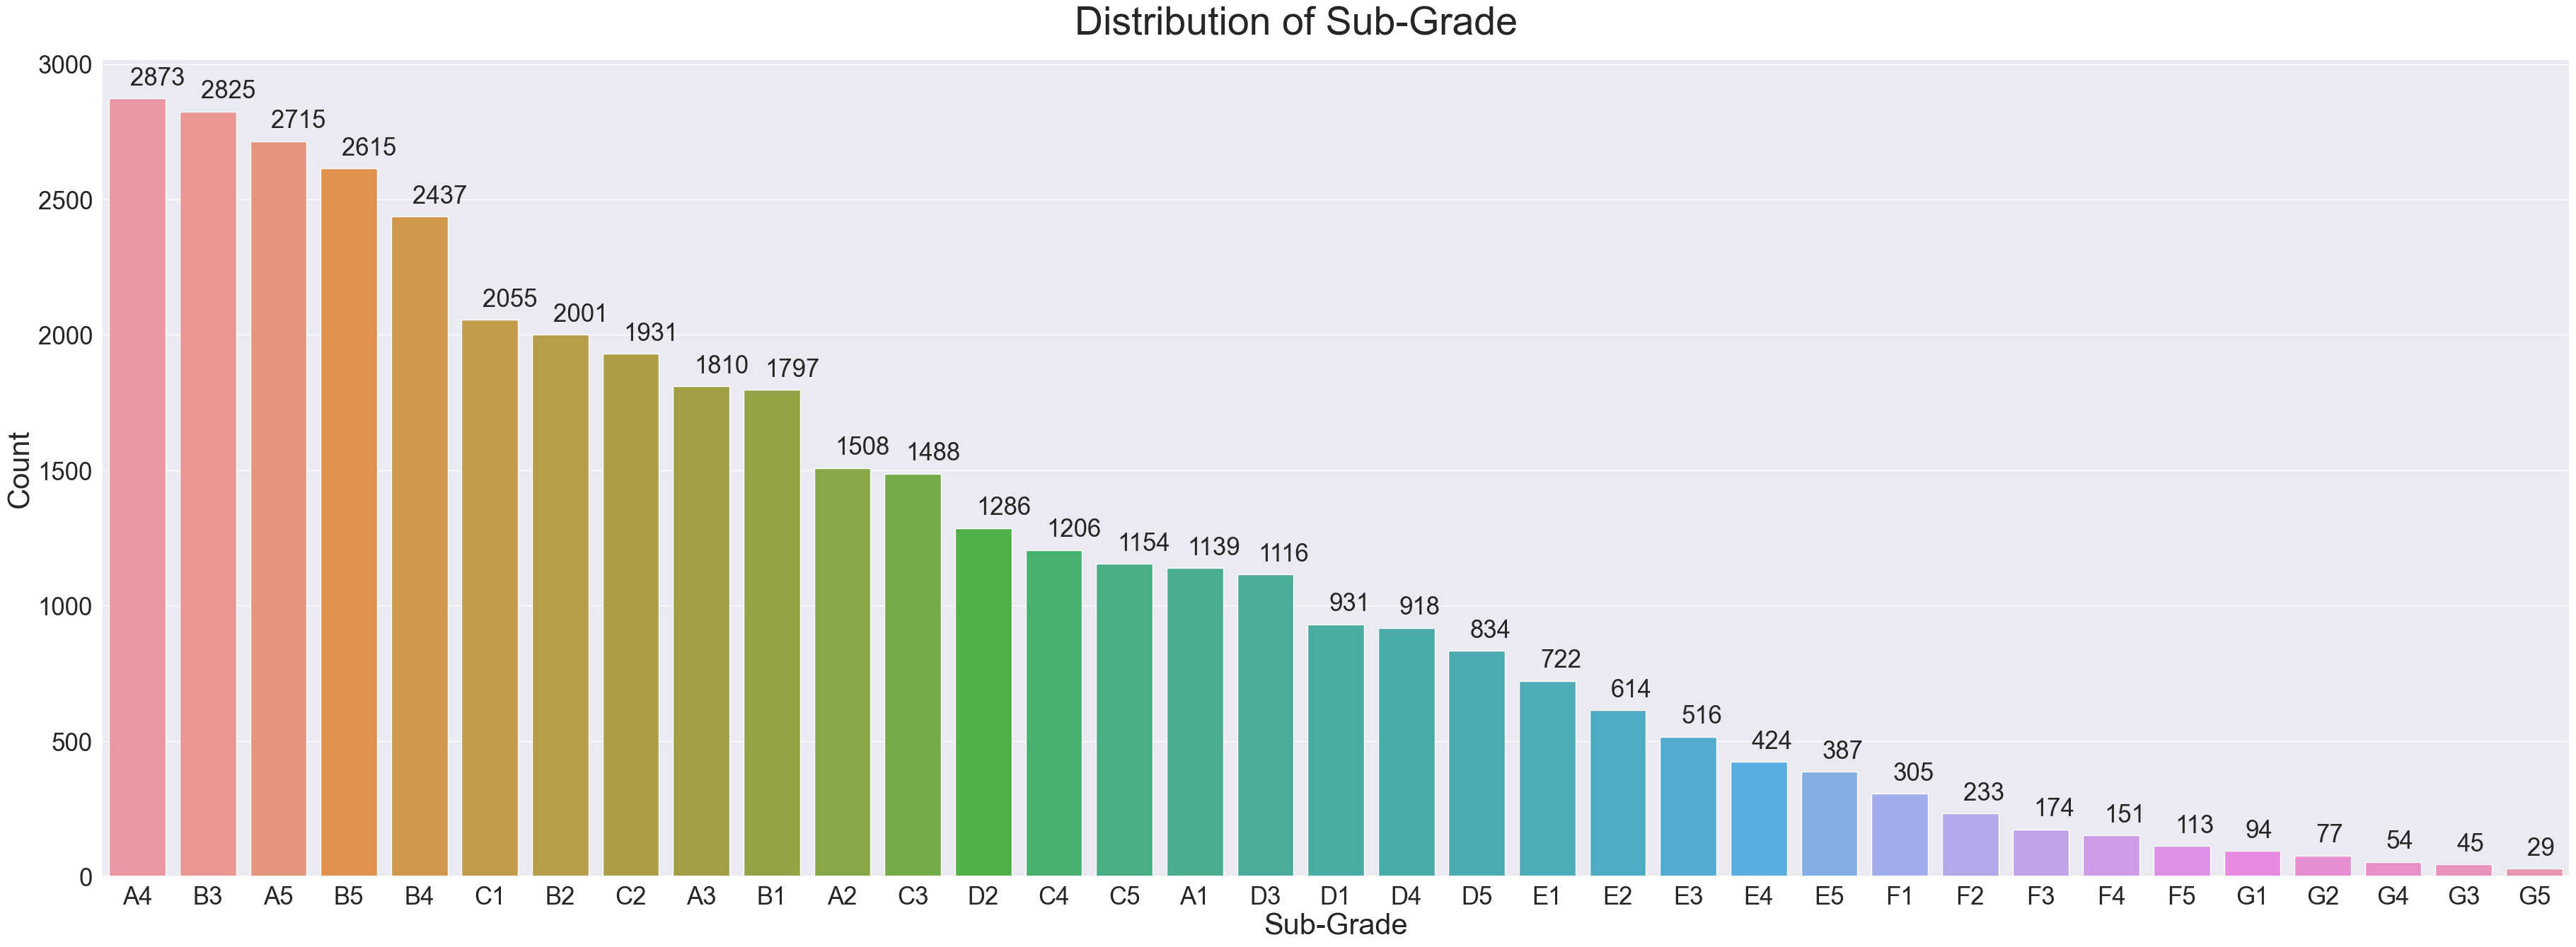

In [1369]:
fig, ax = plt.subplots(figsize=(45, 15))

sns.set_palette('colorblind')
sns.countplot(data=df, x="sub_grade", order=df["sub_grade"].value_counts().index, ax=ax)

ax.set_xlabel('Sub-Grade', fontsize=30)
ax.set_ylabel('Count', fontsize=30)

ax.tick_params(axis='both', which='major', labelsize=25)
ax.tick_params(axis='both', which='minor', labelsize=25)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50), fontsize=25)

fig.suptitle('Distribution of Sub-Grade', fontsize=40, y=0.93)

plt.show()


### Conclusion :
 - grade is further diveded into 5 parts as sub grade category for example in the grade A there are 5 sub grades for that such as A1, A2, A3, A4 , A5 and similar for the rest of the grades 
 - The people  from sub grade A4 are the major part of borrowing the loan 

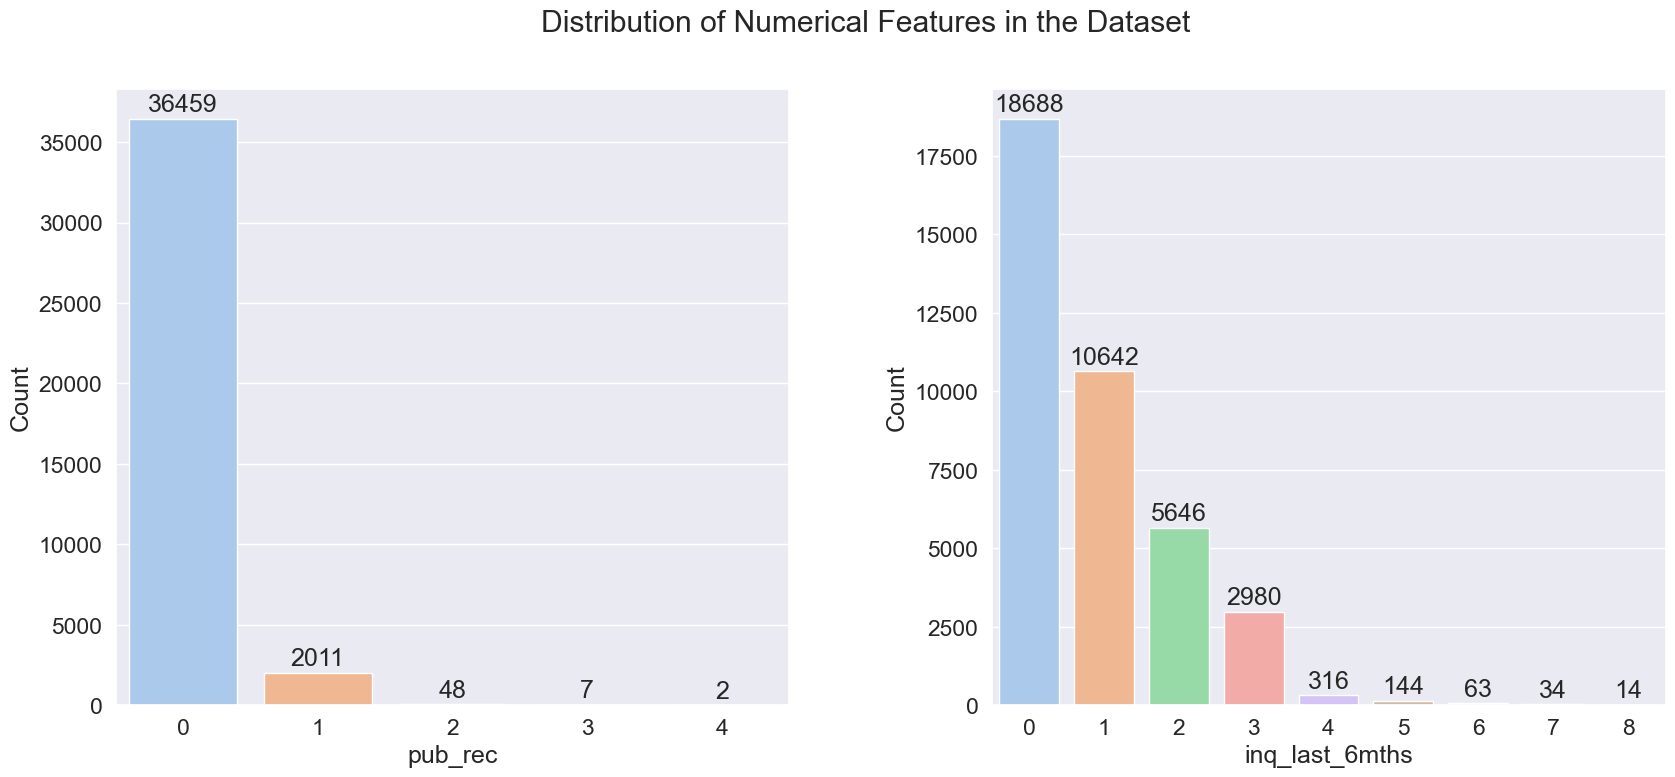

In [1370]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.countplot(data=loan_df, x="pub_rec", palette="pastel", ax=ax[0])
ax[0].set_xlabel('pub_rec')
ax[0].set_ylabel('Count')
for p in ax[0].patches:
    ax[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points')

sns.countplot(data=loan_df, x="inq_last_6mths", palette="pastel", ax=ax[1])
ax[1].set_xlabel('inq_last_6mths')
ax[1].set_ylabel('Count')
for p in ax[1].patches:
    ax[1].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', xytext=(0, 10), textcoords='offset points')

fig.suptitle('Distribution of Numerical Features in the Dataset')
fig.subplots_adjust(hspace=0.5, wspace=0.3)

plt.show()


### Conclusion :

- The people who applied for the loan have either 0 public records or they have 1 or more public records which we get to know while doing the background verification check of the person 
- There are more number of people who belongs to no public record area which is good for the bank as we can still rely on the people having no public records than that of the people who tends to have some or the other public records 
- we have the feature called inquiry in last 6 months  whose information is also filled while doing the background check in order to know the history of the loan borrower wherein either there are 0 or more inquiries made to that person's account in order to know the credit history of the person 

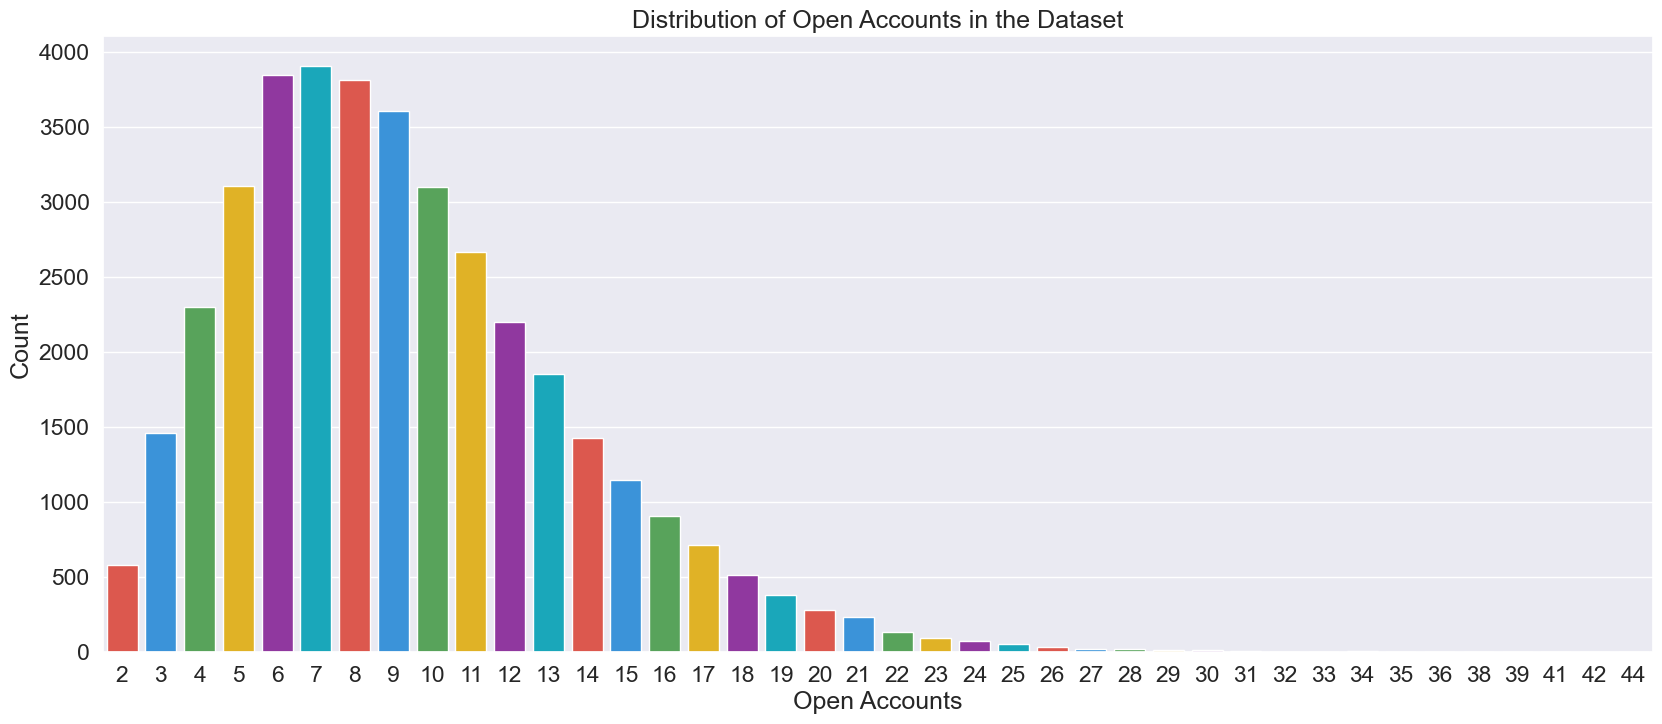

In [1371]:
fig = plt.subplots(figsize=(20, 8))

# Set the color palette
palette = sns.color_palette('pastel')

# Create the countplot
sns.countplot(data=loan_df, x="open_acc", palette=custom_palette)

# Add labels to the axes
plt.xlabel('Open Accounts')
plt.ylabel('Count')
plt.title('Distribution of Open Accounts in the Dataset')

# Show the plot
plt.show()


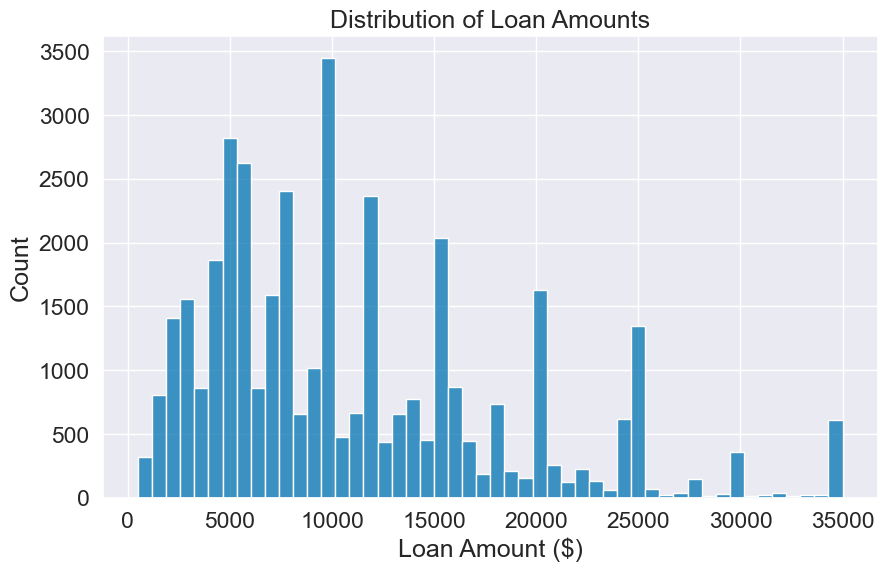

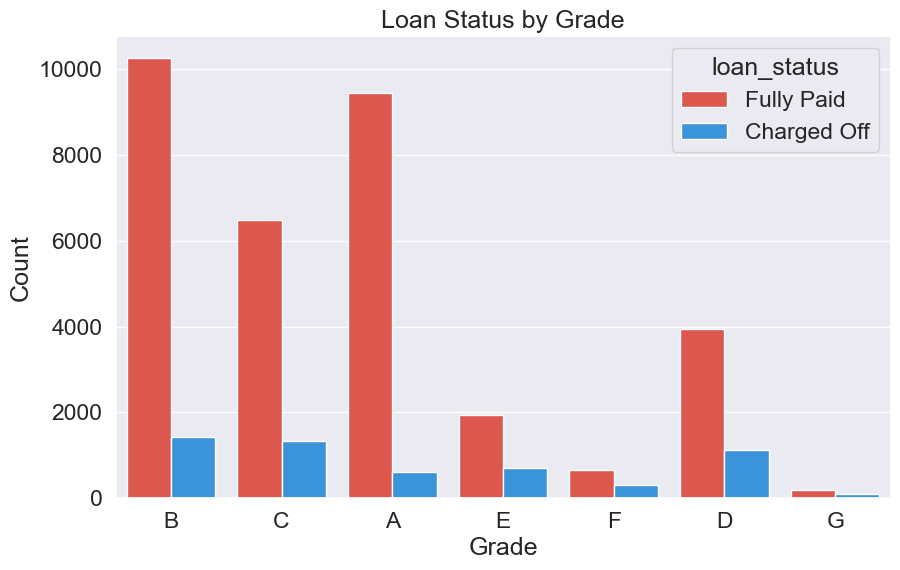

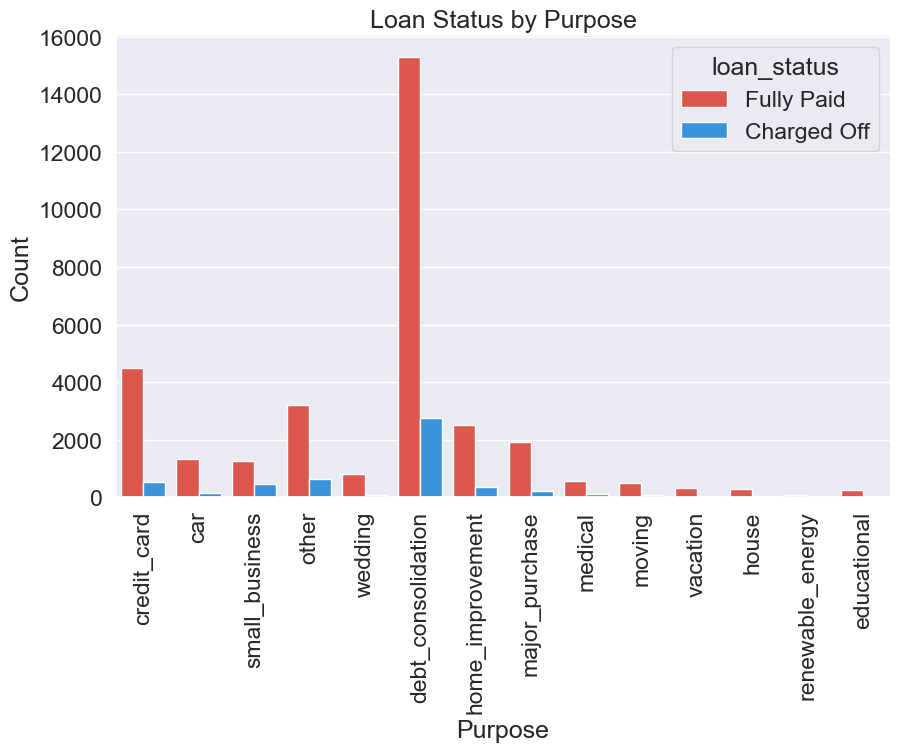

In [1372]:
# Plot the distribution of loan amounts
plt.figure(figsize=(10,6))
sns.histplot(loan_df['loan_amnt'], kde=False, bins=50,palette=custom_palette)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Count')
plt.show()


# Plot the loan status by grade
plt.figure(figsize=(10,6))
sns.countplot(x='grade', hue='loan_status', data=loan_df,palette=custom_palette)
plt.title('Loan Status by Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

# Plot the loan status by purpose
plt.figure(figsize=(10,6))
sns.countplot(x='purpose', hue='loan_status', data=loan_df,palette=custom_palette)
plt.title('Loan Status by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


### Conclusion :

 - The people who are most likey to eb defaulter belongs to the grade B followed by grade D as per the above observations
 - The people who takes the loan for debt consolidation purpose that is to clear other loans are more likely to be in the list of defaulters

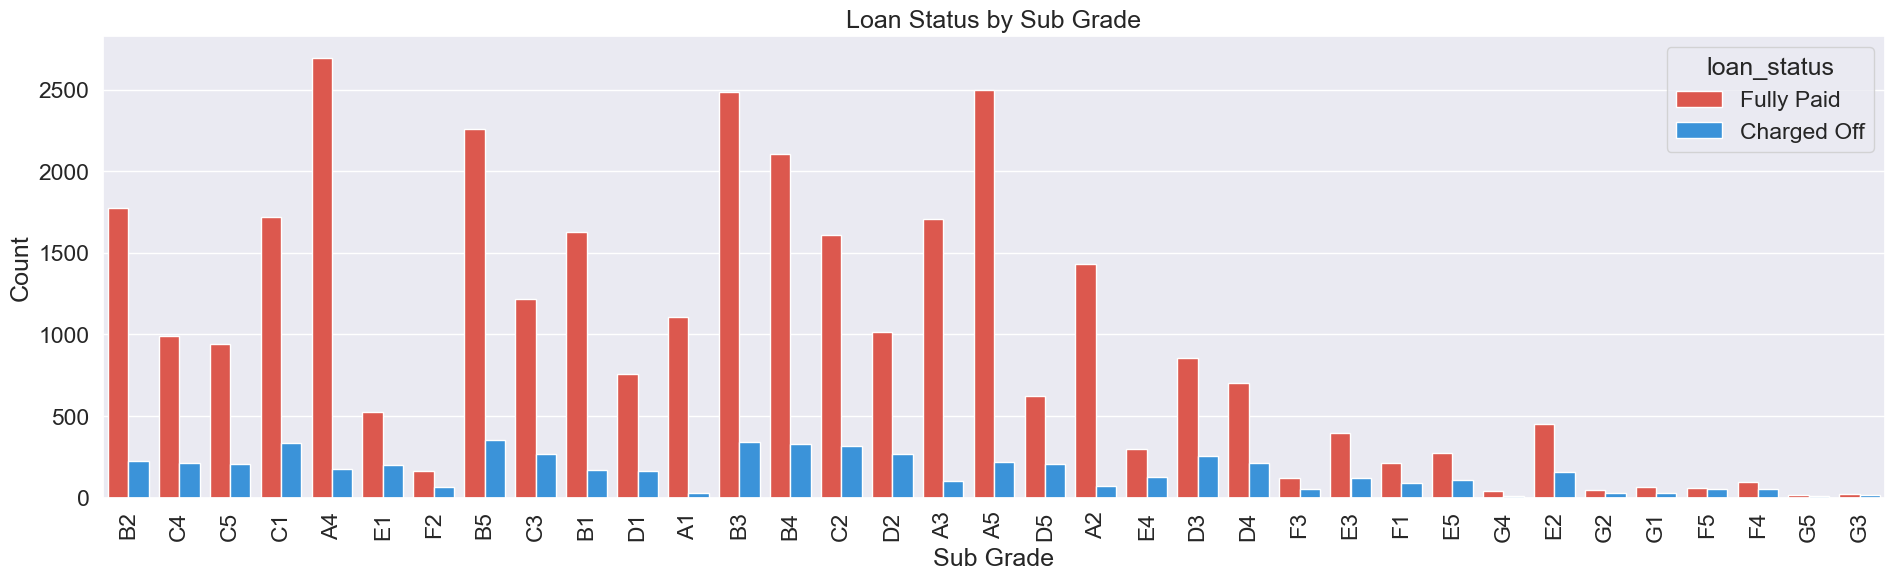

In [1373]:
# Plot the loan status by purpose
plt.figure(figsize=(23,6))
sns.countplot(x='sub_grade', hue='loan_status', data=loan_df, palette=custom_palette)
plt.title('Loan Status by Sub Grade')
plt.xlabel('Sub Grade')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

### Conclusion :

 - The People who are more likely to be the defaulters belongs to sub grade B5 followed by sub grade B4 and so on

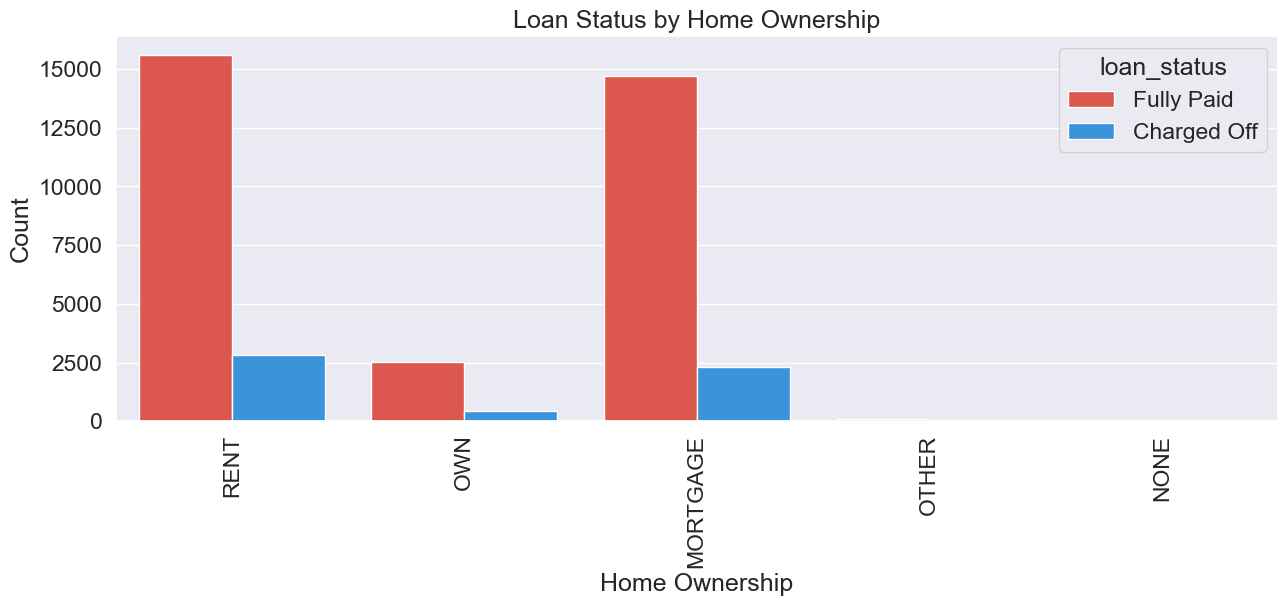

In [1374]:
# Set custom color palette
custom_palette = ["#F44336", "#2196F3", "#4CAF50", "#FFC107", "#9C27B0", "#00BCD4"]

# Plot the loan status by purpose
plt.figure(figsize=(15,5))
sns.countplot(x='home_ownership', hue='loan_status', data=loan_df, palette=custom_palette)
plt.title('Loan Status by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


### Conclusion :

 - There are people who are more likely to default the loans who lives in Rental Apartments 

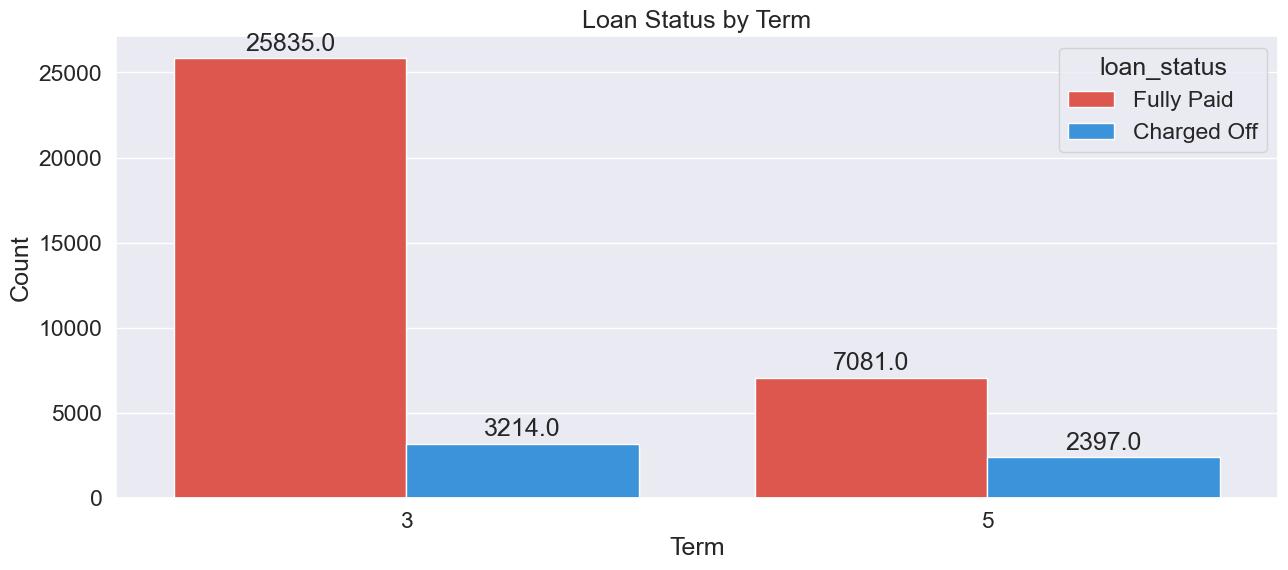

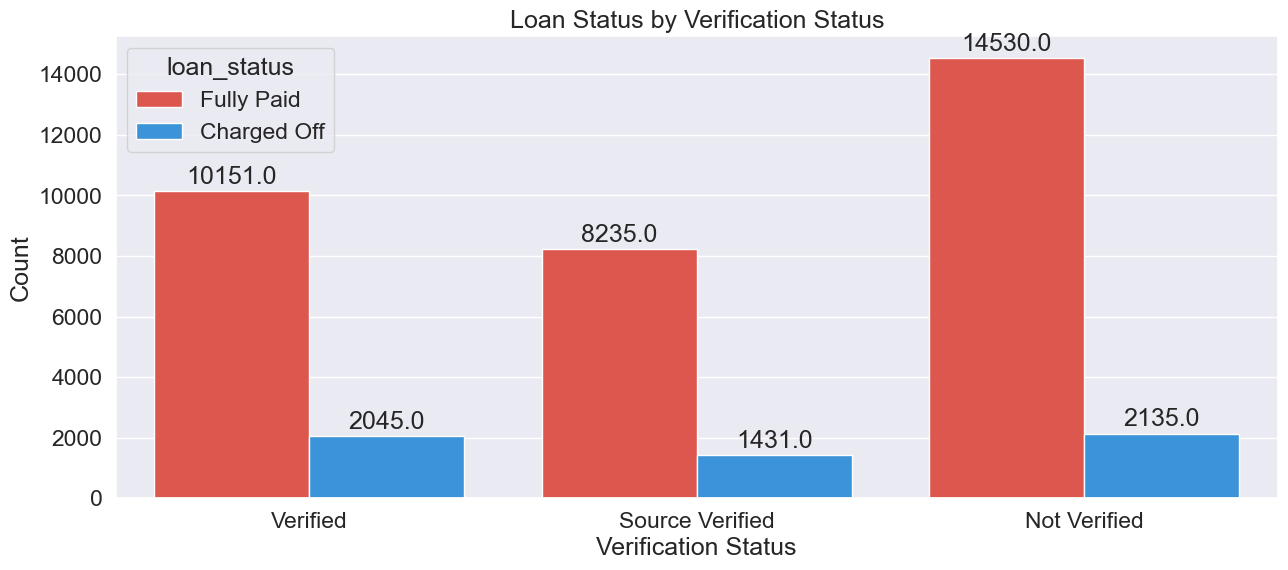

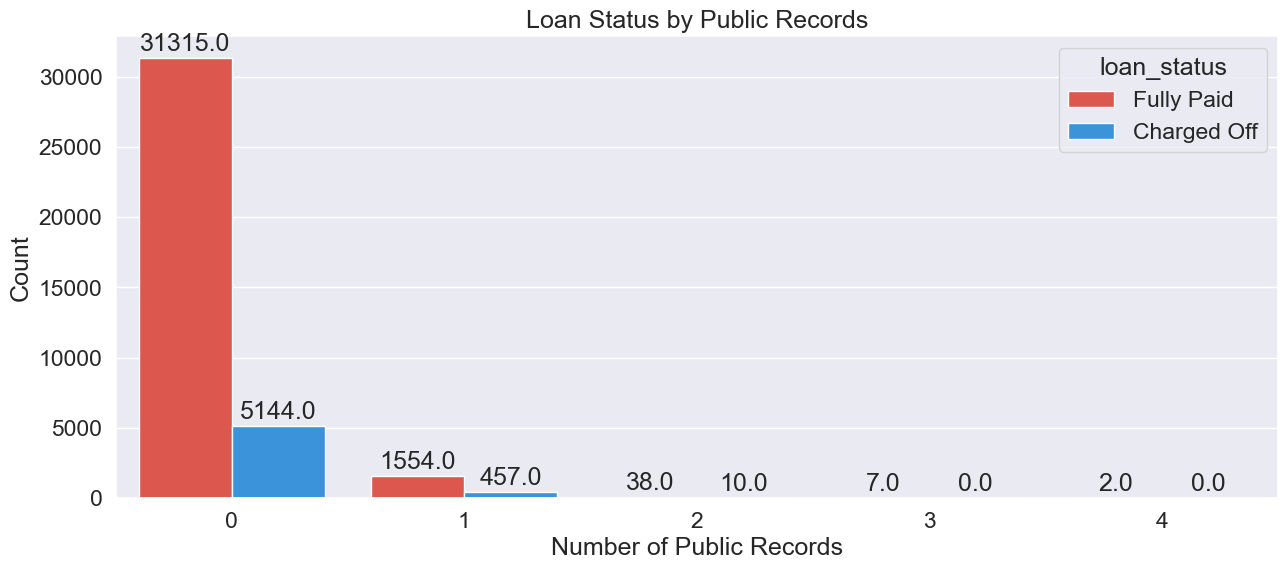

In [1375]:
# Define a function to add count labels to bars
def add_count_labels(ax):
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Plot the loan status by term
plt.figure(figsize=(15, 6))
ax1 = sns.countplot(x='term', hue='loan_status', data=loan_df,palette=custom_palette)
plt.title('Loan Status by Term')
plt.xlabel('Term')
plt.ylabel('Count')
add_count_labels(ax1)
plt.show()

# Plot the loan status by verification status
plt.figure(figsize=(15, 6))
ax2 = sns.countplot(x='verification_status', hue='loan_status', data=loan_df,palette=custom_palette)
plt.title('Loan Status by Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Count')
add_count_labels(ax2)
plt.show()

# Plot the loan status by public records
plt.figure(figsize=(15, 6))
ax3 = sns.countplot(x='pub_rec', hue='loan_status', data=loan_df, palette=custom_palette)
plt.title('Loan Status by Public Records')
plt.xlabel('Number of Public Records')
plt.ylabel('Count')
add_count_labels(ax3)
plt.show()


### Conclusion :

 - The people whose time period is less that is 3 years to repay the loan are more likely to be the defaulters in comparison with the people whos time period is more to repay the loan 
 - The people whose verification is not done and for whom the loan is approved without any background check are most likely to be defaulters so it is recommended not to approve the loan without any background check of the loan borrowers 
 - There are people whose public records are zero are are still tend to be in the defaulters list so we can not blindly trust the borrower by just checking the public records it is recommended to go through few more documents to know the behaviour of the borrower

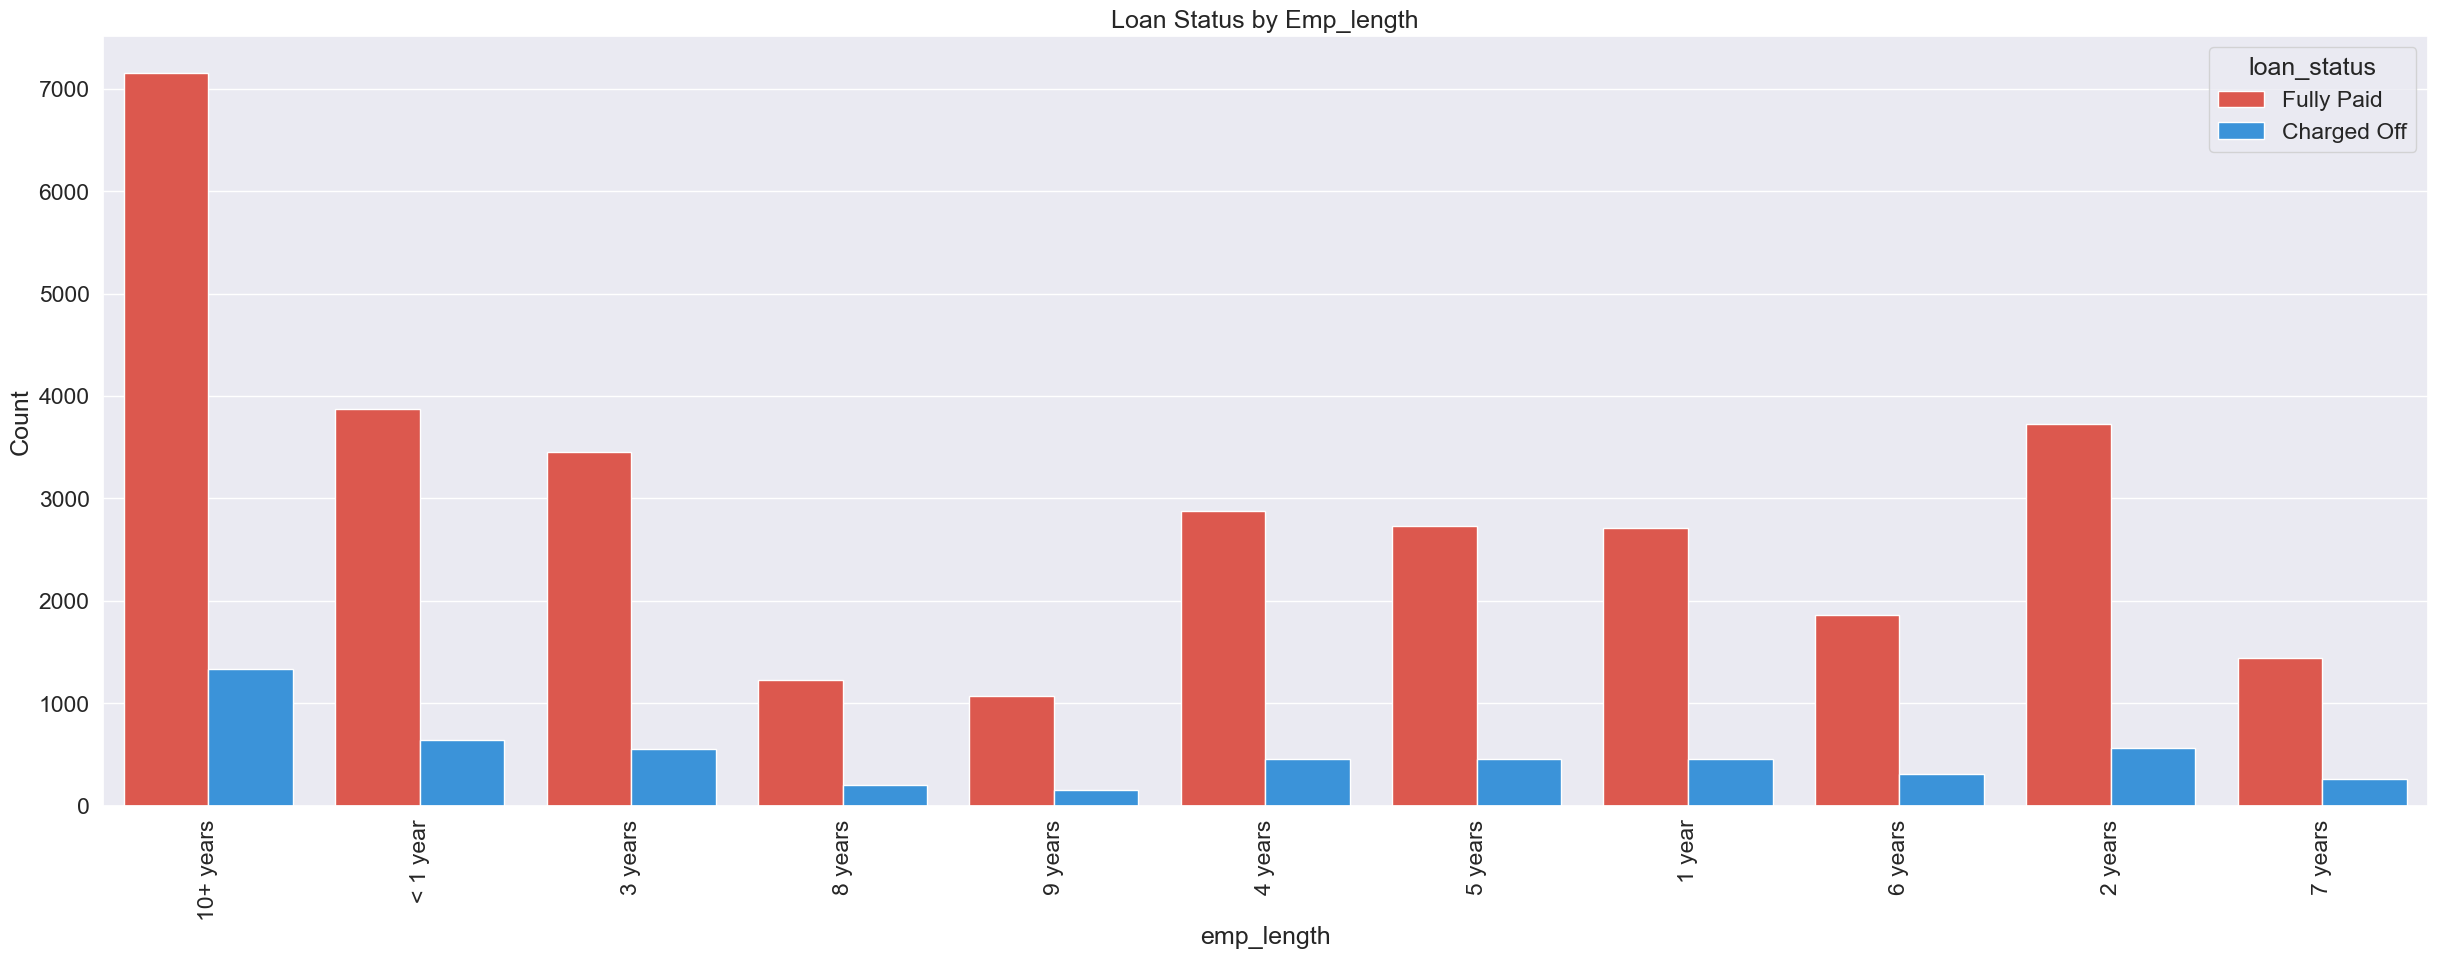

In [1376]:
# Plot the loan status by purpose
plt.figure(figsize=(30,10))
sns.countplot(x='emp_length', hue='loan_status', data=df, palette=custom_palette)
plt.title('Loan Status by Emp_length')
plt.xlabel('emp_length')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


### Conclusion : 

 - The people who have more employment time period are the majority in the defaulters list in comparision with the others 

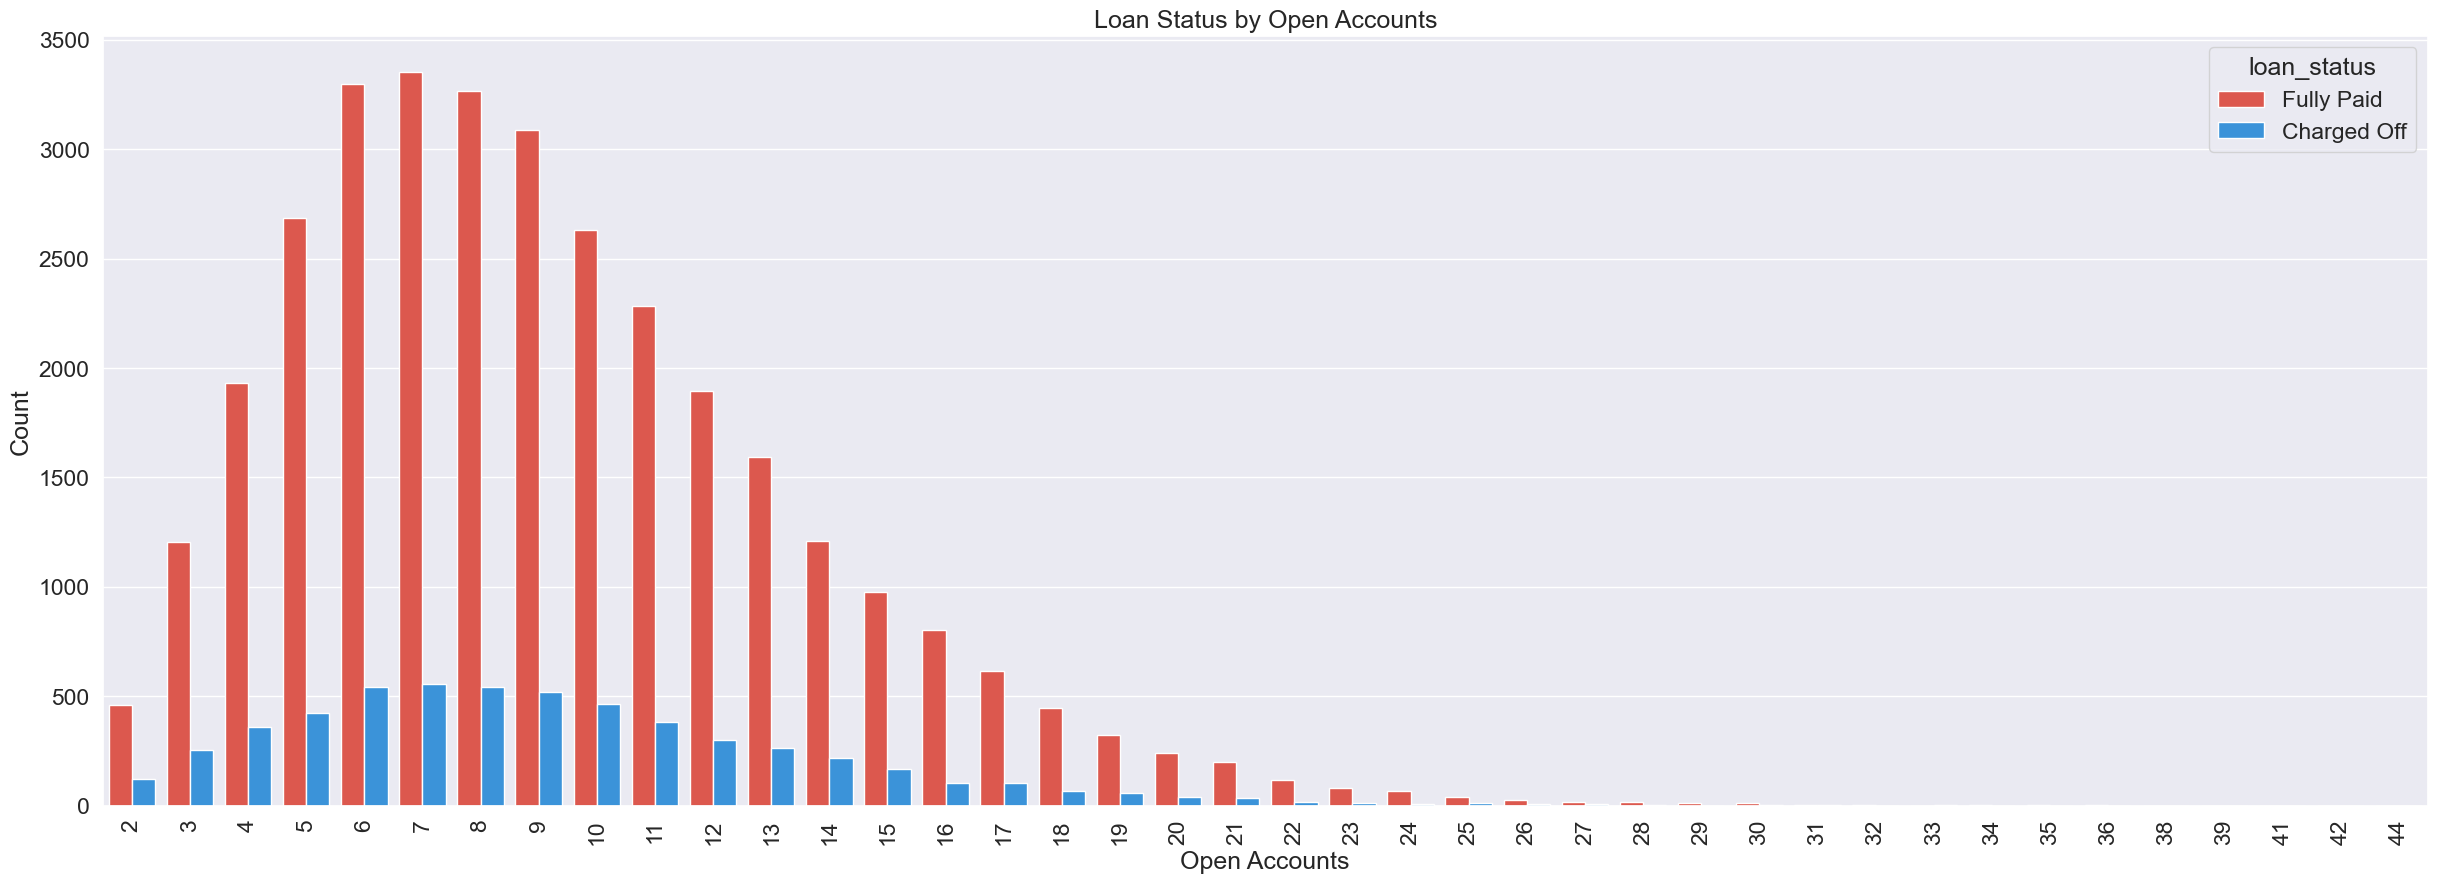

In [1377]:
# Plot the loan status by purpose
plt.figure(figsize=(30,10))
sns.countplot(x='open_acc', hue='loan_status', data=loan_df, palette=custom_palette)
plt.title('Loan Status by Open Accounts')
plt.xlabel('Open Accounts')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


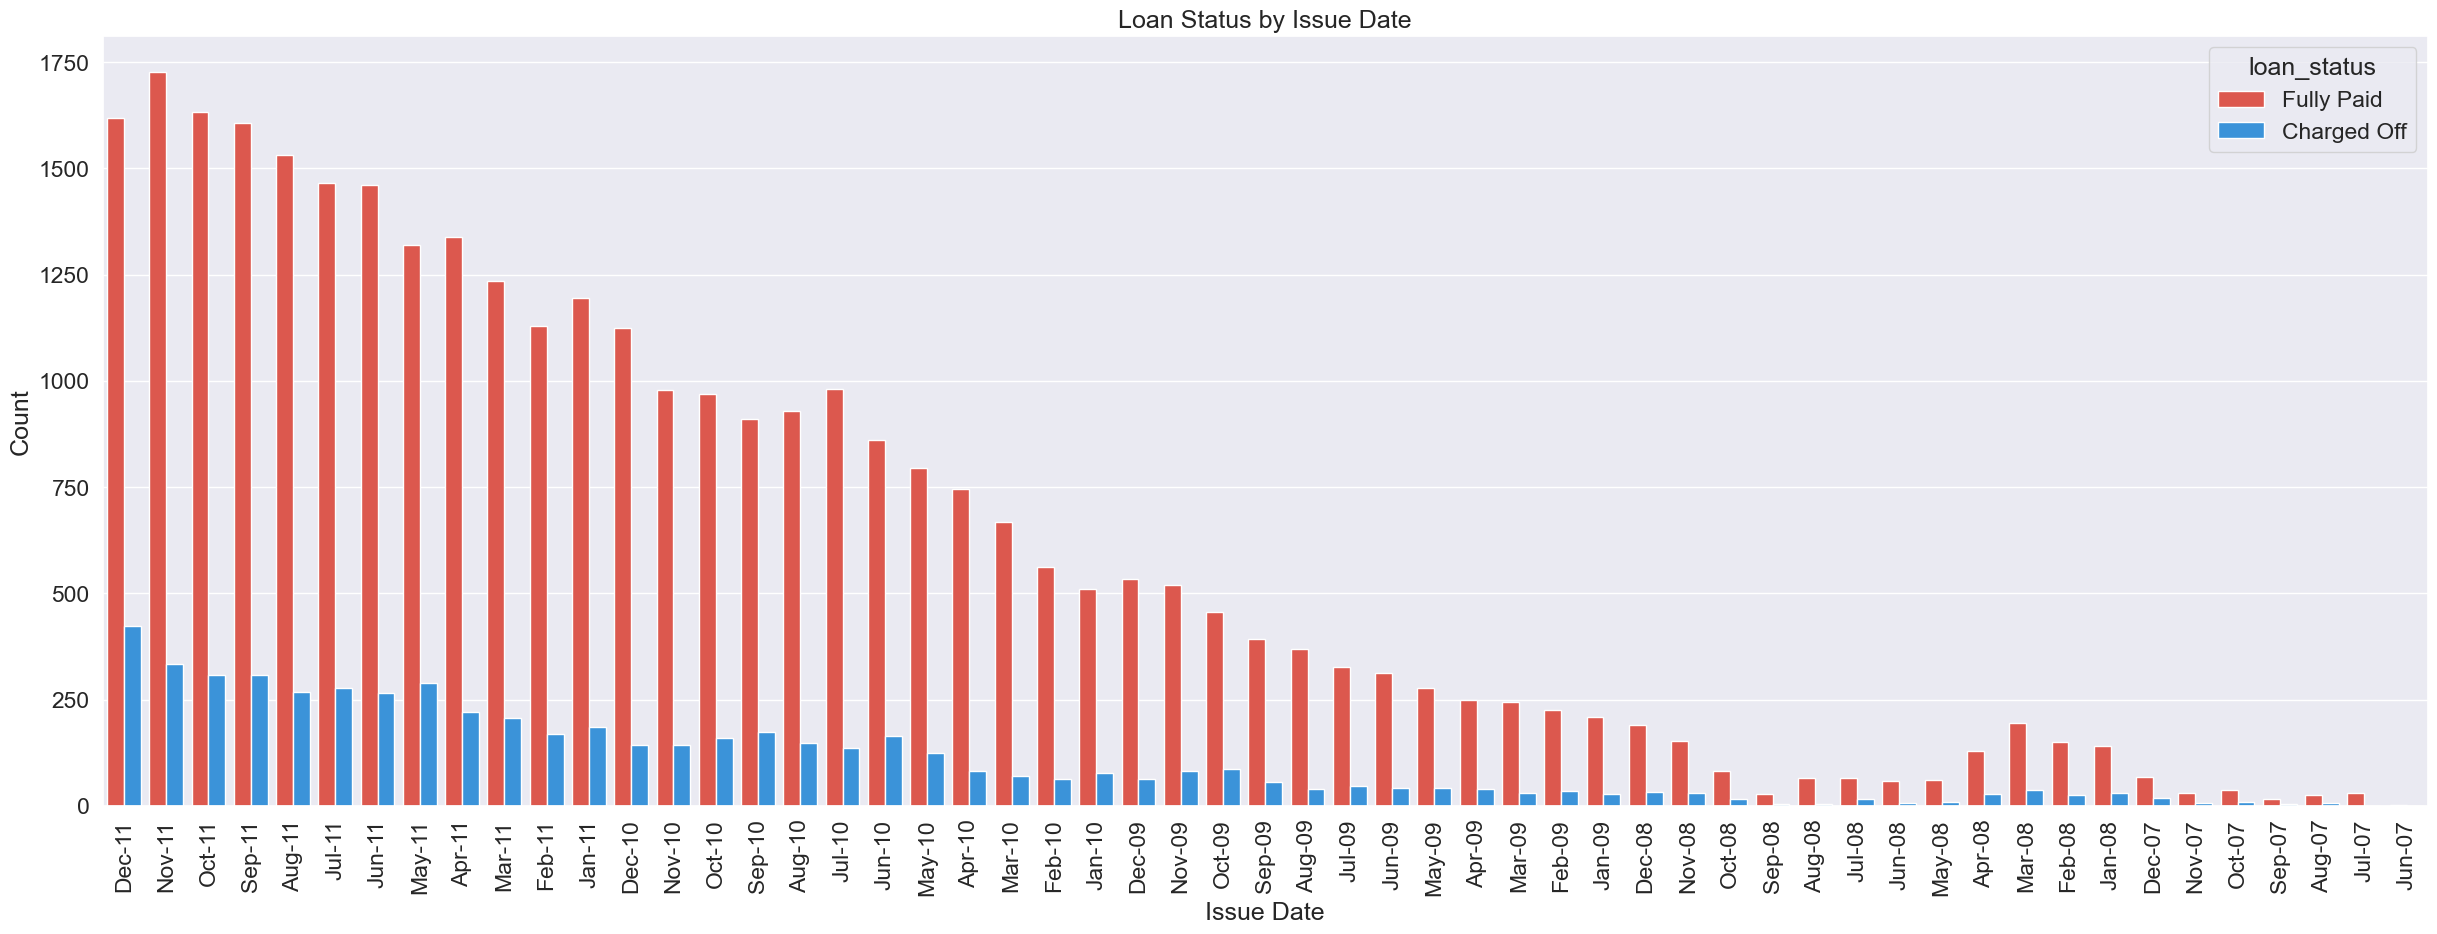

In [1378]:
# Plot the loan status by purpose
plt.figure(figsize=(30,10))
sns.countplot(x='issue_d', hue='loan_status', data=loan_df, palette=custom_palette)
plt.title('Loan Status by Issue Date')
plt.xlabel('Issue Date')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


### Conclusion :

 - In the month of December 2011 the people who have take the loans are likely to be the defaulters followed by May 2011 and so on 
 - this may happen that there is any financial crisis in that country in those time periods so it is recommended to take in account these kind of situations also while approving for the loans

In [1379]:
loan_df.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

 - Home Ownership have in all 5 types out of which None can be the part of Other so we are merging both of them together 
 - also there are only 3 records that are the part of None group 

In [1380]:
# Replacing None with Other value

loan_df['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)
print(loan_df.home_ownership.unique())

['RENT' 'OWN' 'MORTGAGE' 'OTHER']


 - We are using the binning approch in order to gather some more information regarding the features that affects on defaulters
 - In this approach we are creating the 5 bins for selected features having equal records in each of the bins 
 - lets create the bins for below features 
   - funded_amnt_inv
   - int_rate
   - open_acc
   - revol_util
   - total_acc
   - annual_inc
   - loan_amnt
   - dti
   - installment

In [1381]:
# Binning

loan_df['funded_amnt_inv_groups'] = pd.cut(loan_df['funded_amnt_inv'], bins=5,precision =0,labels =['0k-7k','7k-14k','14k-21k','21k-28k','28k-35k'])
loan_df['int_rate_groups'] = pd.cut(loan_df['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan_df['open_acc_groups'] = pd.cut(loan_df['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
loan_df['revol_util_groups'] = pd.cut(loan_df['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
loan_df['total_acc_groups'] = pd.cut(loan_df['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
loan_df['annual_inc_groups'] = pd.cut(loan_df['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
loan_df['loan_amnt_groups'] = pd.cut(loan_df['loan_amnt'], bins=5,precision =0,labels=['0k-7k','7k-14k','14k-21k','21k-28k','28k-35k'])
loan_df['dti_groups'] = pd.cut(loan_df['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])
loan_df['installment_groups'] = pd.cut(loan_df['installment'], bins=5, precision=0, labels=['0-251', '251-502', '502-754', '754-1005', '1005-1256'])

In [1382]:
loan_df.head(4)

loan_amnt  funded_amnt_inv  term  int_rate  installment grade sub_grade  \
0       5000           4975.0     3     10.65       162.87     B        B2   
1       2500           2500.0     5     15.27        59.83     C        C4   
2       2400           2400.0     3     15.96        84.33     C        C5   
3      10000          10000.0     3     13.49       339.31     C        C1   

   emp_length home_ownership  annual_inc verification_status issue_d  \
0          10           RENT     24000.0            Verified  Dec-11   
1           0           RENT     30000.0     Source Verified  Dec-11   
2          10           RENT     12252.0        Not Verified  Dec-11   
3          10           RENT     49200.0     Source Verified  Dec-11   

   loan_status         purpose    dti earliest_cr_line  inq_last_6mths  \
0   Fully Paid     credit_card  27.65           Jan-85               1   
1  Charged Off             car   1.00           Apr-99               5   
2   Fully Paid  small_business   8.72           Nov-01               2   
3   Fully Paid           other  20.00           Feb-96               1   

   open_acc  pub_rec  revol_util  total_acc funded_amnt_inv_groups  \
0         3        0        83.7          9                  0k-7k   
1         3        0         9.4          4                  0k-7k   
2         2        0        98.5         10                  0k-7k   
3        10        0        21.0         37                 7k-14k   

  int_rate_groups open_acc_groups revol_util_groups total_acc_groups  \
0          9%-13%            2-10            80-100             2-20   
1         13%-17%            2-10              0-20             2-20   
2         13%-17%            2-10            80-100             2-20   
3         13%-17%            2-10             20-40            20-37   

  annual_inc_groups loan_amnt_groups dti_groups installment_groups  
0            3k-31k            0k-7k      24-30              0-251  
1            3k-31k            0k-7k        0-6              0-251  
2            3k-31k            0k-7k       6-12              0-251  
3            3k-31k           7k-14k      18-24            251-502

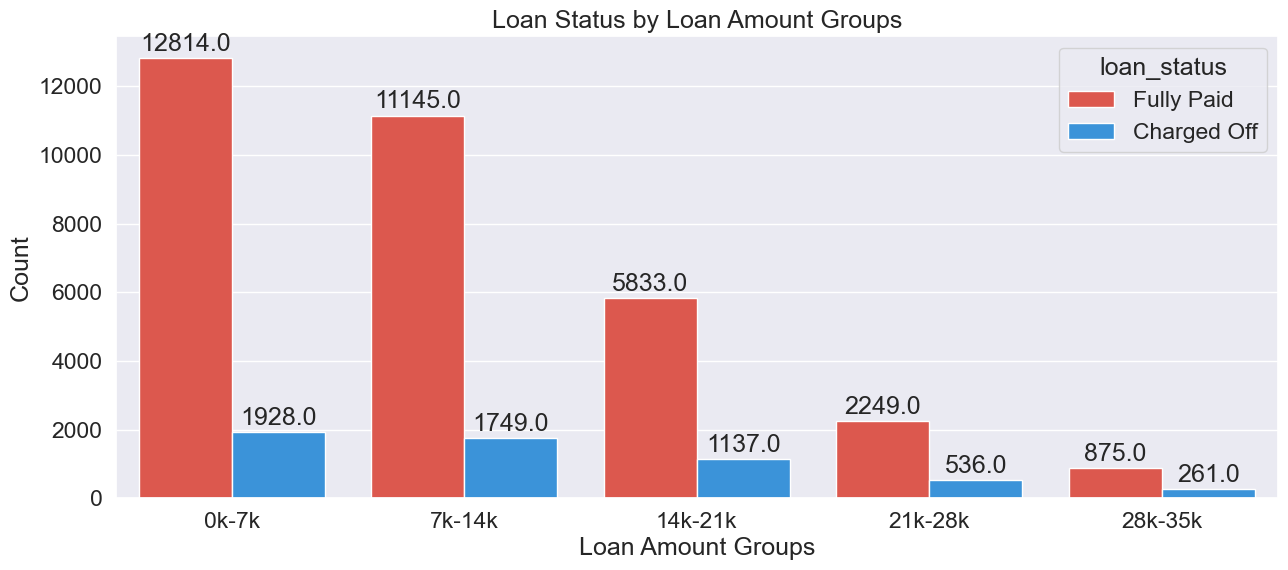

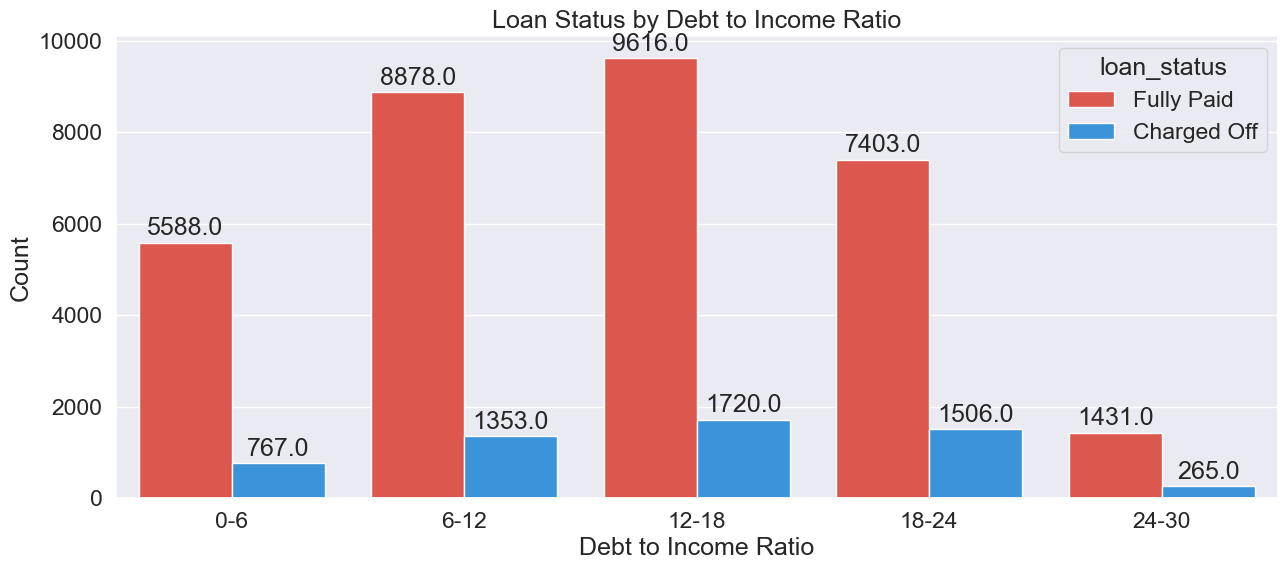

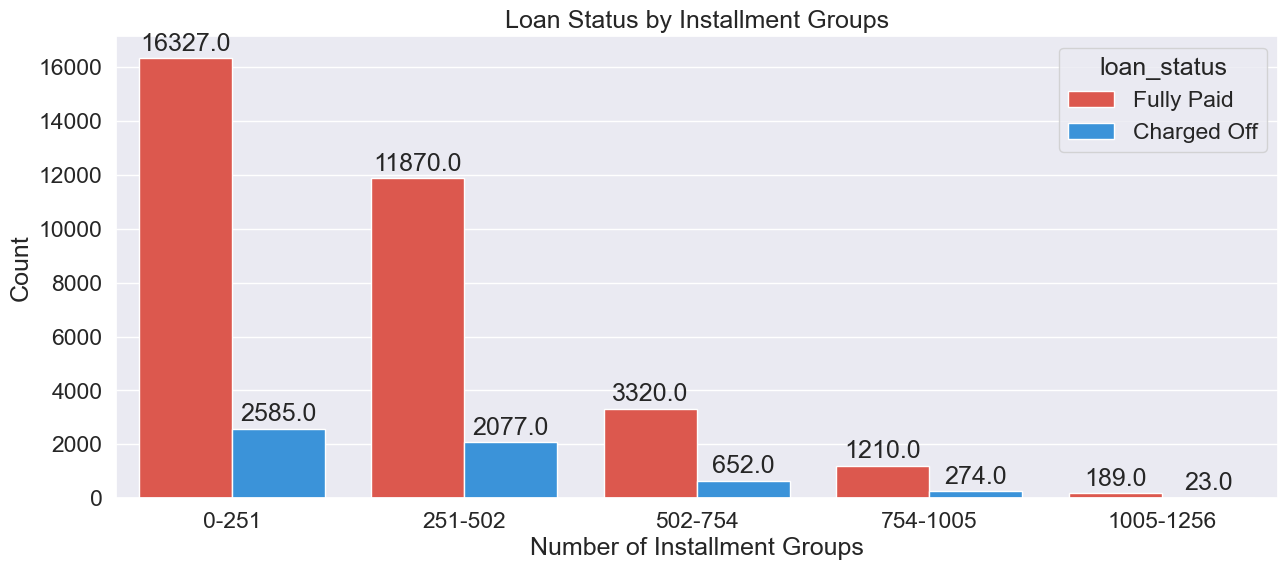

In [1383]:
# Define a function to add count labels to bars
def add_count_labels(ax):
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

sns.set_palette('colorblind')        
# Plot the loan status by term
plt.figure(figsize=(15, 6))
ax1 = sns.countplot(x='loan_amnt_groups', hue='loan_status', data=loan_df, palette=custom_palette)
plt.title('Loan Status by Loan Amount Groups')
plt.xlabel('Loan Amount Groups')
plt.ylabel('Count')
add_count_labels(ax1)
plt.show()

# Plot the loan status by verification status
plt.figure(figsize=(15, 6))
ax2 = sns.countplot(x='dti_groups', hue='loan_status', data=loan_df, palette=custom_palette)
plt.title('Loan Status by Debt to Income Ratio')
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Count')
add_count_labels(ax2)
plt.show()

# Plot the loan status by public records
plt.figure(figsize=(15, 6))
ax3 = sns.countplot(x='installment_groups', hue='loan_status', data=loan_df, palette=custom_palette)
plt.title('Loan Status by Installment Groups')
plt.xlabel('Number of Installment Groups')
plt.ylabel('Count')
add_count_labels(ax3)
plt.show()


### Conclusion :

 - People who takes the loan amount in the range of 0 - 7000 are more likely to be the defaulters the reason could be that they cant afford to take much loan repay to the bank 
 - The people whose debt to income ratio is in between 12-18% are most likely to be in the defaulters list 
 - The people who have installment of 0 - 251 are likely to eb the defaulters although being small amount they are unable to repay the loan 

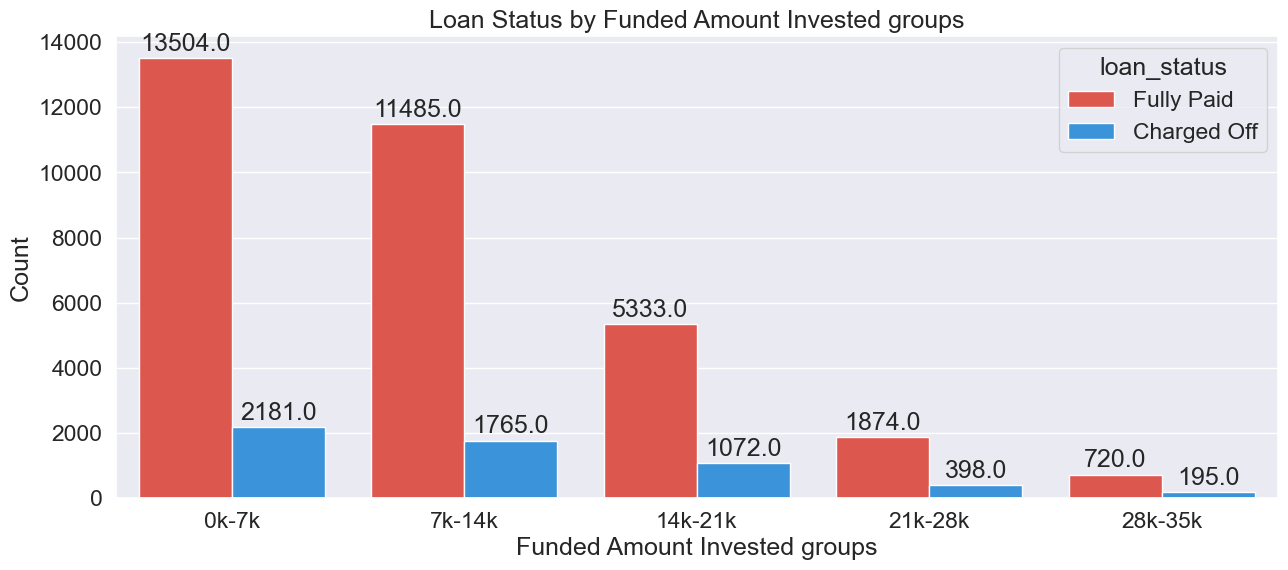

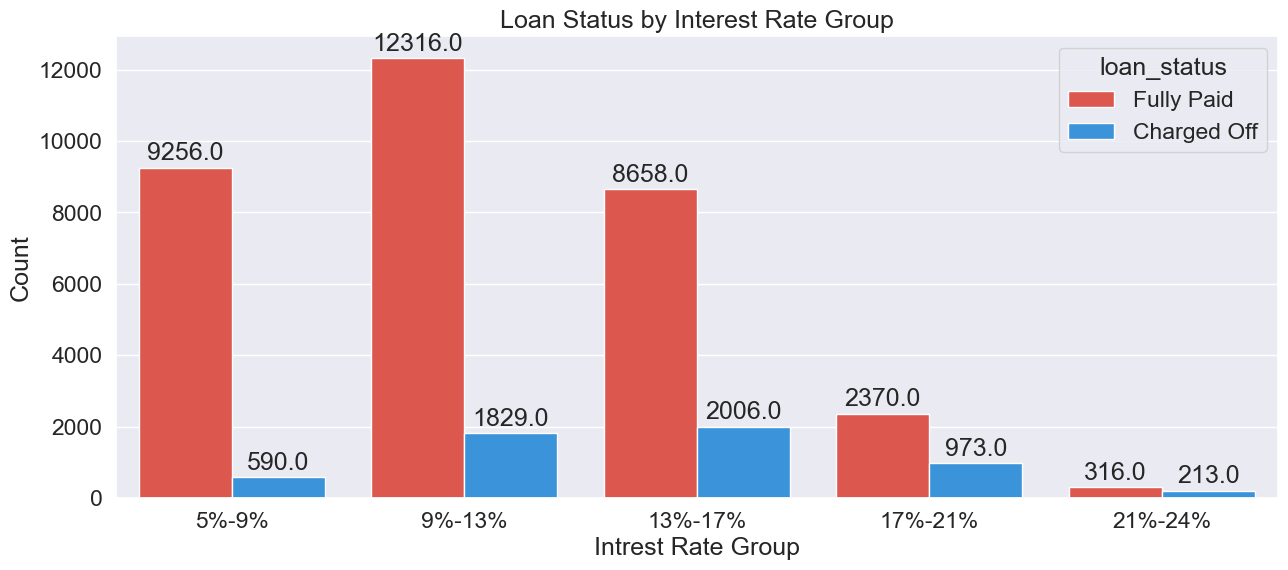

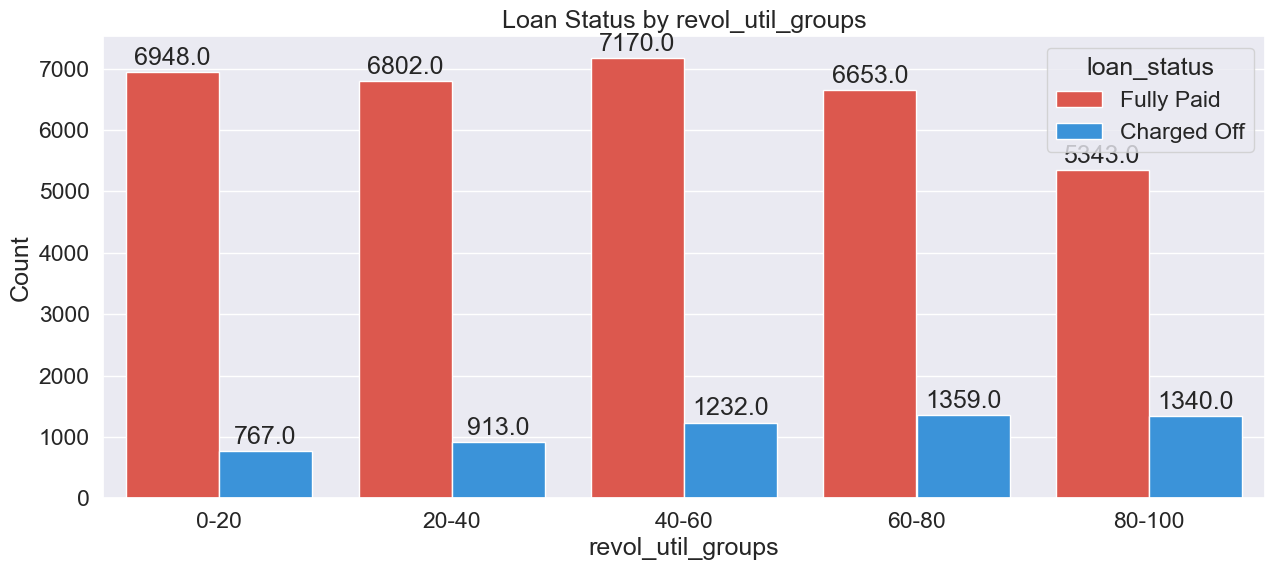

In [1384]:
# Define a function to add count labels to bars
def add_count_labels(ax):
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

sns.set_palette('colorblind')        
# Plot the loan status by term
plt.figure(figsize=(15, 6))
ax1 = sns.countplot(x='funded_amnt_inv_groups', hue='loan_status', data=loan_df, palette=custom_palette)
plt.title('Loan Status by Funded Amount Invested groups')
plt.xlabel('Funded Amount Invested groups')
plt.ylabel('Count')
add_count_labels(ax1)
plt.show()

# Plot the loan status by verification status
plt.figure(figsize=(15, 6))
ax2 = sns.countplot(x='int_rate_groups', hue='loan_status', data=loan_df, palette=custom_palette)
plt.title('Loan Status by Interest Rate Group')
plt.xlabel('Intrest Rate Group')
plt.ylabel('Count')
add_count_labels(ax2)
plt.show()

# Plot the loan status by public records
plt.figure(figsize=(15, 6))
ax3 = sns.countplot(x='revol_util_groups', hue='loan_status', data=loan_df, palette=custom_palette)
plt.title('Loan Status by revol_util_groups')
plt.xlabel('revol_util_groups')
plt.ylabel('Count')
add_count_labels(ax3)
plt.show()


### Conclusion : 

 - The people for whom the invested amount is in the range of 0 - 7000 are most likely to be the defaulters
 - The people whose interest rate is in the range of 13-17% are tend to default the laon followed by the people having the interest range between 9-13%
 - The people who are in the group of 60-80 revoling util are more likely to default the loans

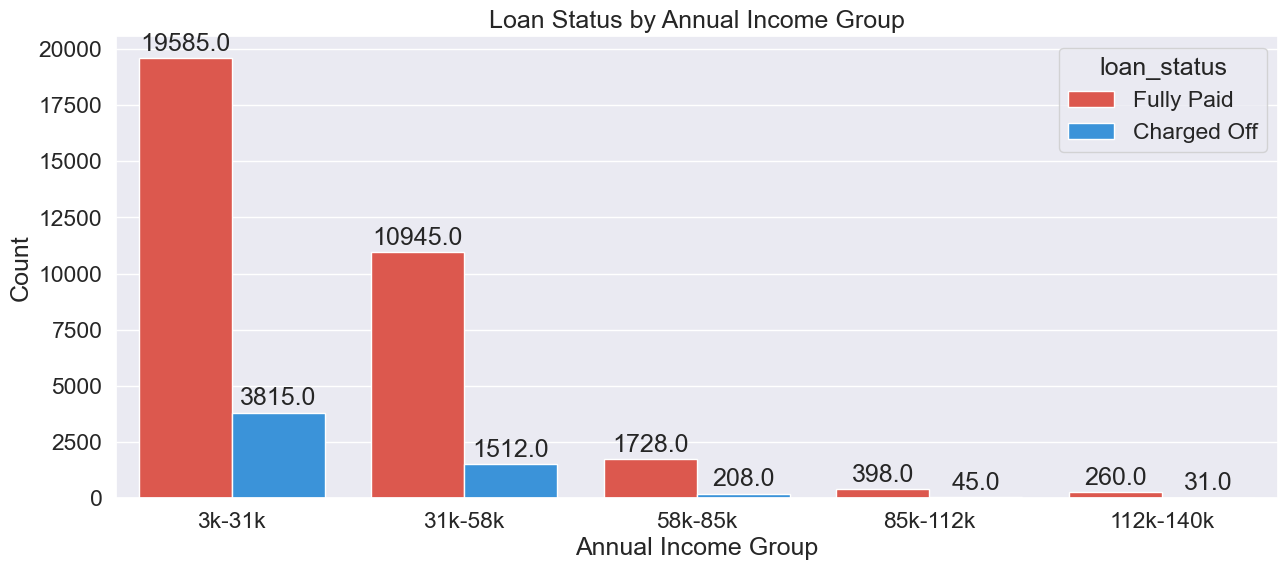

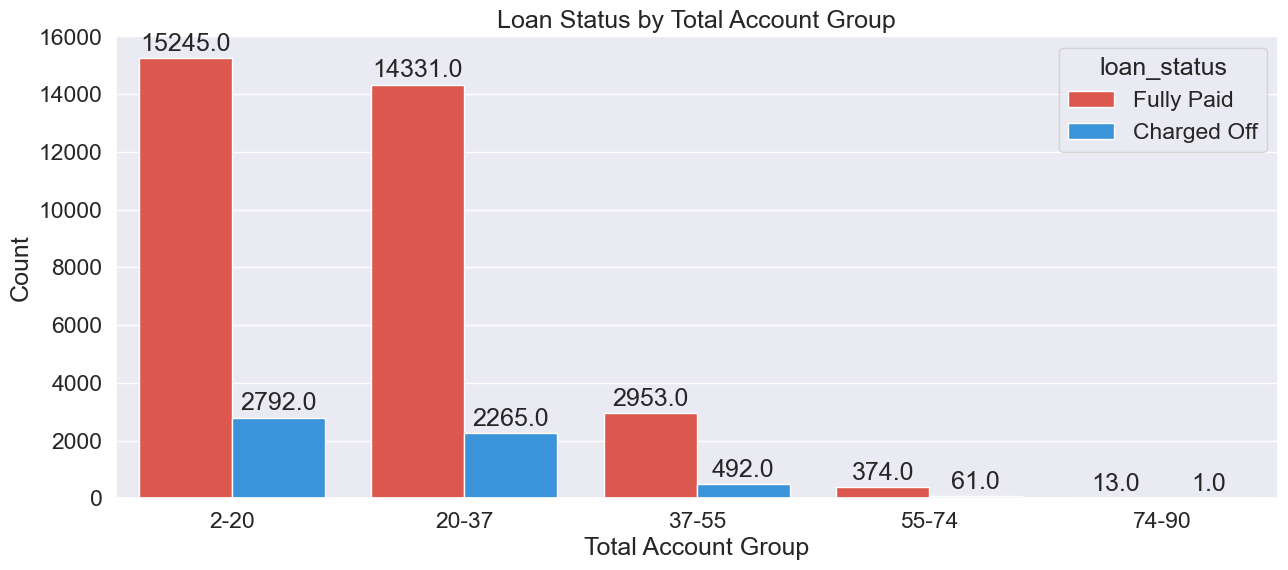

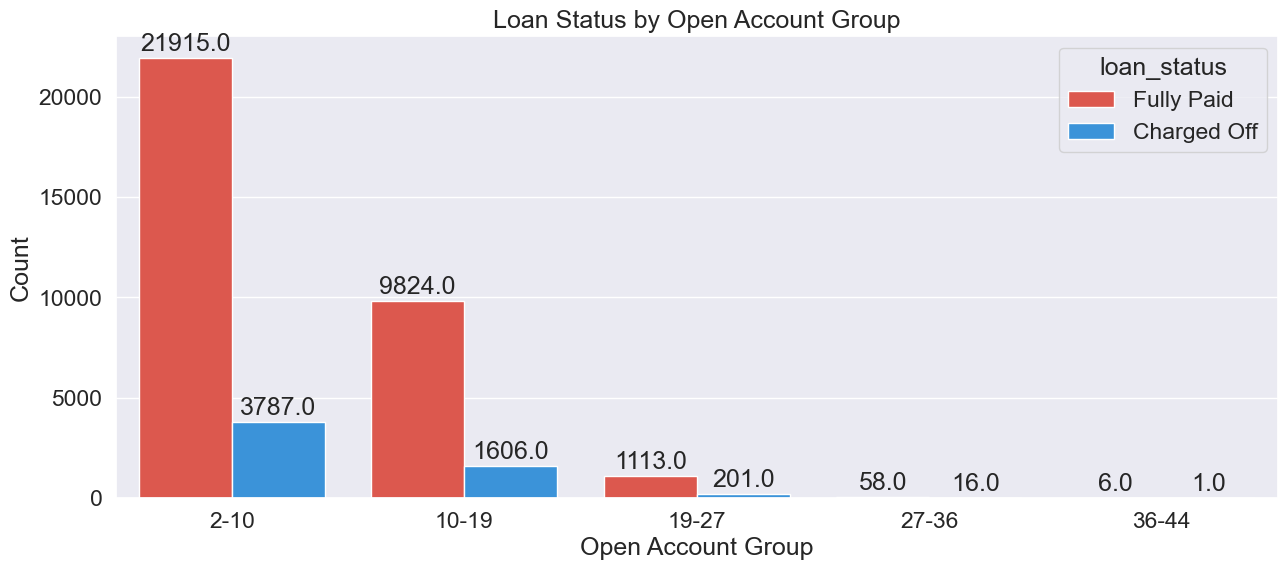

In [1385]:
# Define a function to add count labels to bars
def add_count_labels(ax):
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

sns.set_palette('colorblind')        
# Plot the loan status by term
plt.figure(figsize=(15, 6))
ax1 = sns.countplot(x='annual_inc_groups', hue='loan_status', data=loan_df, palette=custom_palette)
plt.title('Loan Status by Annual Income Group')
plt.xlabel('Annual Income Group')
plt.ylabel('Count')
add_count_labels(ax1)
plt.show()

# Plot the loan status by verification status
plt.figure(figsize=(15, 6))
ax2 = sns.countplot(x='total_acc_groups', hue='loan_status', data=loan_df, palette=custom_palette)
plt.title('Loan Status by Total Account Group')
plt.xlabel('Total Account Group')
plt.ylabel('Count')
add_count_labels(ax2)
plt.show()

# Plot the loan status by public records
plt.figure(figsize=(15, 6))
ax3 = sns.countplot(x='open_acc_groups', hue='loan_status', data=loan_df, palette=custom_palette)
plt.title('Loan Status by Open Account Group')
plt.xlabel('Open Account Group')
plt.ylabel('Count')
add_count_labels(ax3)
plt.show()


### Conclusion :

 - The people who have less income that is in the range of 3 - 31k are more likely to be the defaulters 
 - The people have Total Accounts in the range of 2-20 are more likely to be the defaulters
 - The people who have the open accounts in the range of 2-10 are more likely to be the defaulters as the reason could be that they are unable to manage their finances 

In [1386]:
## Extracting month and year
month_year = loan_df['issue_d'].str.partition("-", True)     
loan_df['issue_month']= month_year[0]                       
loan_df['issue_year']='20' + month_year[2]

In [1387]:
loan_df.head(4)

loan_amnt  funded_amnt_inv  term  int_rate  installment grade sub_grade  \
0       5000           4975.0     3     10.65       162.87     B        B2   
1       2500           2500.0     5     15.27        59.83     C        C4   
2       2400           2400.0     3     15.96        84.33     C        C5   
3      10000          10000.0     3     13.49       339.31     C        C1   

   emp_length home_ownership  annual_inc verification_status issue_d  \
0          10           RENT     24000.0            Verified  Dec-11   
1           0           RENT     30000.0     Source Verified  Dec-11   
2          10           RENT     12252.0        Not Verified  Dec-11   
3          10           RENT     49200.0     Source Verified  Dec-11   

   loan_status         purpose    dti earliest_cr_line  inq_last_6mths  \
0   Fully Paid     credit_card  27.65           Jan-85               1   
1  Charged Off             car   1.00           Apr-99               5   
2   Fully Paid  small_business   8.72           Nov-01               2   
3   Fully Paid           other  20.00           Feb-96               1   

   open_acc  pub_rec  revol_util  total_acc funded_amnt_inv_groups  \
0         3        0        83.7          9                  0k-7k   
1         3        0         9.4          4                  0k-7k   
2         2        0        98.5         10                  0k-7k   
3        10        0        21.0         37                 7k-14k   

  int_rate_groups open_acc_groups revol_util_groups total_acc_groups  \
0          9%-13%            2-10            80-100             2-20   
1         13%-17%            2-10              0-20             2-20   
2         13%-17%            2-10            80-100             2-20   
3         13%-17%            2-10             20-40            20-37   

  annual_inc_groups loan_amnt_groups dti_groups installment_groups  \
0            3k-31k            0k-7k      24-30              0-251   
1            3k-31k            0k-7k        0-6              0-251   
2            3k-31k            0k-7k       6-12              0-251   
3            3k-31k           7k-14k      18-24            251-502   

  issue_month issue_year  
0         Dec       2011  
1         Dec       2011  
2         Dec       2011  
3         Dec       2011

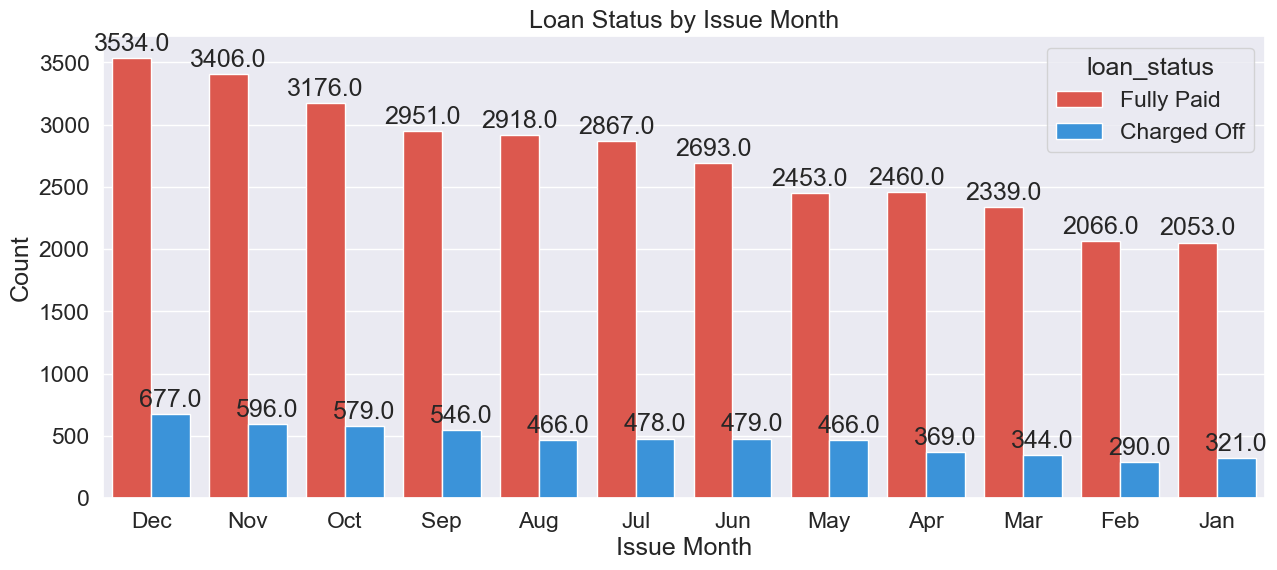

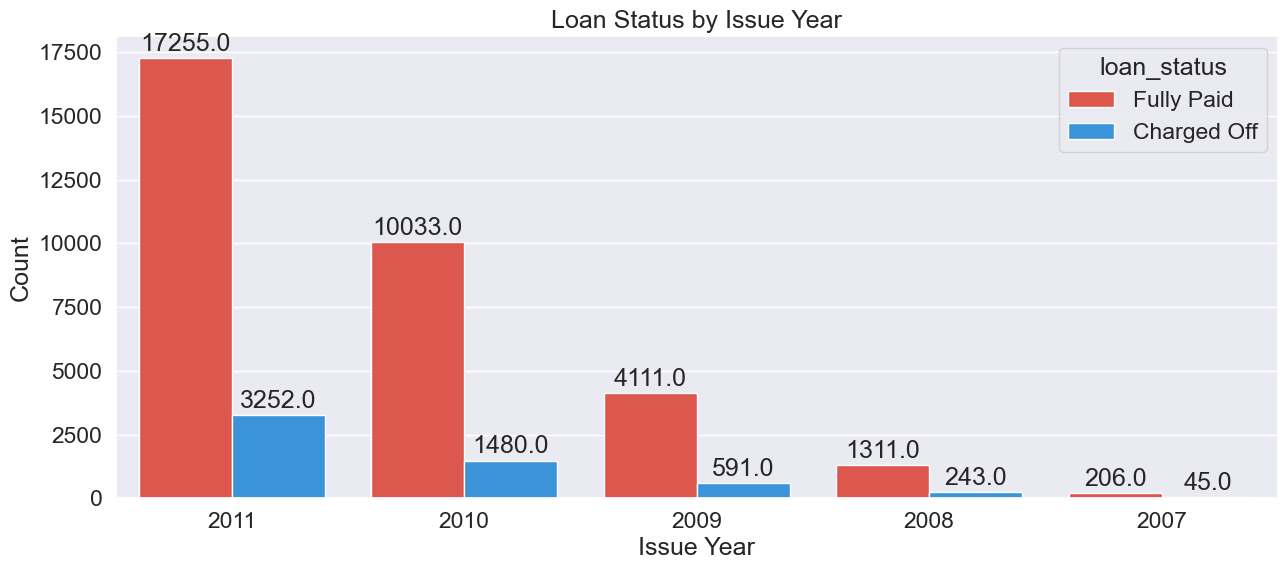

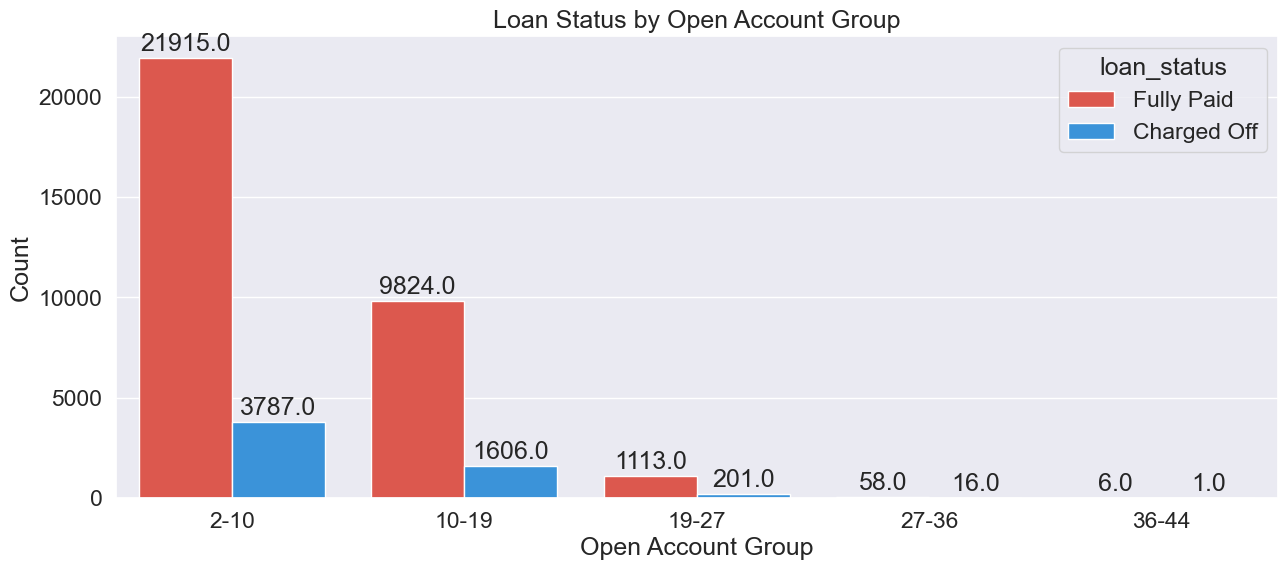

In [1388]:
# Define a function to add count labels to bars
def add_count_labels(ax):
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

sns.set_palette('colorblind')        
# Plot the loan status by term
plt.figure(figsize=(15, 6))
ax1 = sns.countplot(x='issue_month', hue='loan_status', data=loan_df, palette=custom_palette)
plt.title('Loan Status by Issue Month')
plt.xlabel('Issue Month')
plt.ylabel('Count')
add_count_labels(ax1)
plt.show()

# Plot the loan status by verification status
plt.figure(figsize=(15, 6))
ax2 = sns.countplot(x='issue_year', hue='loan_status', data=loan_df, palette=custom_palette)
plt.title('Loan Status by Issue Year')
plt.xlabel('Issue Year')
plt.ylabel('Count')
add_count_labels(ax2)
plt.show()

# Plot the loan status by public records
plt.figure(figsize=(15, 6))
ax3 = sns.countplot(x='open_acc_groups', hue='loan_status', data=loan_df, palette=custom_palette)
plt.title('Loan Status by Open Account Group')
plt.xlabel('Open Account Group')
plt.ylabel('Count')
add_count_labels(ax3)
plt.show()


### Conclusion :

 - The people who have take the loan in the month of the December are more likely to be in the list of defaulters
 - The people who have taken the loan in the year of 2011 are more likely to be the defaulters 
 - The reason for the above case could be that the country could have the financial crisis

In [1389]:
# list of Categorical columns------
Categorical_col =[]
Cat_col = loan_df.select_dtypes(exclude =[np.number])

for i in Cat_col:
    Categorical_col.append(i)
print('Categorical Columns:',Categorcal_col)
print('-'*123)



#List of Numeriacl Columns-------
Numerical_col =[]
Num_col = loan_df.select_dtypes(include =[np.number])

for i in Num_col:
    Numerical_col.append(i)
print('Numerical Columns:',Numerical_Col)
    


Categorical Columns: ['int_rate', 'grade', 'sub_grade', 'emp_title', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']
---------------------------------------------------------------------------------------------------------------------------
Numerical Columns: ['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util', 'total_acc']


## Correlation 

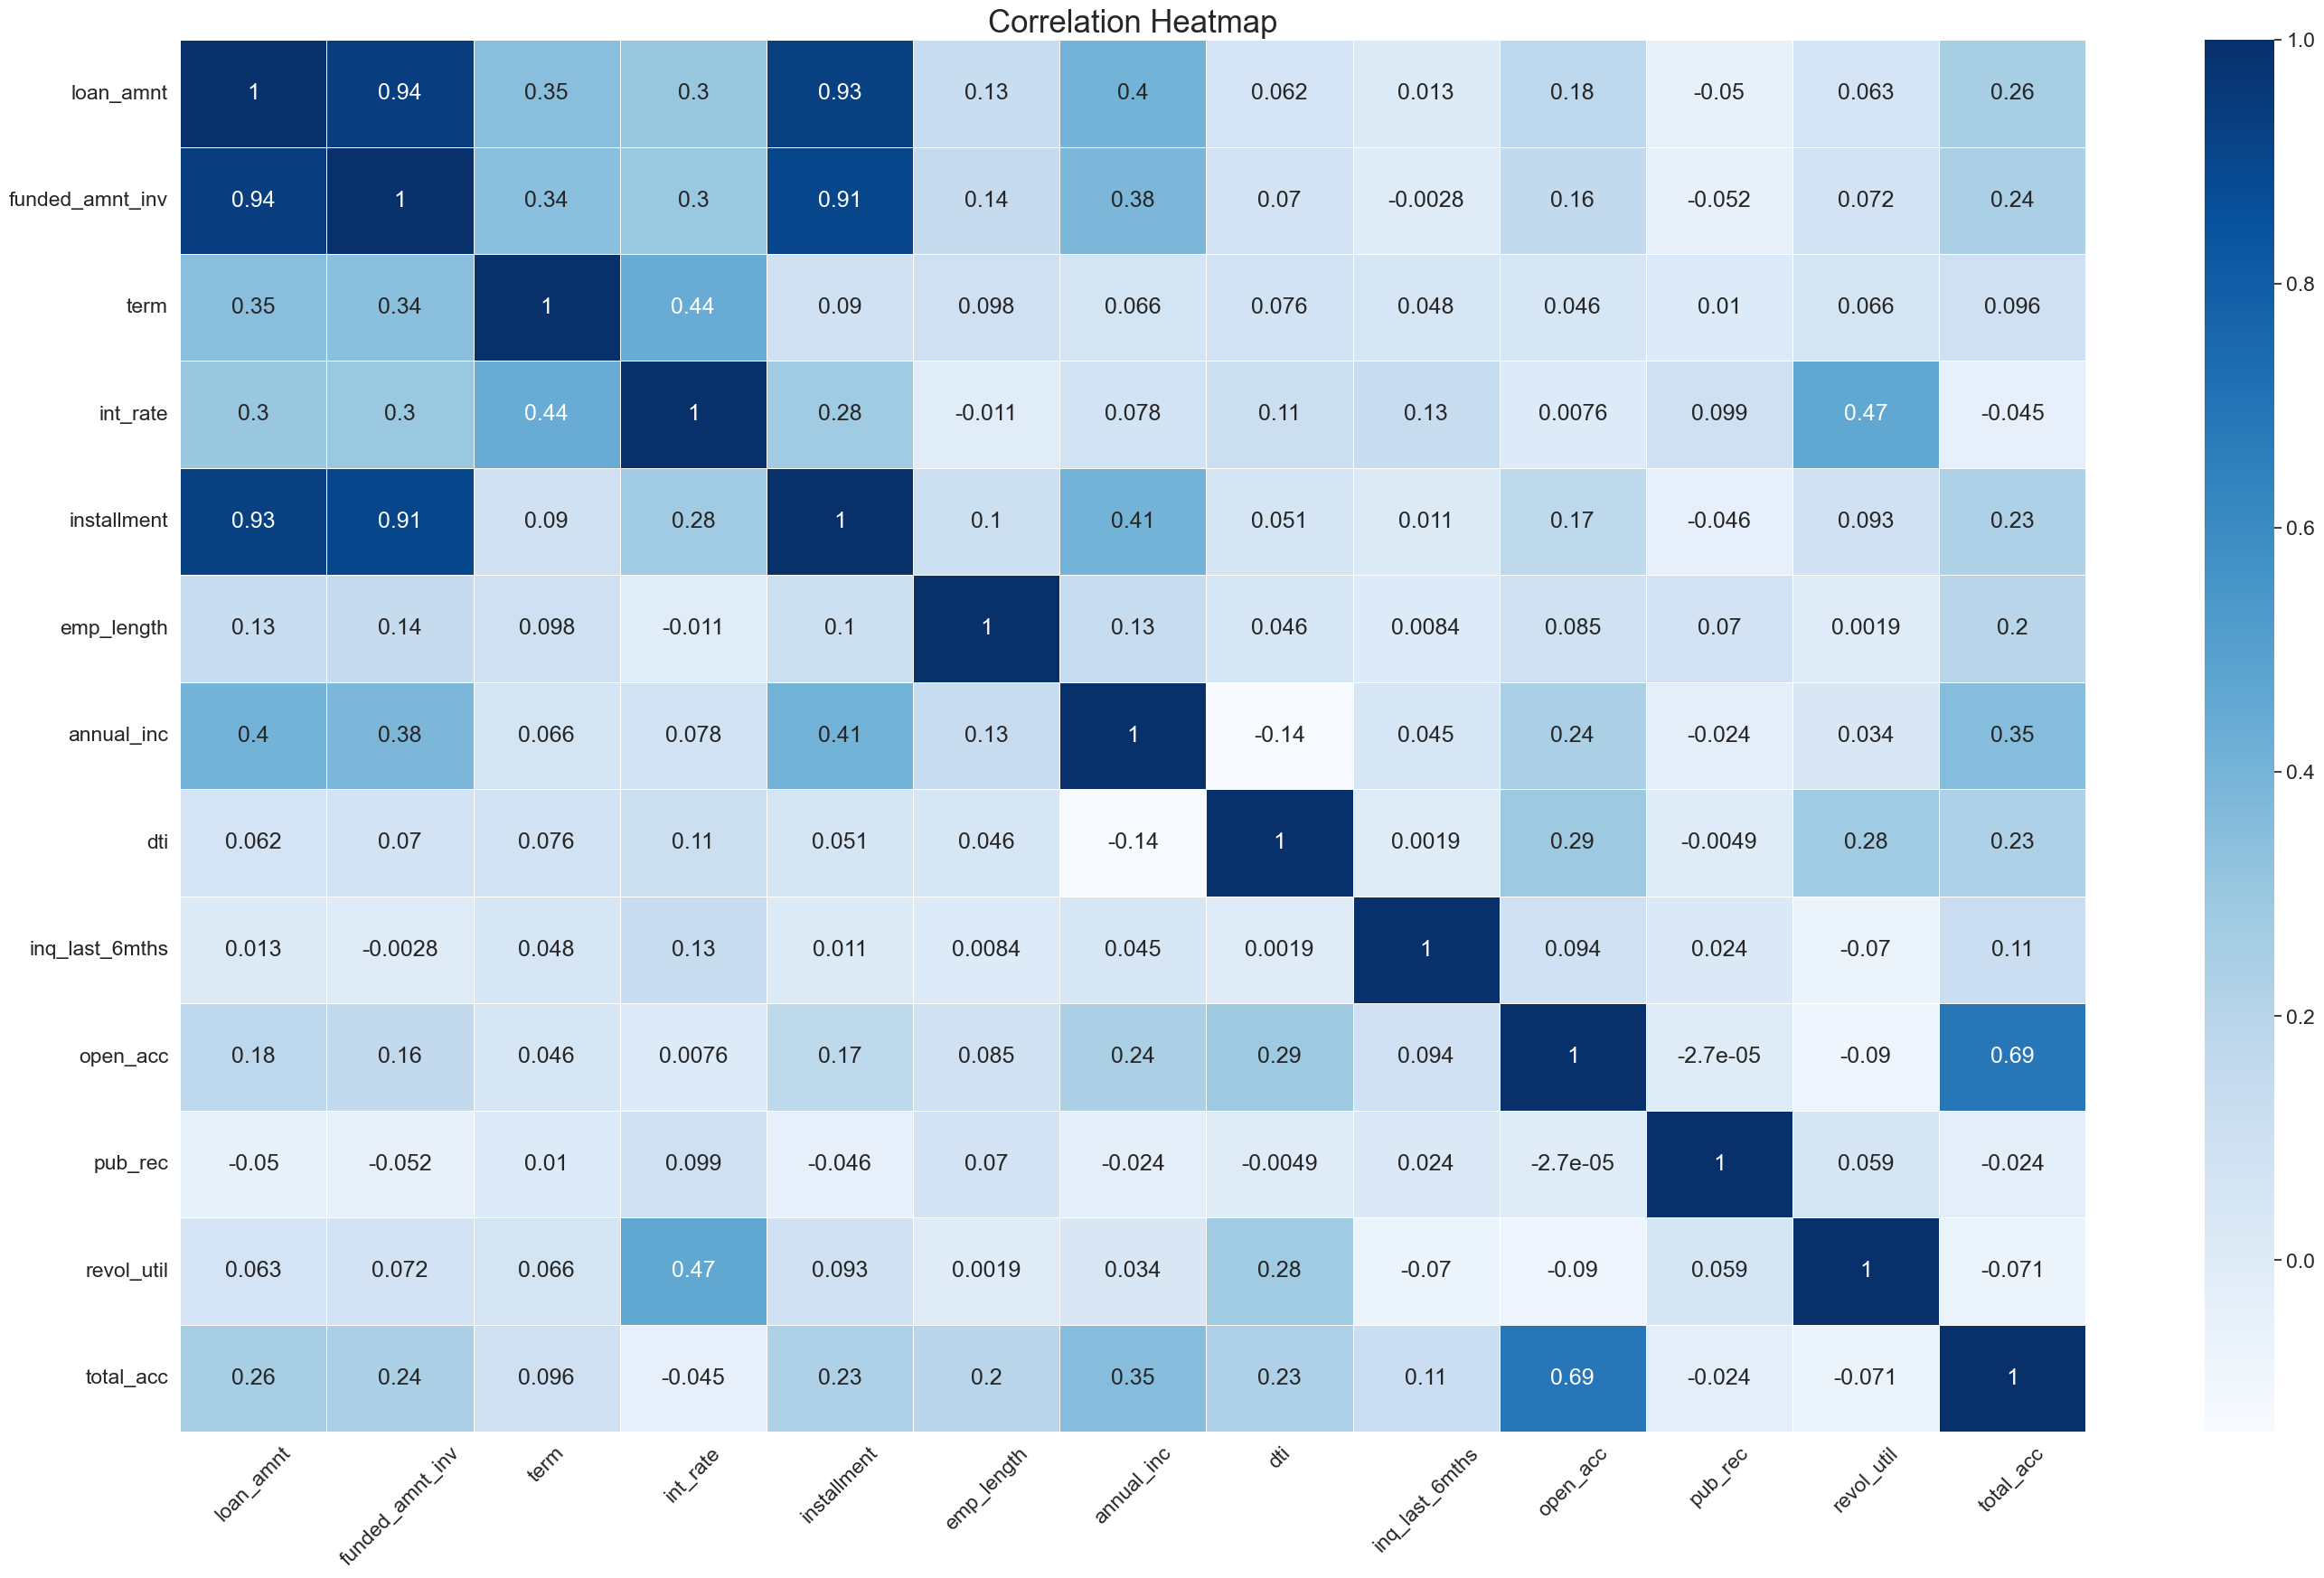

In [1390]:
#heatmap uses color code to show you the result  
# plt.figure(figsize = (15,8))
# sns.heatmap(df.corr() , annot = True , cmap ="Blues")

# Set font scale for better visibility of annotation text
sns.set(font_scale=1.5)

# Generate heatmap
plt.figure(figsize=(34, 20))
sns.heatmap((loan_df[ Numerical_col]).corr(), annot=True, cmap="Blues", linewidths=0.5, linecolor='white')

# Set title
plt.title("Correlation Heatmap", fontsize=25)

# Rotate x-axis tick labels for better visibility
plt.xticks(rotation=45)

# Show plot
plt.show()

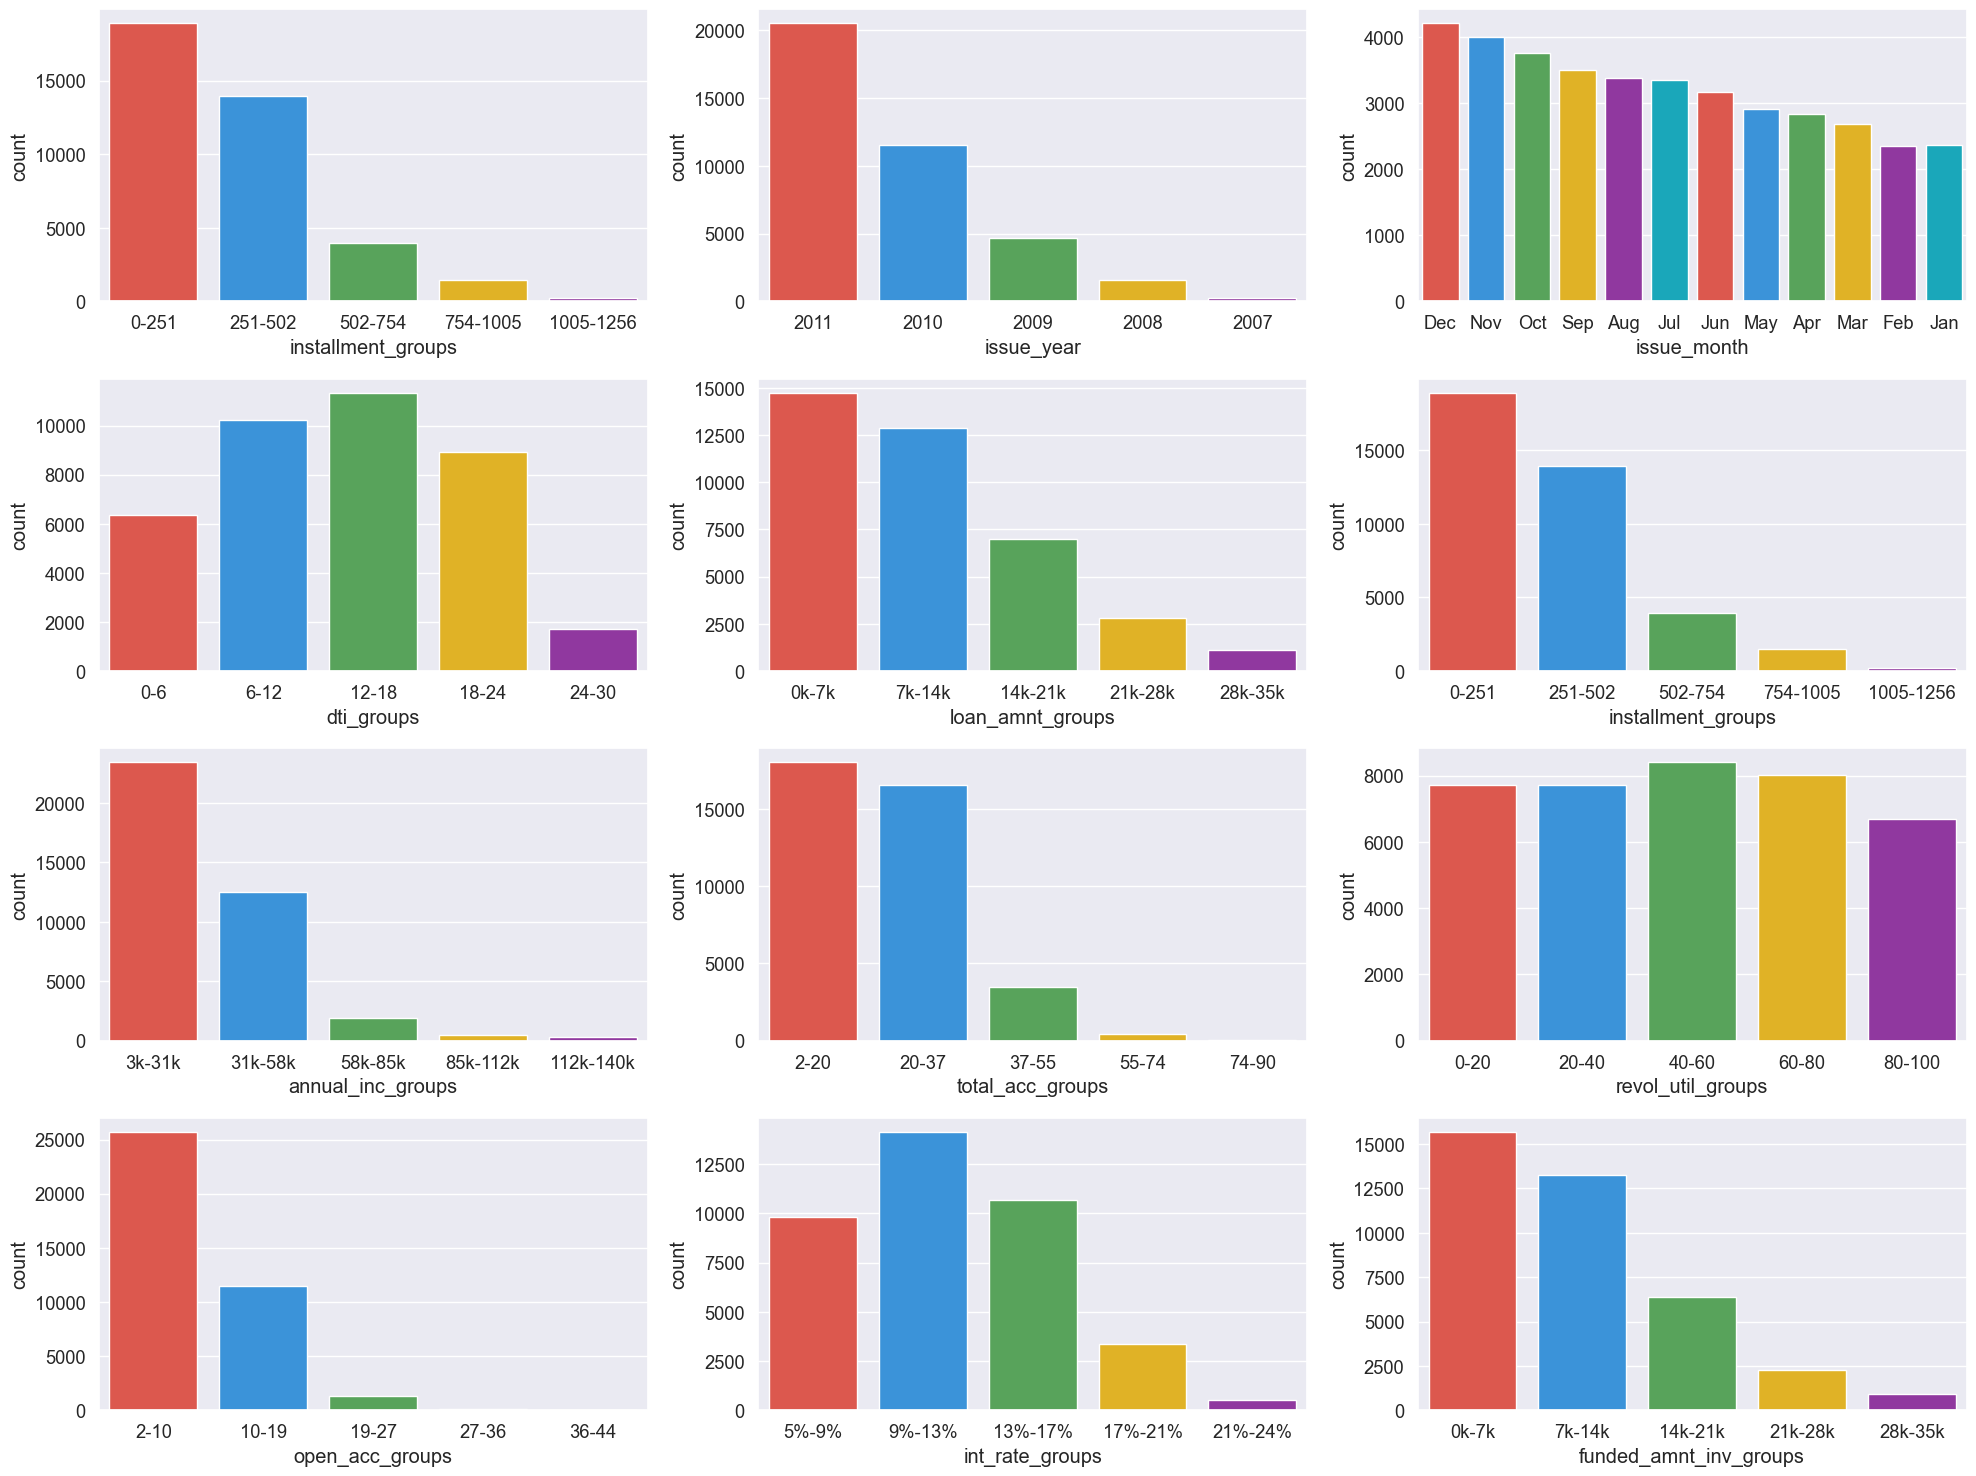

In [1148]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))

sns.countplot(x='installment_groups', data=loan_df, ax=axs[0, 0], palette=custom_palette)
sns.countplot(x='issue_year', data=loan_df, ax=axs[0, 1], palette=custom_palette)
sns.countplot(x='issue_month', data=loan_df, ax=axs[0, 2] ,palette=custom_palette)
sns.countplot(x='dti_groups', data=loan_df, ax=axs[1, 0], palette=custom_palette)
sns.countplot(x='loan_amnt_groups', data=loan_df, ax=axs[1, 1],palette=custom_palette)
sns.countplot(x='installment_groups', data=loan_df, ax=axs[1, 2], palette=custom_palette)
sns.countplot(x='annual_inc_groups', data=loan_df, ax=axs[2, 0], palette=custom_palette)
sns.countplot(x='total_acc_groups', data=loan_df, ax=axs[2, 1], palette=custom_palette)
sns.countplot(x='revol_util_groups', data=loan_df, ax=axs[2, 2], palette=custom_palette)
sns.countplot(x='open_acc_groups', data=loan_df, ax=axs[3, 0], palette=custom_palette)
sns.countplot(x='int_rate_groups', data=loan_df, ax=axs[3, 1], palette=custom_palette)
sns.countplot(x='funded_amnt_inv_groups', data=loan_df, ax=axs[3, 2], palette=custom_palette)

plt.tight_layout()
plt.show()


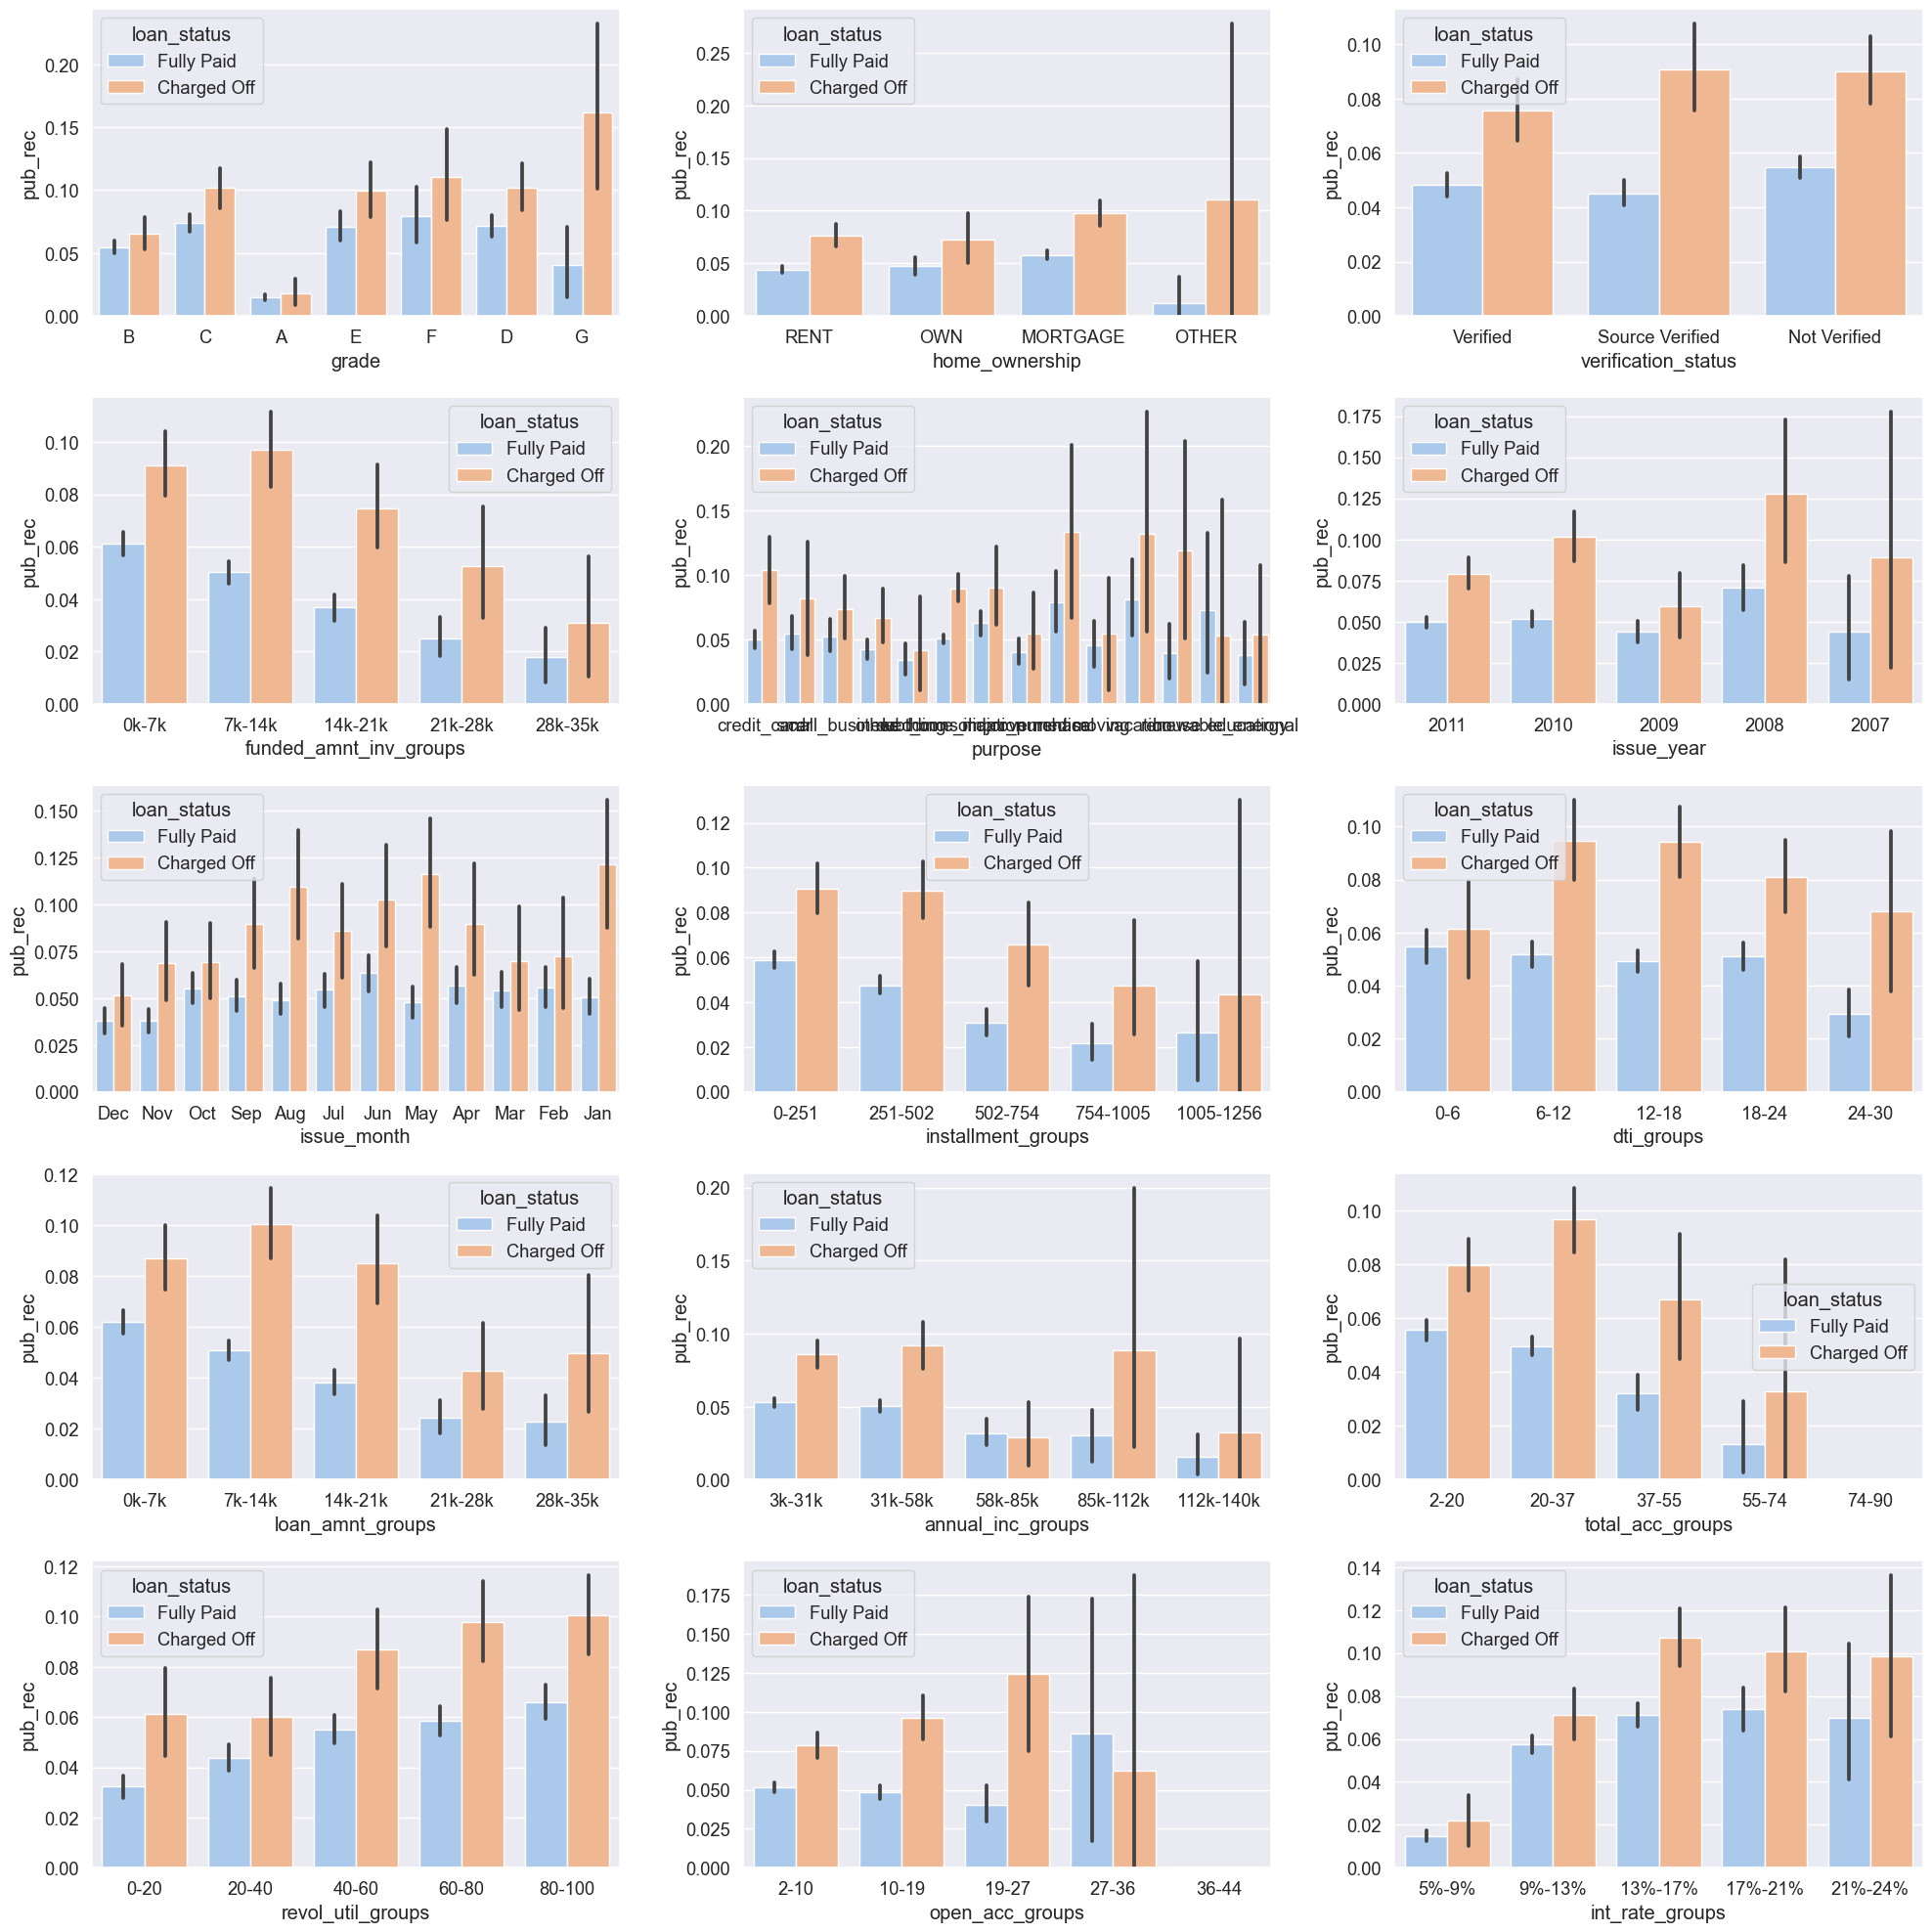

In [1149]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(ncols=3, nrows=5, figsize=(20, 20))

sns.barplot(data=loan_df, y='pub_rec', x='grade', hue='loan_status', palette="pastel", ax=axs[0][0])
sns.barplot(data=loan_df, y='pub_rec', x='home_ownership', hue='loan_status', palette="pastel", ax=axs[0][1])
sns.barplot(data=loan_df, y='pub_rec', x='verification_status', hue='loan_status', palette="pastel", ax=axs[0][2])
sns.barplot(data=loan_df, y='pub_rec', x='funded_amnt_inv_groups', hue='loan_status', palette="pastel", ax=axs[1][0])
sns.barplot(data=loan_df, y='pub_rec', x='purpose', hue='loan_status', palette="pastel", ax=axs[1][1])
sns.barplot(data=loan_df, y='pub_rec', x='issue_year', hue='loan_status', palette="pastel", ax=axs[1][2])
sns.barplot(data=loan_df, y='pub_rec', x='issue_month', hue='loan_status', palette="pastel", ax=axs[2][0])
sns.barplot(data=loan_df, y='pub_rec', x='installment_groups', hue='loan_status', palette="pastel", ax=axs[2][1])
sns.barplot(data=loan_df, y='pub_rec', x='dti_groups', hue='loan_status', palette="pastel", ax=axs[2][2])
sns.barplot(data=loan_df, y='pub_rec', x='loan_amnt_groups', hue='loan_status', palette="pastel", ax=axs[3][0])
sns.barplot(data=loan_df, y='pub_rec', x='annual_inc_groups', hue='loan_status', palette="pastel", ax=axs[3][1])
sns.barplot(data=loan_df, y='pub_rec', x='total_acc_groups', hue='loan_status', palette="pastel", ax=axs[3][2])
sns.barplot(data=loan_df, y='pub_rec', x='revol_util_groups', hue='loan_status', palette="pastel", ax=axs[4][0])
sns.barplot(data=loan_df, y='pub_rec', x='open_acc_groups', hue='loan_status', palette="pastel", ax=axs[4][1])
sns.barplot(data=loan_df, y='pub_rec', x='int_rate_groups', hue='loan_status', palette="pastel", ax=axs[4][2])

plt.tight_layout()
plt.show()

# Loan Amount Analysis wrt other features

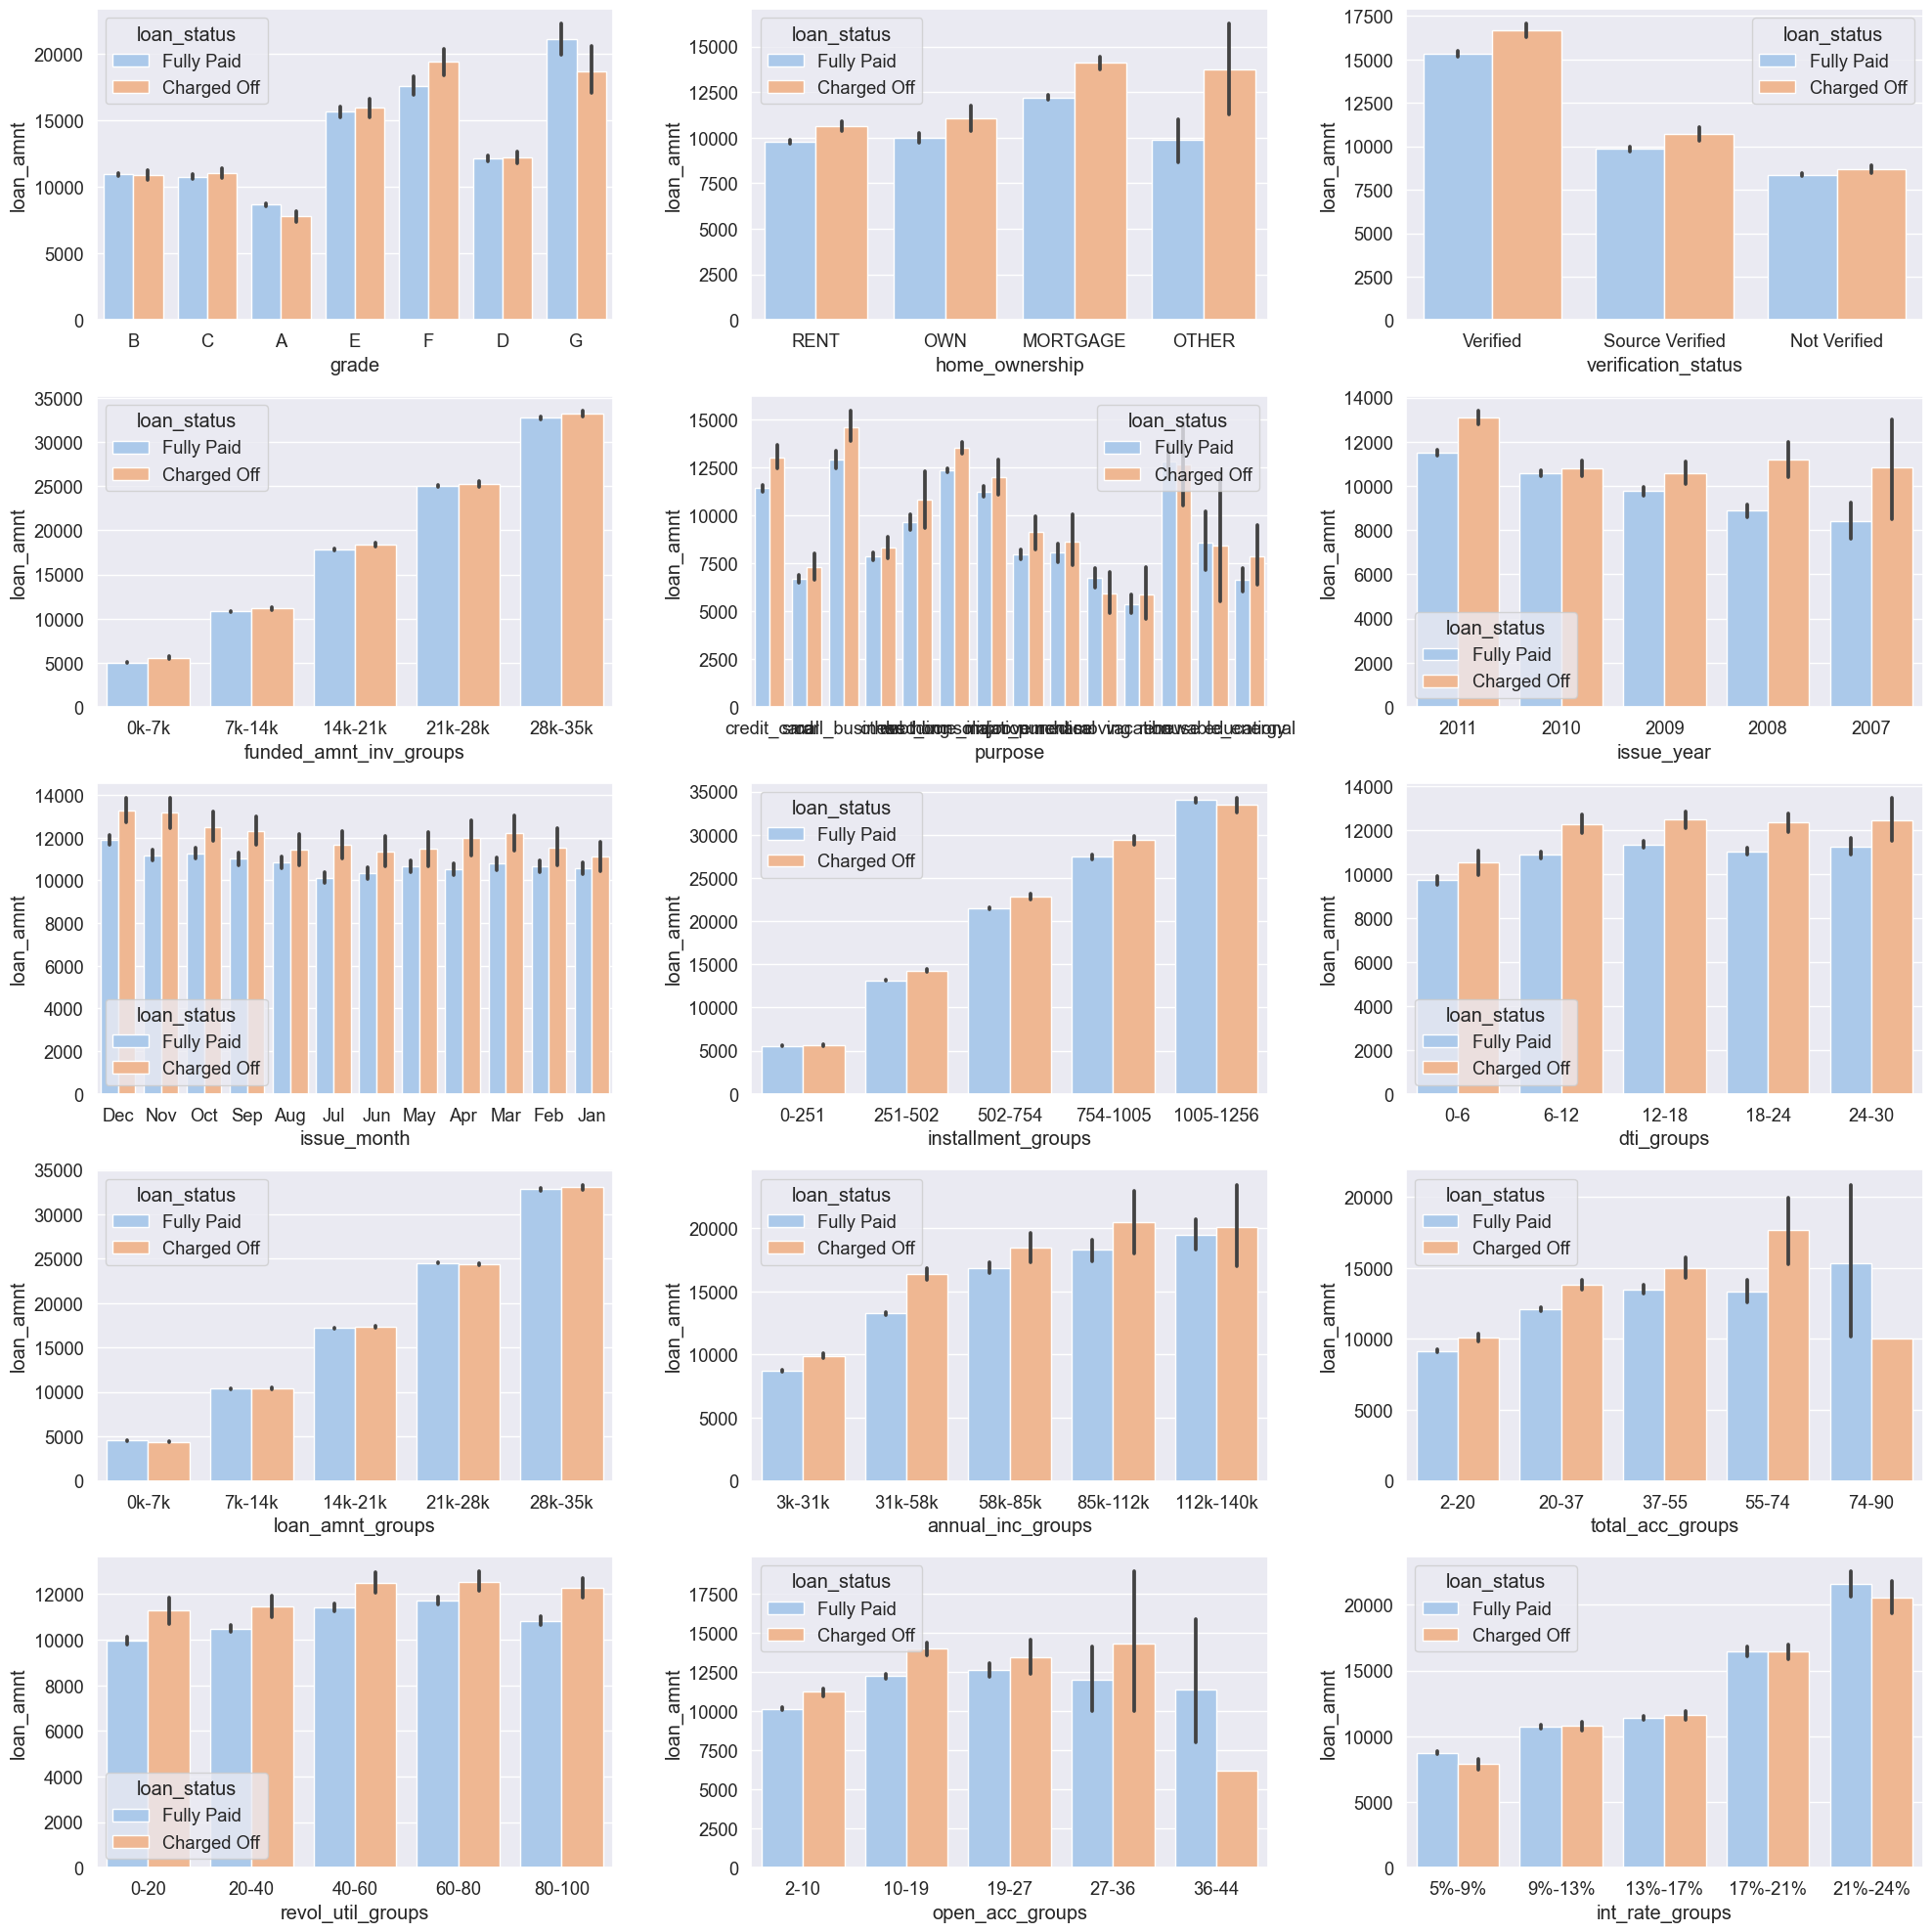

In [1152]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(ncols=3, nrows=5, figsize=(20, 20))

sns.barplot(data=loan_df, y='loan_amnt', x='grade', hue='loan_status', palette="pastel", ax=axs[0][0])
sns.barplot(data=loan_df, y='loan_amnt', x='home_ownership', hue='loan_status', palette="pastel", ax=axs[0][1])
sns.barplot(data=loan_df, y='loan_amnt', x='verification_status', hue='loan_status', palette="pastel", ax=axs[0][2])
sns.barplot(data=loan_df, y='loan_amnt', x='funded_amnt_inv_groups', hue='loan_status', palette="pastel", ax=axs[1][0])
sns.barplot(data=loan_df, y='loan_amnt', x='purpose', hue='loan_status', palette="pastel", ax=axs[1][1])
sns.barplot(data=loan_df, y='loan_amnt', x='issue_year', hue='loan_status', palette="pastel", ax=axs[1][2])
sns.barplot(data=loan_df, y='loan_amnt', x='issue_month', hue='loan_status', palette="pastel", ax=axs[2][0])
sns.barplot(data=loan_df, y='loan_amnt', x='installment_groups', hue='loan_status', palette="pastel", ax=axs[2][1])
sns.barplot(data=loan_df, y='loan_amnt', x='dti_groups', hue='loan_status', palette="pastel", ax=axs[2][2])
sns.barplot(data=loan_df, y='loan_amnt', x='loan_amnt_groups', hue='loan_status', palette="pastel", ax=axs[3][0])
sns.barplot(data=loan_df, y='loan_amnt', x='annual_inc_groups', hue='loan_status', palette="pastel", ax=axs[3][1])
sns.barplot(data=loan_df, y='loan_amnt', x='total_acc_groups', hue='loan_status', palette="pastel", ax=axs[3][2])
sns.barplot(data=loan_df, y='loan_amnt', x='revol_util_groups', hue='loan_status', palette="pastel", ax=axs[4][0])
sns.barplot(data=loan_df, y='loan_amnt', x='open_acc_groups', hue='loan_status', palette="pastel", ax=axs[4][1])
sns.barplot(data=loan_df, y='loan_amnt', x='int_rate_groups', hue='loan_status', palette="pastel", ax=axs[4][2])

plt.tight_layout()
plt.show()

### Conclusion :

 - The people who has been approved for the more loan amount are likely to fall in the grade F and are likely to be the defaulters
 - The people who have not stated there residential status and marked it as OTHER having quite high loan amount which is approved by the bank are more likely to be in the list of defaulters 
 - 

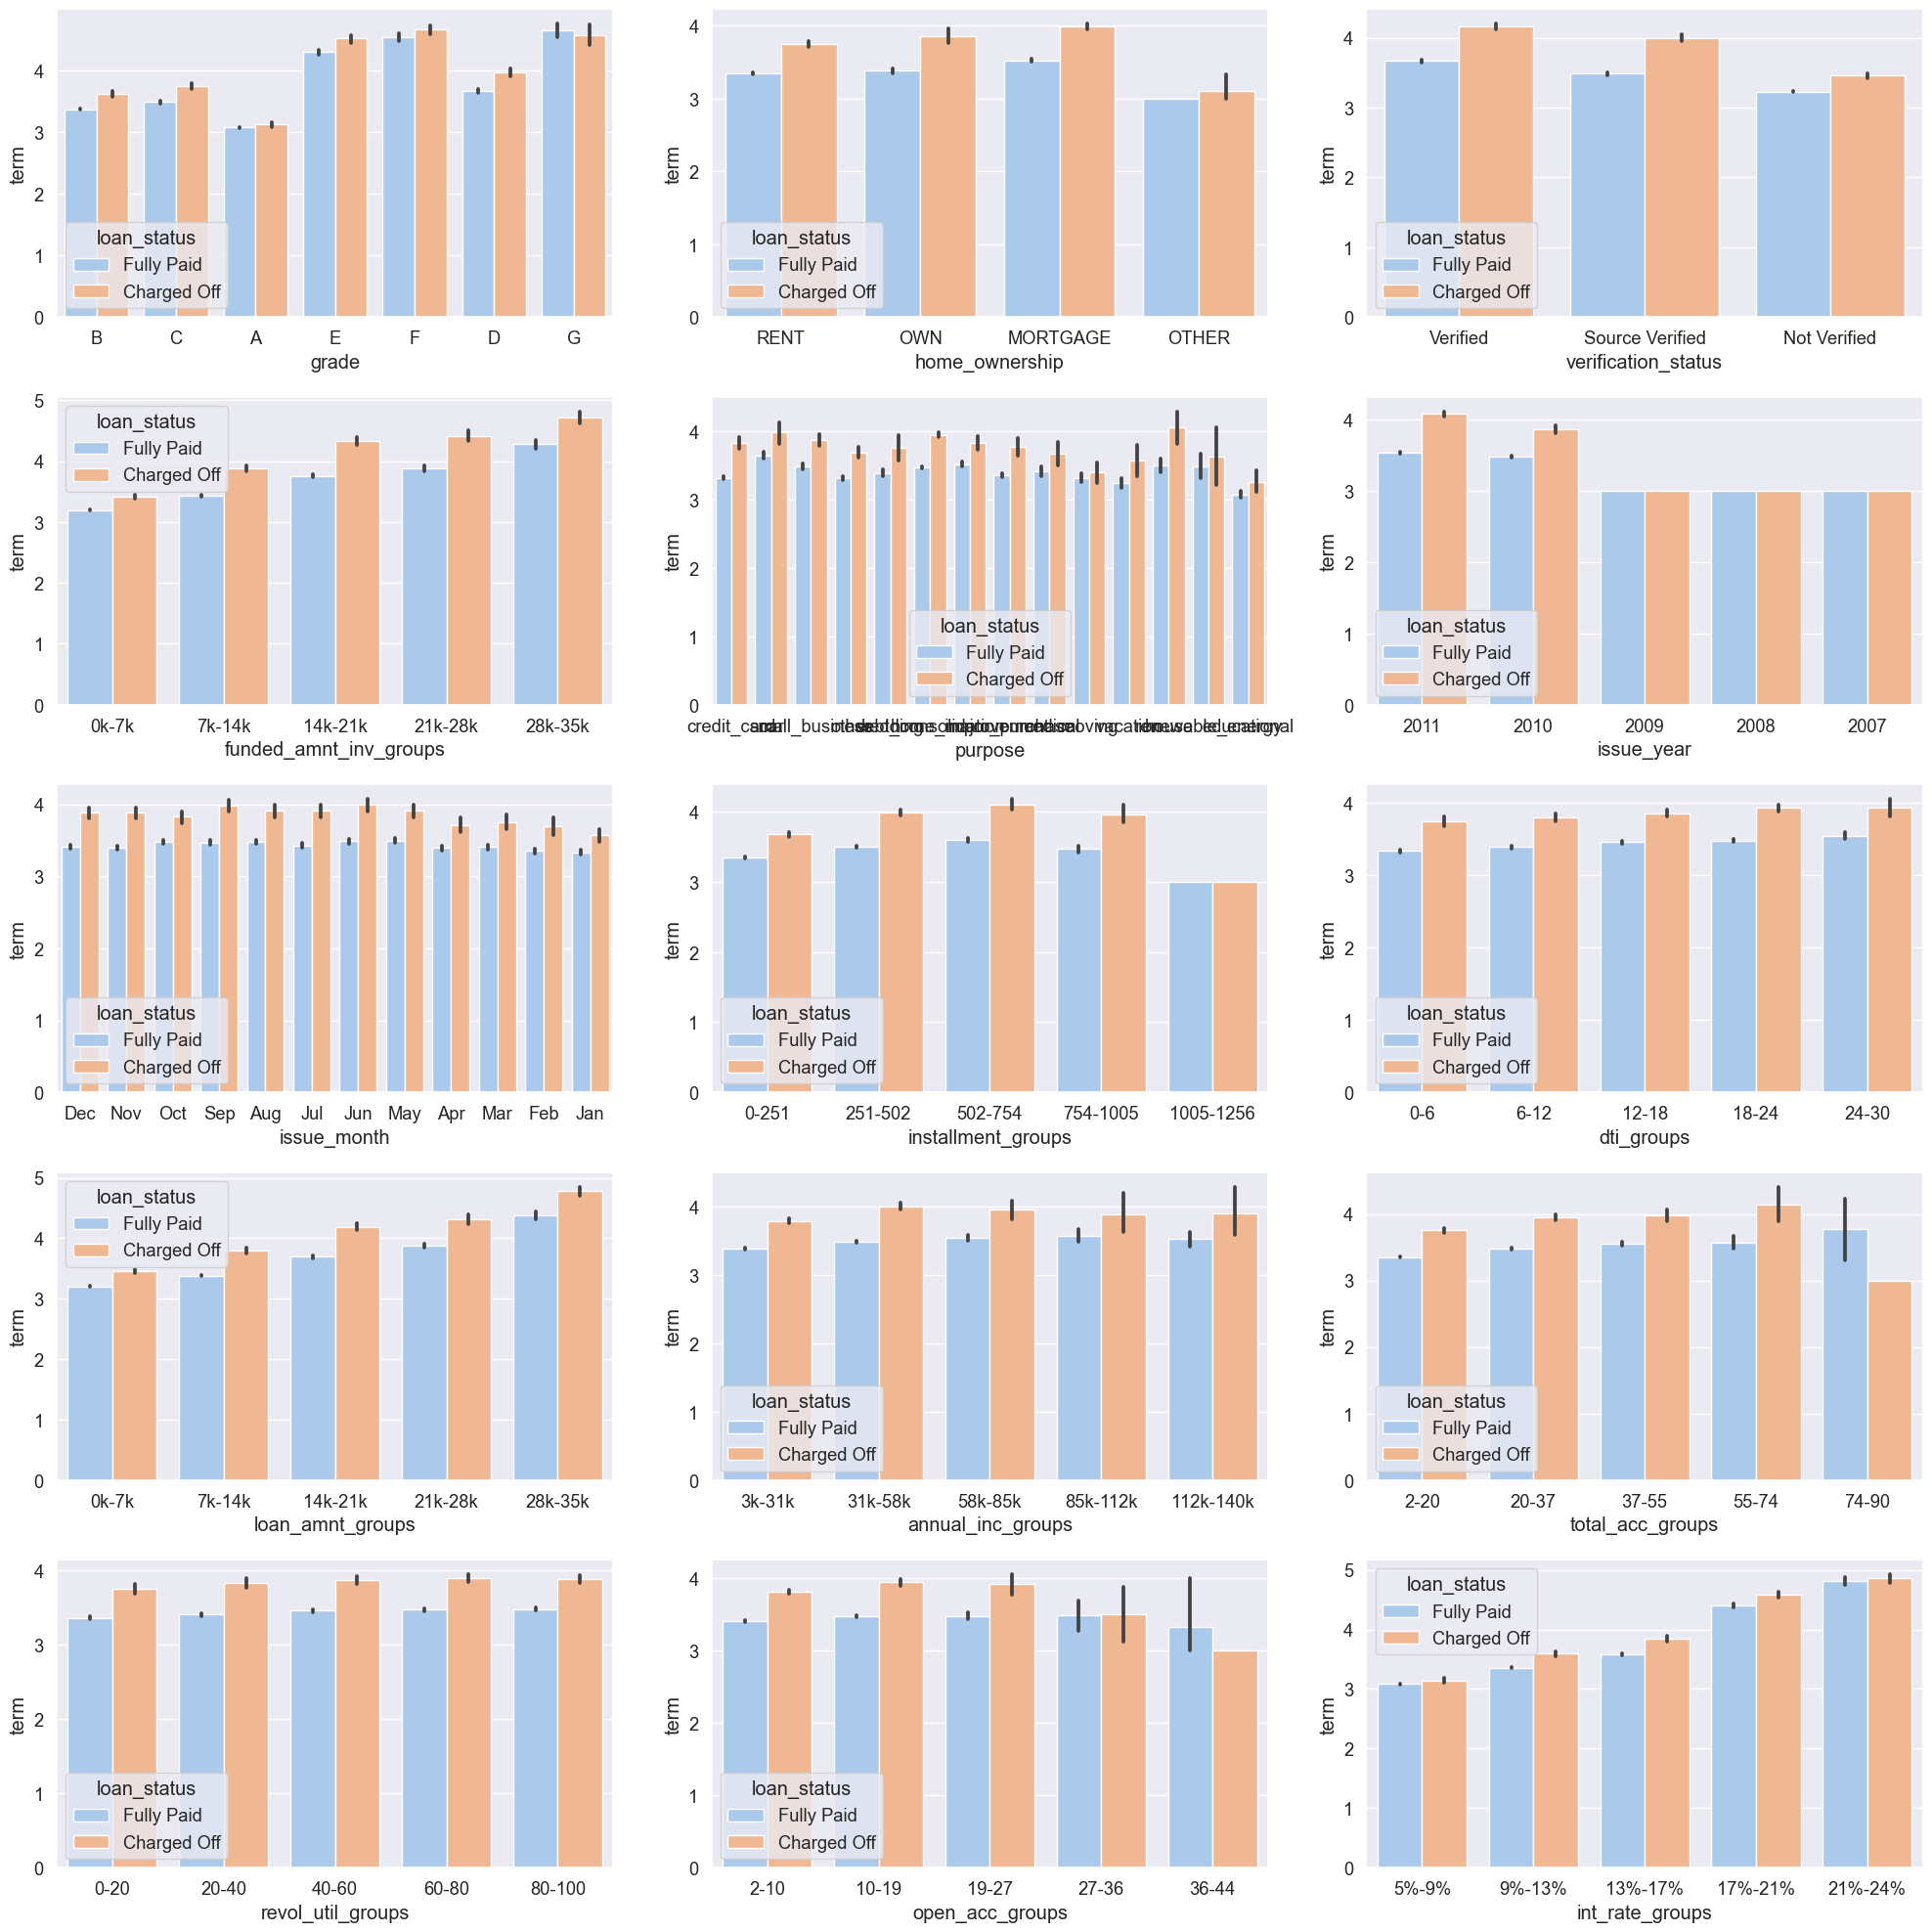

In [1153]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(ncols=3, nrows=5, figsize=(20, 20))

sns.barplot(data=loan_df, y='term', x='grade', hue='loan_status', palette="pastel", ax=axs[0][0])
sns.barplot(data=loan_df, y='term', x='home_ownership', hue='loan_status', palette="pastel", ax=axs[0][1])
sns.barplot(data=loan_df, y='term', x='verification_status', hue='loan_status', palette="pastel", ax=axs[0][2])
sns.barplot(data=loan_df, y='term', x='funded_amnt_inv_groups', hue='loan_status', palette="pastel", ax=axs[1][0])
sns.barplot(data=loan_df, y='term', x='purpose', hue='loan_status', palette="pastel", ax=axs[1][1])
sns.barplot(data=loan_df, y='term', x='issue_year', hue='loan_status', palette="pastel", ax=axs[1][2])
sns.barplot(data=loan_df, y='term', x='issue_month', hue='loan_status', palette="pastel", ax=axs[2][0])
sns.barplot(data=loan_df, y='term', x='installment_groups', hue='loan_status', palette="pastel", ax=axs[2][1])
sns.barplot(data=loan_df, y='term', x='dti_groups', hue='loan_status', palette="pastel", ax=axs[2][2])
sns.barplot(data=loan_df, y='term', x='loan_amnt_groups', hue='loan_status', palette="pastel", ax=axs[3][0])
sns.barplot(data=loan_df, y='term', x='annual_inc_groups', hue='loan_status', palette="pastel", ax=axs[3][1])
sns.barplot(data=loan_df, y='term', x='total_acc_groups', hue='loan_status', palette="pastel", ax=axs[3][2])
sns.barplot(data=loan_df, y='term', x='revol_util_groups', hue='loan_status', palette="pastel", ax=axs[4][0])
sns.barplot(data=loan_df, y='term', x='open_acc_groups', hue='loan_status', palette="pastel", ax=axs[4][1])
sns.barplot(data=loan_df, y='term', x='int_rate_groups', hue='loan_status', palette="pastel", ax=axs[4][2])

plt.tight_layout()
plt.show()


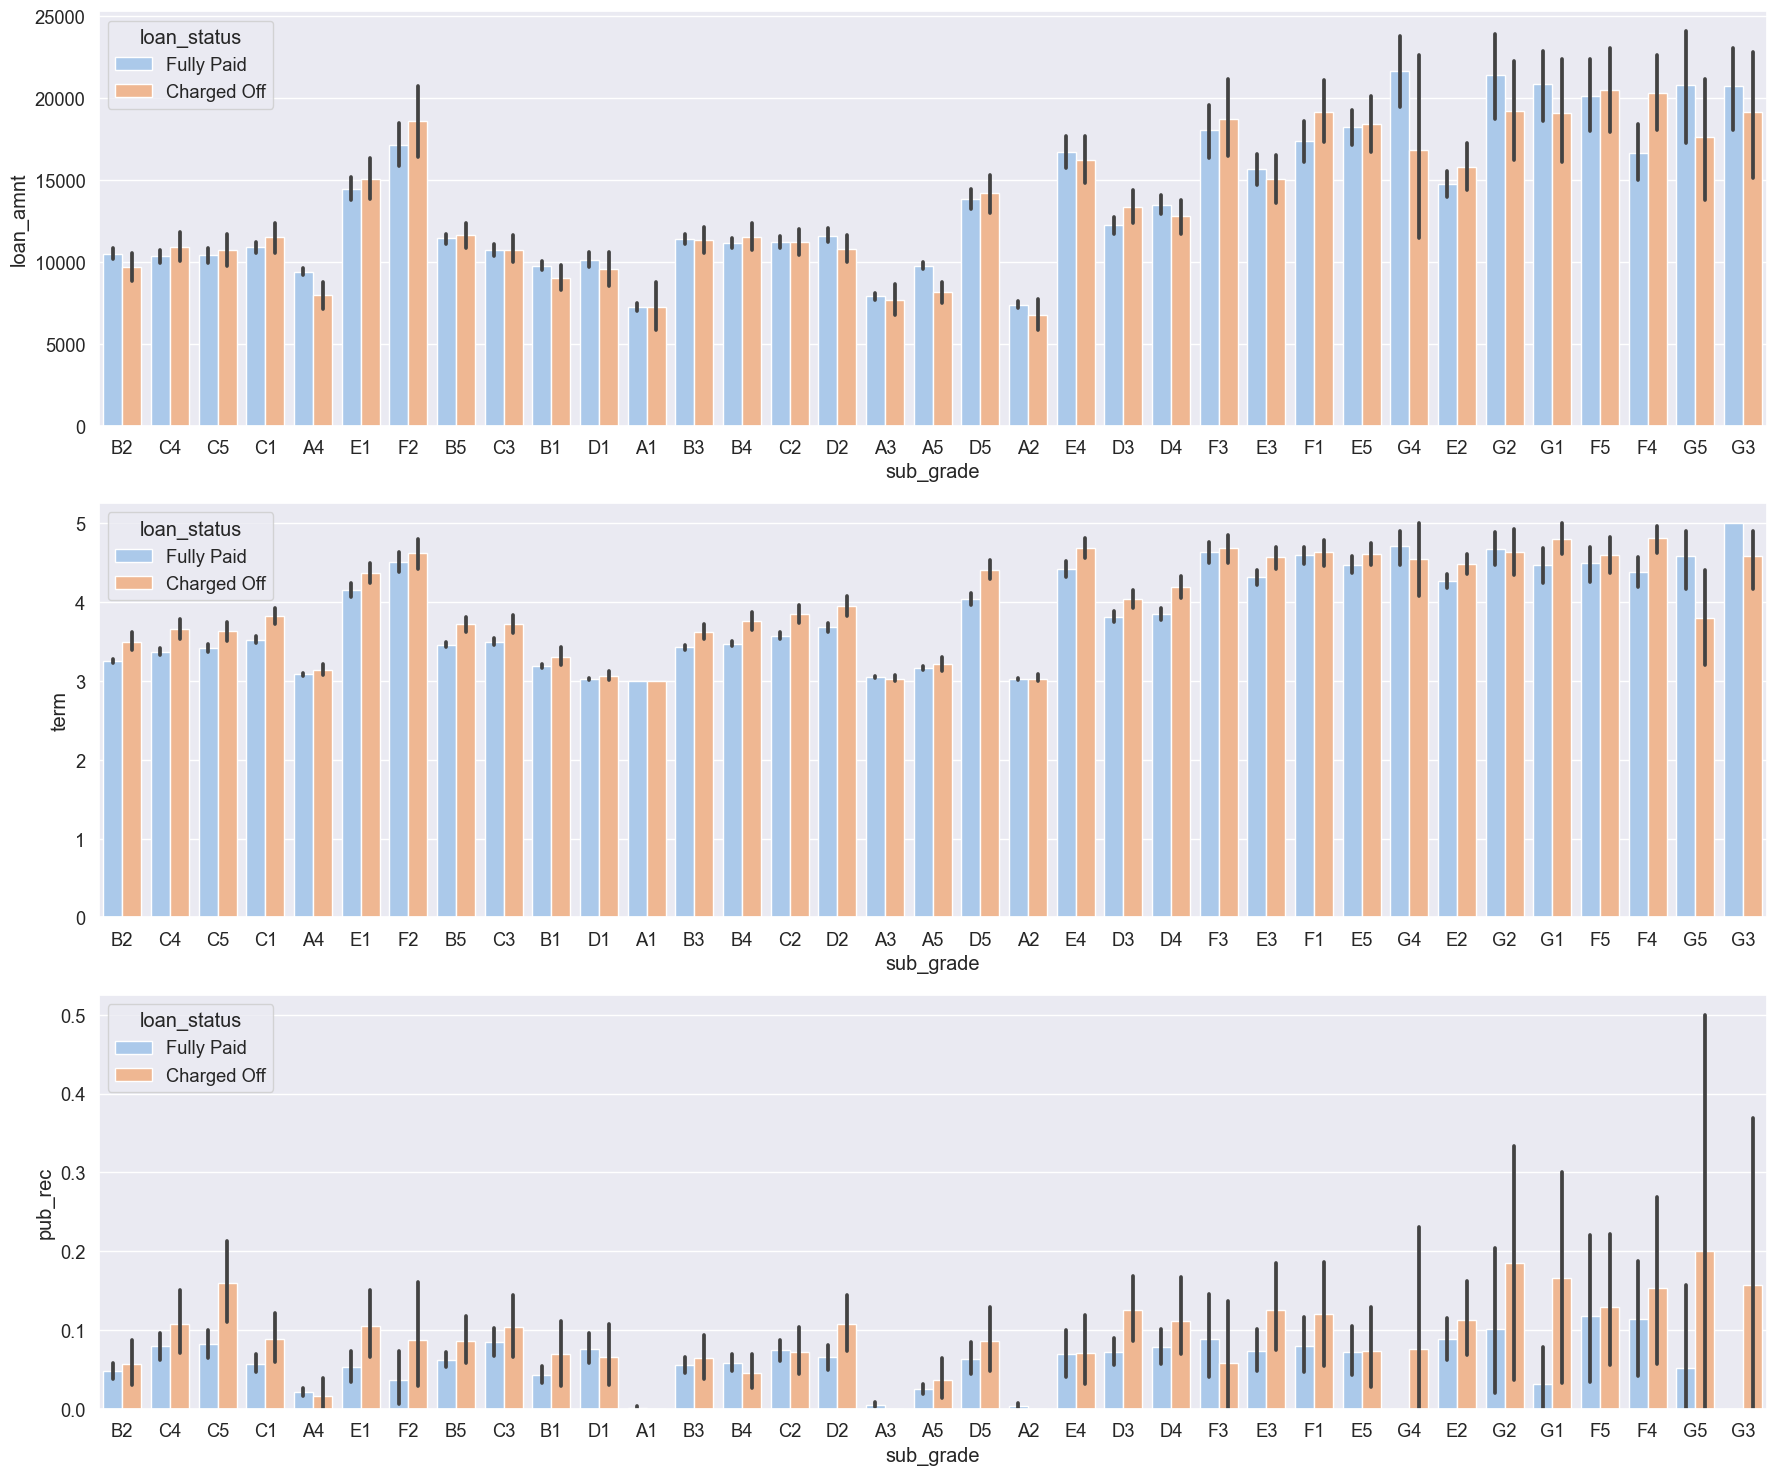

In [1154]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(18, 15))

sns.barplot(data=loan_df, y='loan_amnt', x='sub_grade', hue='loan_status', palette='pastel', ax=ax1)
sns.barplot(data=loan_df, y='term', x='sub_grade', hue='loan_status', palette='pastel', ax=ax2)
sns.barplot(data=loan_df, y='pub_rec', x='sub_grade', hue='loan_status', palette='pastel', ax=ax3)

plt.tight_layout()
plt.show()


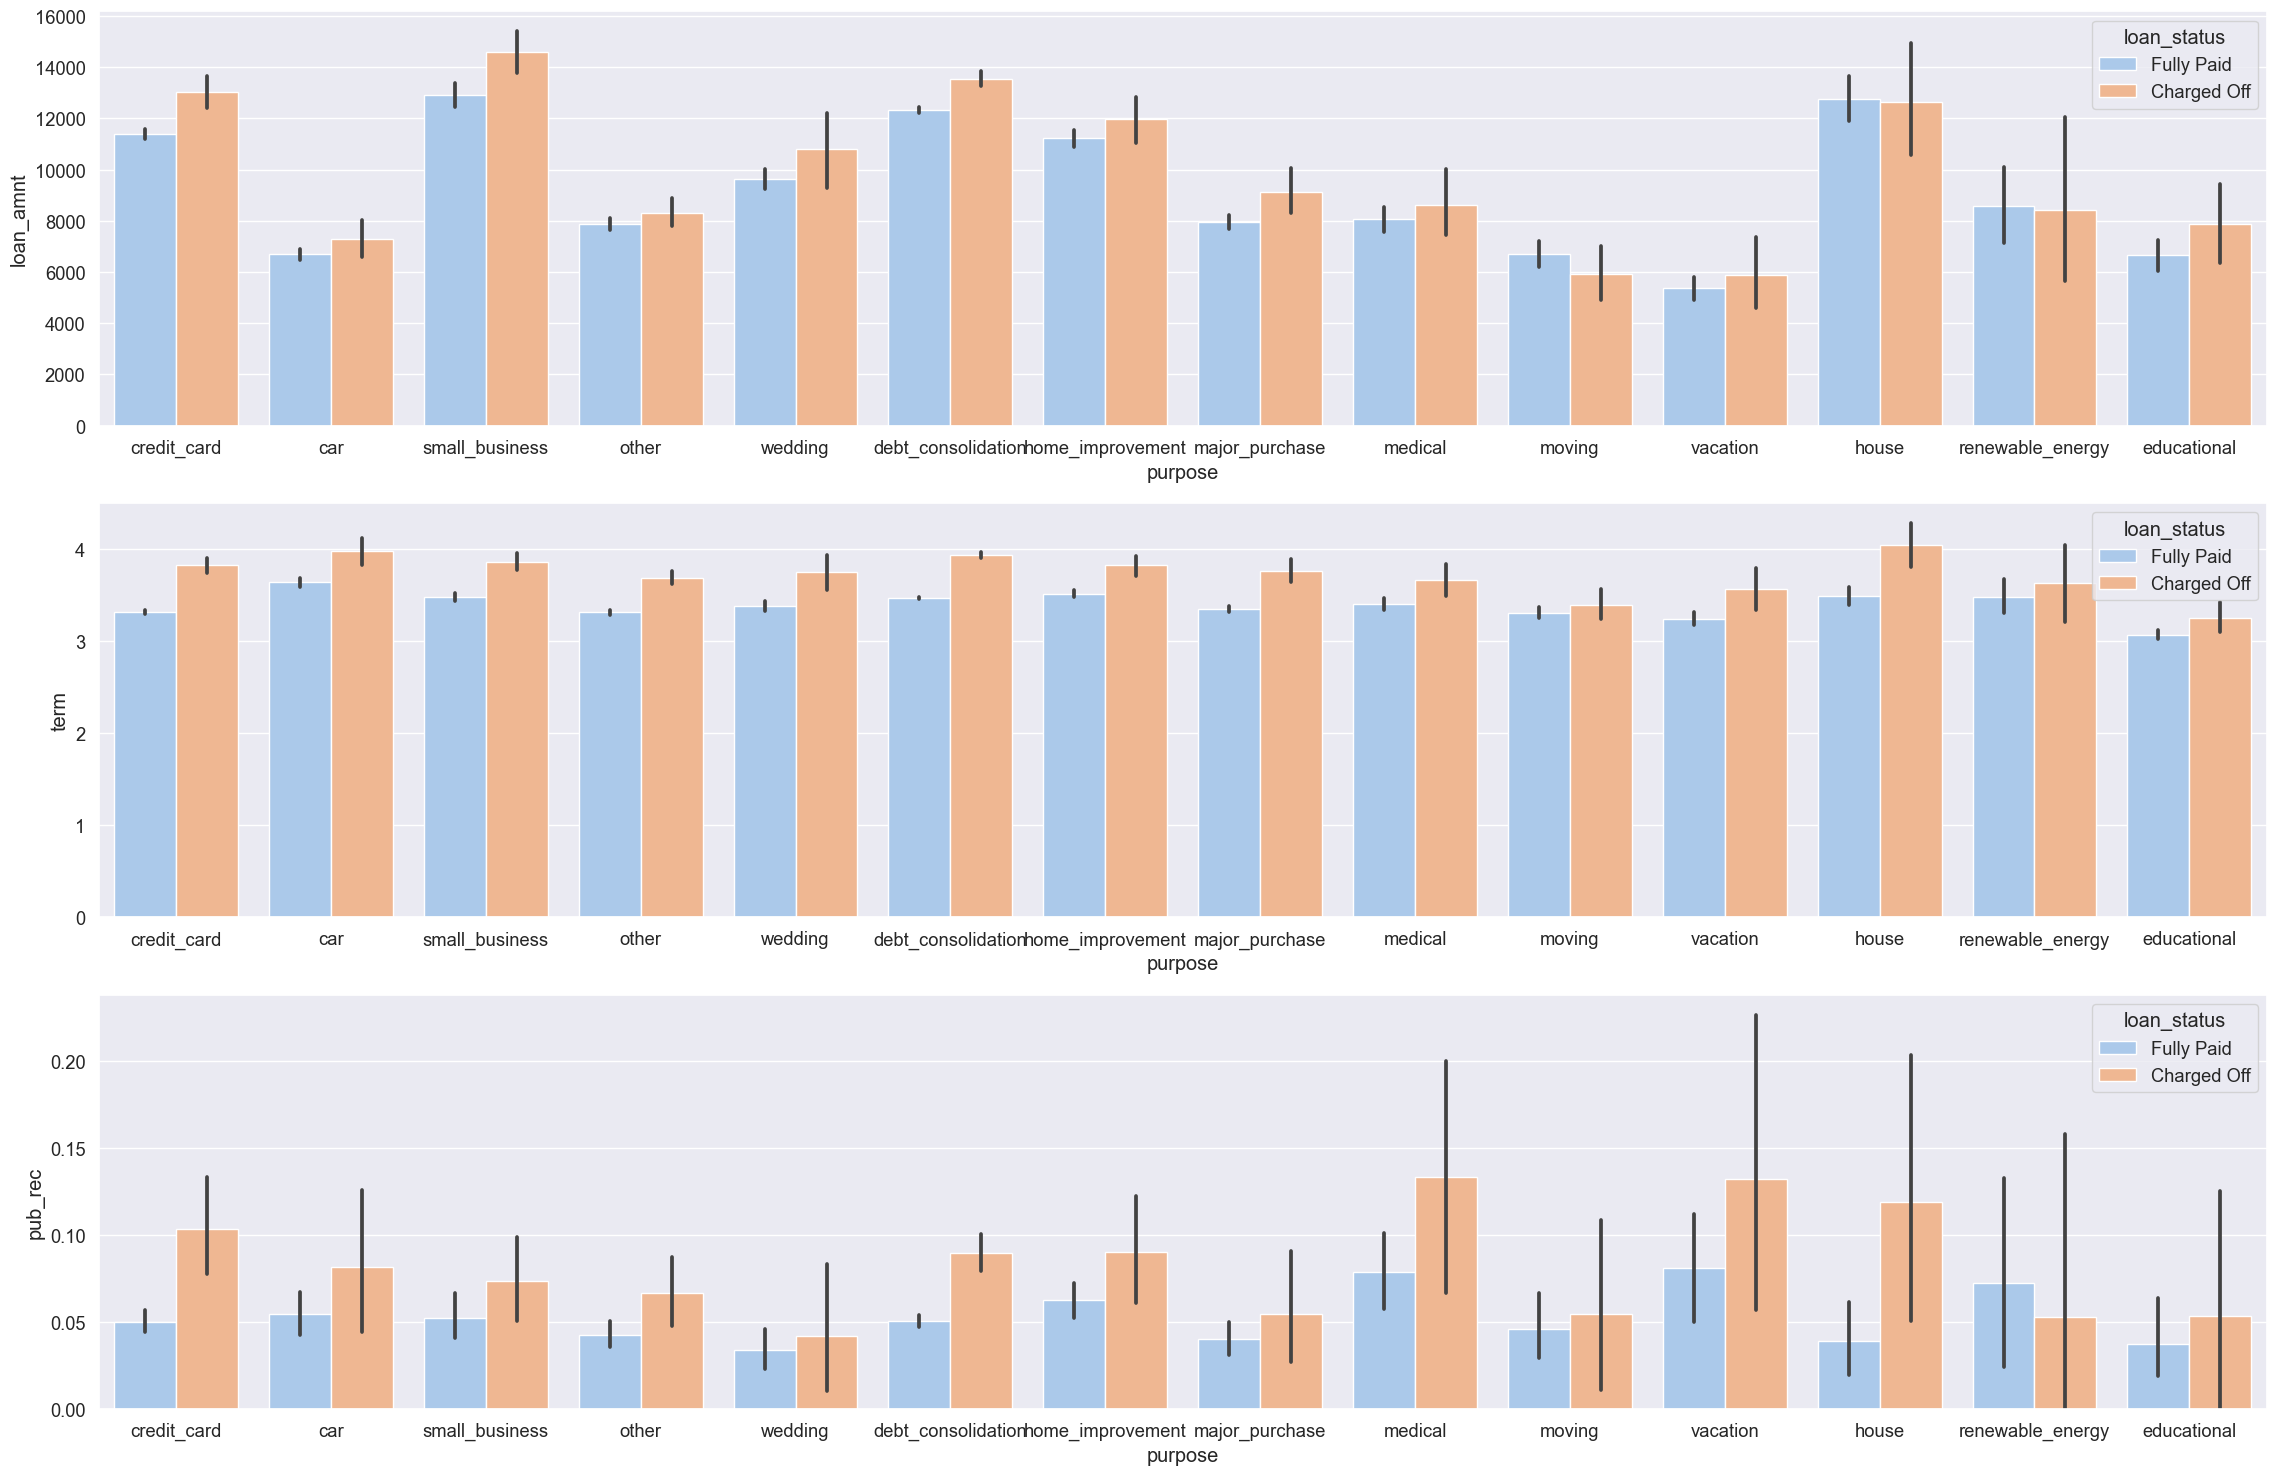

In [1155]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(23, 15))

sns.barplot(data=loan_df, y='loan_amnt', x='purpose', hue='loan_status', palette='pastel', ax=ax1)
sns.barplot(data=loan_df, y='term', x='purpose', hue='loan_status', palette='pastel', ax=ax2)
sns.barplot(data=loan_df, y='pub_rec', x='purpose', hue='loan_status', palette='pastel', ax=ax3)

plt.tight_layout()
plt.show()


In [1156]:
# # with regression
# sns.pairplot(df, kind="reg")
# plt.show()

In [1157]:
# # without regression
# sns.pairplot(df, kind="scatter")
# plt.show()

In [1294]:
loan_df['loan_status'].value_counts()

Fully Paid     32916
Charged Off     5611
Name: loan_status, dtype: int64

In [1295]:
loan_df['loan_status'] = loan_df['loan_status'].replace({'Fully Paid':1,'Charged Off':0})

loan_amnt         -0.060023
funded_amnt_inv   -0.038464
term              -0.173694
int_rate          -0.211011
installment       -0.027636
emp_length        -0.023650
annual_inc         0.058960
loan_status        1.000000
dti               -0.045086
inq_last_6mths    -0.071856
open_acc           0.008261
pub_rec           -0.051329
revol_util        -0.099990
total_acc          0.022021
Name: loan_status, dtype: float64


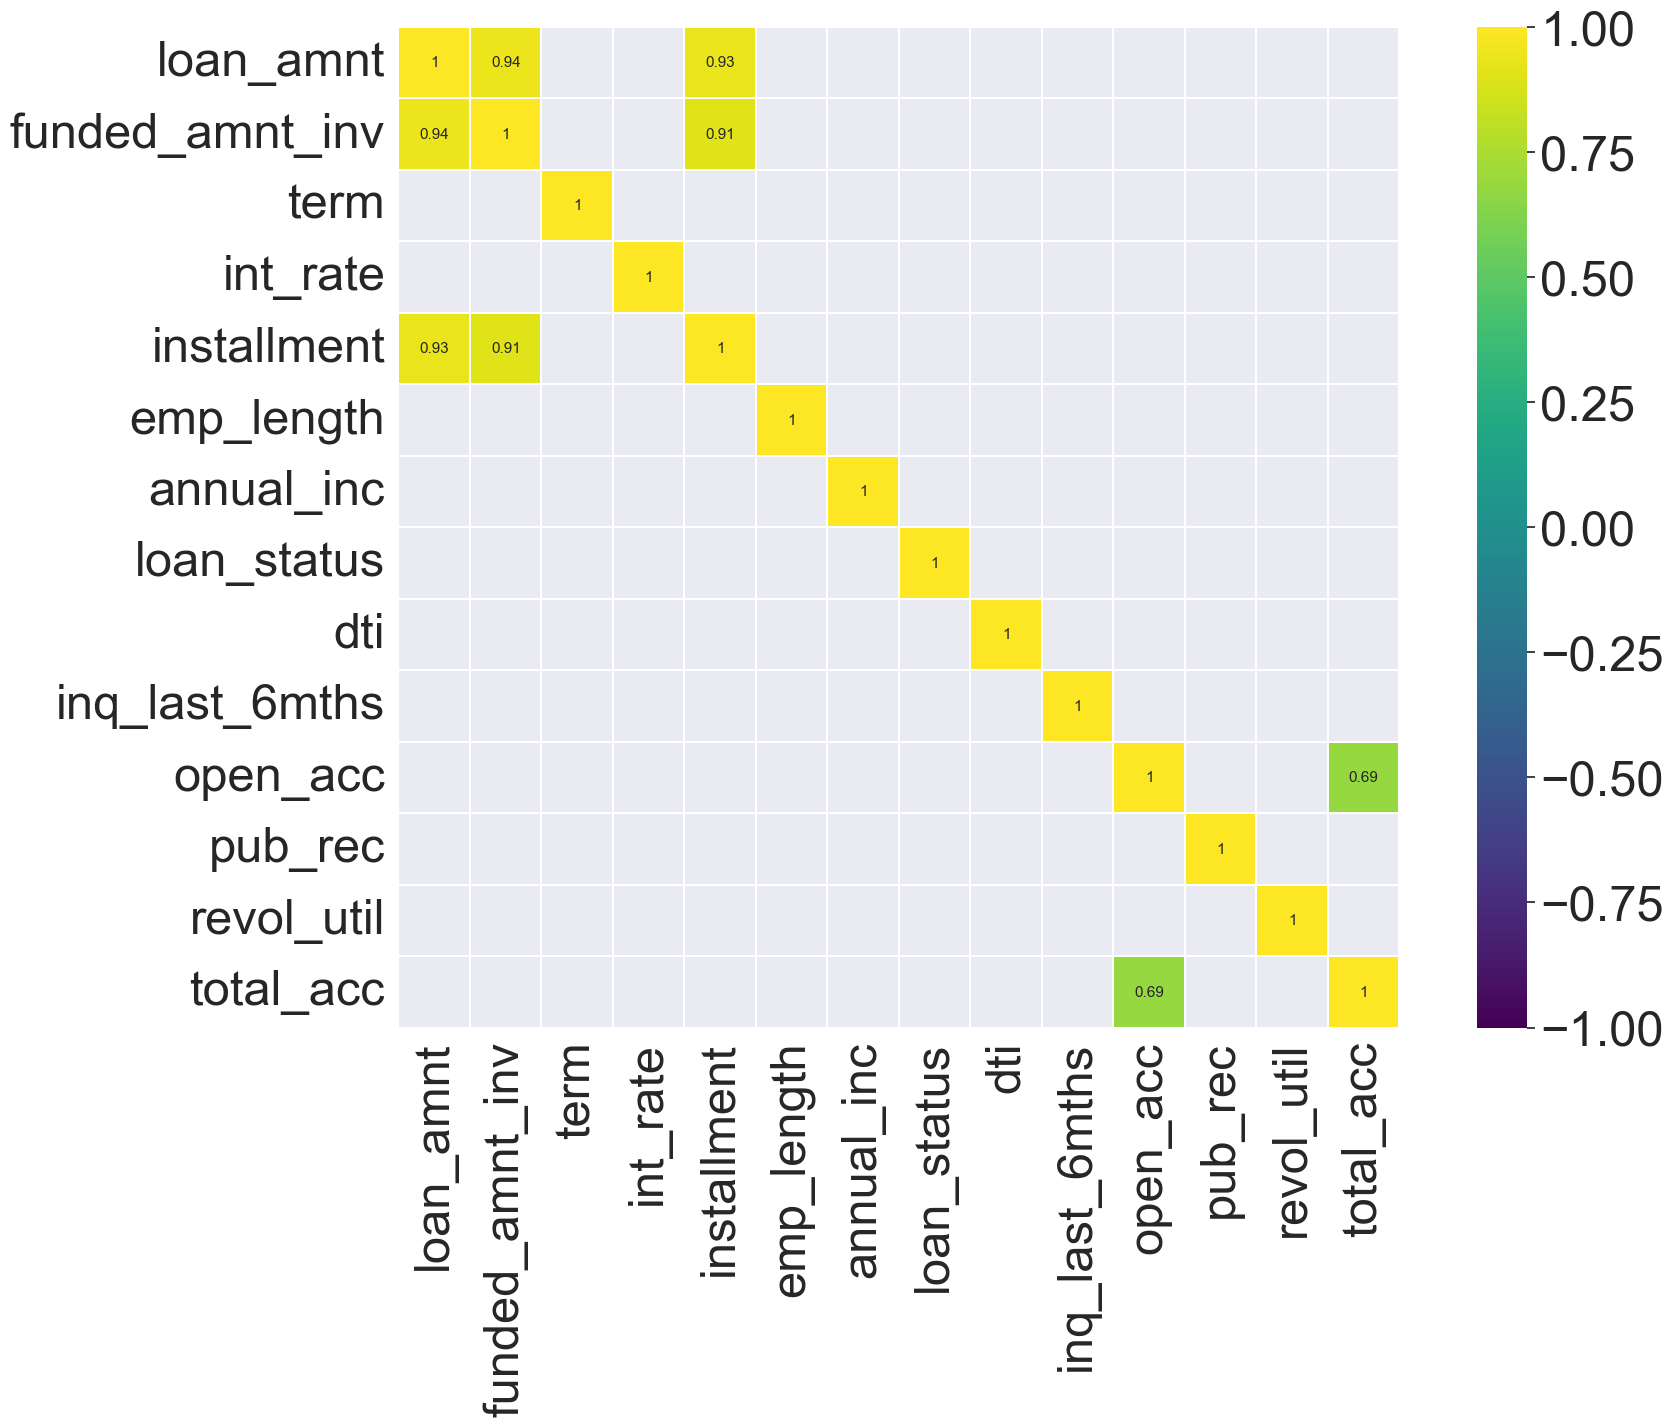

In [1296]:
sns.set_style(style="darkgrid")
print(loan_df.corr()['loan_status'])
corr = loan_df.corr()
plt.figure(figsize=(20,13))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 11}, square=True);
plt.show()

In [1161]:
correlation=loan_df.corr()
correlation

loan_amnt  funded_amnt_inv      term  int_rate  installment  \
loan_amnt         1.000000         0.937927  0.346371  0.302810     0.932187   
funded_amnt_inv   0.937927         1.000000  0.343707  0.299112     0.905444   
term              0.346371         0.343707  1.000000  0.441104     0.090006   
int_rate          0.302810         0.299112  0.441104  1.000000     0.278593   
installment       0.932187         0.905444  0.090006  0.278593     1.000000   
emp_length        0.129235         0.142174  0.097736 -0.010882     0.102578   
annual_inc        0.404623         0.382641  0.065803  0.077612     0.405056   
loan_status      -0.060023        -0.038464 -0.173694 -0.211011    -0.027636   
dti               0.061899         0.070130  0.076111  0.111629     0.051497   
inq_last_6mths    0.012902        -0.002823  0.047715  0.133439     0.010981   
open_acc          0.176318         0.161730  0.045675  0.007607     0.172105   
pub_rec          -0.050140        -0.051564  0.010268  0.098941    -0.045839   
revol_util        0.063489         0.072202  0.065846  0.467213     0.093049   
total_acc         0.255242         0.241783  0.095705 -0.045173     0.228947   

                 emp_length  annual_inc  loan_status       dti  \
loan_amnt          0.129235    0.404623    -0.060023  0.061899   
funded_amnt_inv    0.142174    0.382641    -0.038464  0.070130   
term               0.097736    0.065803    -0.173694  0.076111   
int_rate          -0.010882    0.077612    -0.211011  0.111629   
installment        0.102578    0.405056    -0.027636  0.051497   
emp_length         1.000000    0.133194    -0.023650  0.045536   
annual_inc         0.133194    1.000000     0.058960 -0.140551   
loan_status       -0.023650    0.058960     1.000000 -0.045086   
dti                0.045536   -0.140551    -0.045086  1.000000   
inq_last_6mths     0.008438    0.045404    -0.071856  0.001941   
open_acc           0.085461    0.241258     0.008261  0.287996   
pub_rec            0.070422   -0.024144    -0.051329 -0.004870   
revol_util         0.001880    0.034434    -0.099990  0.278941   
total_acc          0.195463    0.353403     0.022021  0.228868   

                 inq_last_6mths  open_acc   pub_rec  revol_util  total_acc  
loan_amnt              0.012902  0.176318 -0.050140    0.063489   0.255242  
funded_amnt_inv       -0.002823  0.161730 -0.051564    0.072202   0.241783  
term                   0.047715  0.045675  0.010268    0.065846   0.095705  
int_rate               0.133439  0.007607  0.098941    0.467213  -0.045173  
installment            0.010981  0.172105 -0.045839    0.093049   0.228947  
emp_length             0.008438  0.085461  0.070422    0.001880   0.195463  
annual_inc             0.045404  0.241258 -0.024144    0.034434   0.353403  
loan_status           -0.071856  0.008261 -0.051329   -0.099990   0.022021  
dti                    0.001941  0.287996 -0.004870    0.278941   0.228868  
inq_last_6mths         1.000000  0.093615  0.023820   -0.070206   0.113659  
open_acc               0.093615  1.000000 -0.000027   -0.089923   0.687034  
pub_rec                0.023820 -0.000027  1.000000    0.058942  -0.023611  
revol_util            -0.070206 -0.089923  0.058942    1.000000  -0.070650  
total_acc              0.113659  0.687034 -0.023611   -0.070650   1.000000

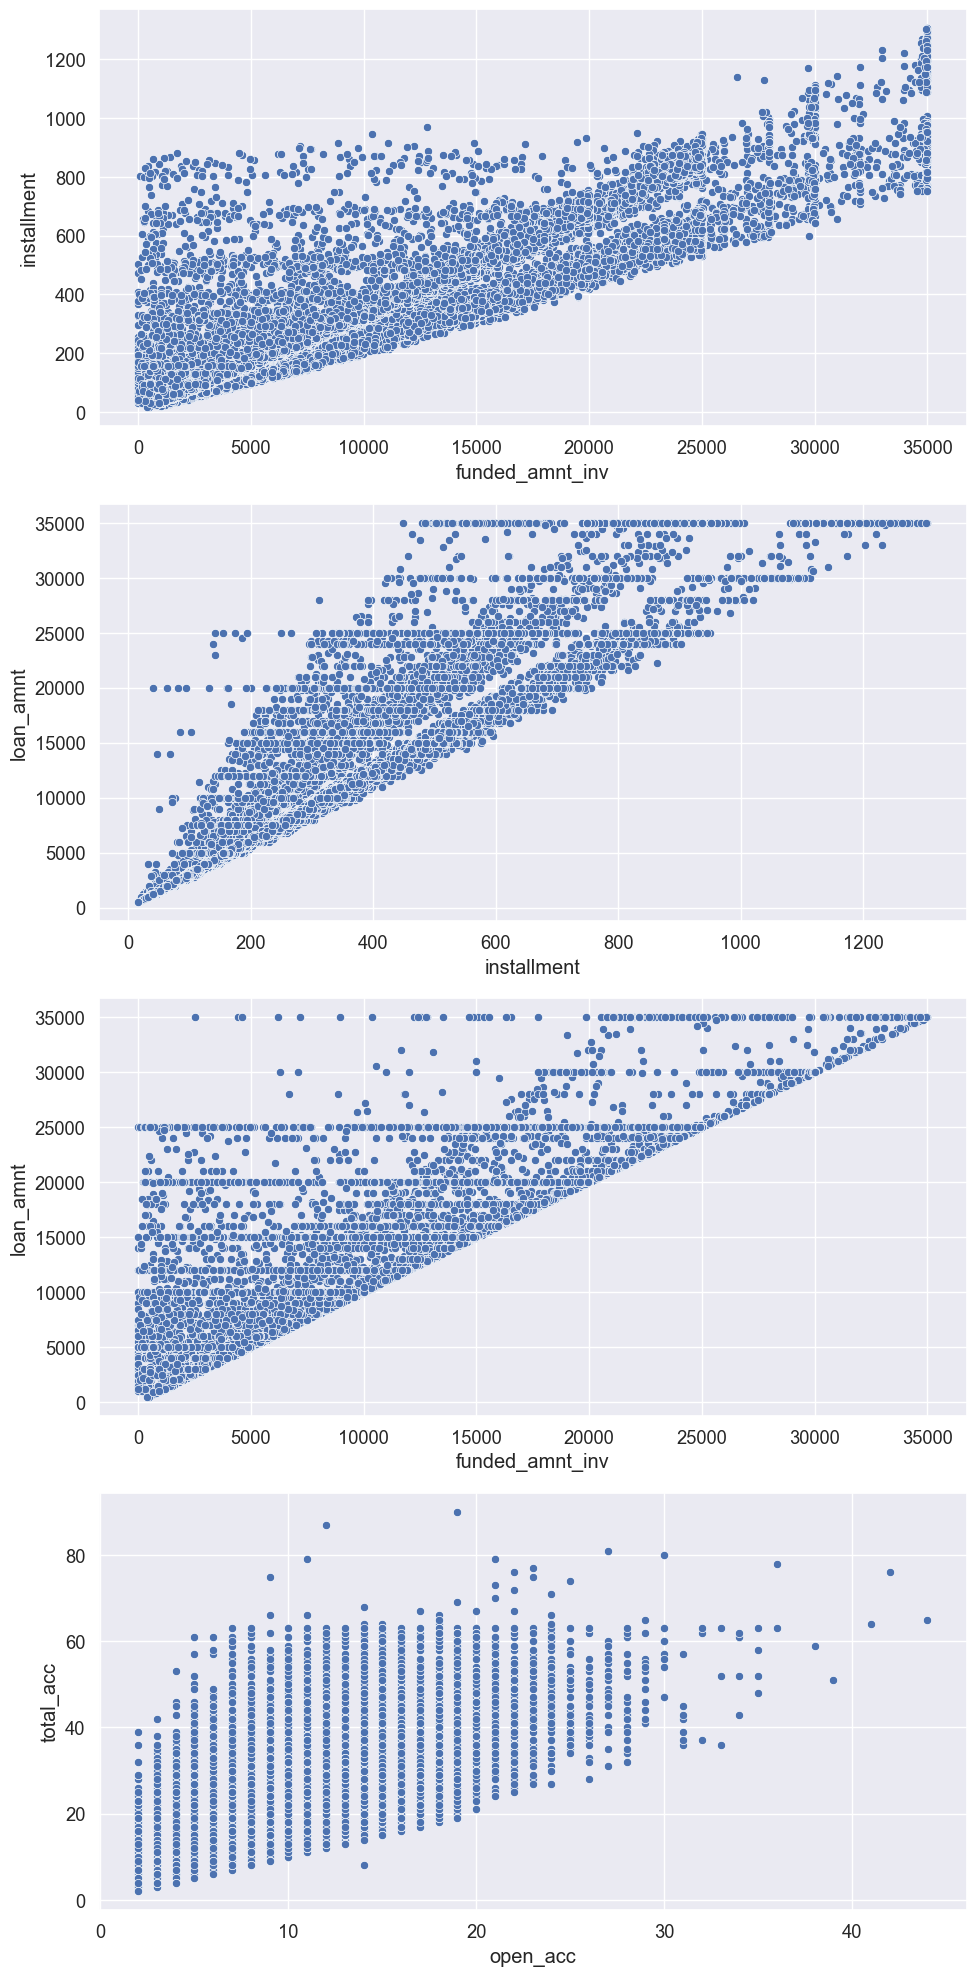

In [1162]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# calculate the correlation matrix
correlation = loan_df.corr()

# extract the features with correlation coefficient 0.5 or above (excluding correlations of 1)
features = correlation[((correlation > 0.5) | (correlation < -0.5)) & (correlation != 1)]

# create a list of unique feature pairs to plot
pairs = set()
for feature in features.columns:
    for pair in features.index[features[feature].notna()]:
        if pair > feature:
            pairs.add((feature, pair))

# create a grid of subplots for each feature pair
fig, axes = plt.subplots(nrows=len(pairs), ncols=1, figsize=(10, 5*len(pairs)))

# plot each feature pair on a separate subplot
for i, pair in enumerate(pairs):
    sns.scatterplot(x=pair[0], y=pair[1], data=loan_df, ax=axes[i])

# adjust the layout and spacing of the subplots
plt.tight_layout()

# display the plot
plt.show()


### Making one more report of the data in order to make Analysis easy

In [1428]:
from ydata_profiling import ProfileReport
import pandas as pd


profile = ProfileReport()

# Assigning a DataFrame and exporting to a file, triggering computation
profile.df = loan_df
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Recommendations

* The people who have taken the loan in the month of the December are more likely to be in the list of defaulters
* The people who have taken the loan in the year of 2011 are more likely to be the defaulters 
* In the month of the December there are many festivals which happens in the US so people are more likely to get the loans and are being charged off 
* The reason for the above case could be that the country could have the financial crisis
* The people who have the open accounts in the range of 2-10 are more likely to be the defaulters as the reason could be that they are unable to manage their finances
Since they need to maintain minimum balance in each of the accounts which leads not able to repay the loan 
* The people whose verification is not done and for whom the loan is approved without any background check are most likely to be defaulters so it is recommended not to approve the loan without any background check of the loan borrowers
* Try to avoid giving the loans to the people who belongs to grade B and D or do a good background check for them 
* The people who take the loan for debt consolidation purpose that is to clear other loans are more likely to be in the list of defaulters. It is recommended to avoid giving the loans for debt consolidation purpose.
